# Levosimendan C3 Control 

In [ ]:
import os
import time
import math
import numpy as np
import numpy.linalg as npla
import scipy
from scipy import linalg as spla
import scipy.sparse
import scipy.sparse.linalg
from scipy import integrate
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import axes3d
from collections import Counter 
np.set_printoptions(precision = 4)

def get_timearray(arr,fps):
  length = len(arr)
  time = np.zeros(length)
  for i in range(length):
    time[i] = i/fps
  return time

# Just for convenience #
def createLabels():
  plt.xlabel('Time (seconds)')
  plt.ylabel('Amplitude (a.u)')

# To get multiple lines on the same graph, get rid of plt.show and put it later, outside of function. #
def create_plot(start,end,arr,fps,title):
  plt.figure(figsize=(12,6))
  time = get_timearray(arr,fps)
  startindex = int(fps*start)
  endindex = int(fps*end)
  newtime = time[startindex:endindex]
  newamplitude = arr[startindex:endindex]
  plt.plot(newtime, newamplitude, color='black')
  plt.xticks(np.arange(start,end+1,step=1))
  plt.title(title)
  createLabels()

def smaller_plotGivenTime(start,end,arr,fps,label,ls,shift):
  time = get_timearray(arr,fps)
  time += shift
  startindex = int(fps*start)
  endindex = int(fps*end)
  newtime = time[startindex:endindex]
  newamplitude = arr[startindex:endindex]
  plt.plot(newtime, newamplitude, label=label, linestyle=ls)
  createLabels()

def norm(data):
  return data/np.linalg.norm(data)

def smaller_plotGivenTimeNorm(start,end,arr,fps,label,ls,shift):
  time = get_timearray(arr,fps)
  time += shift
  startindex = int(fps*start)
  endindex = int(fps*end)
  newtime = time[startindex:endindex]
  newamplitude = arr[startindex:endindex]
  plt.plot(newtime, norm(newamplitude), label=label, linestyle=ls)
  createLabels()

In [ ]:
Mono_1_BF = [13.5564,11.5969,10.2386,9.1942,7.7337,6.491,5.5374,4.9216,4.4528,4.1935,3.9963,3.8735,3.8231,3.7189,3.6968,3.7016,3.6829,3.6693,3.6898,3.8709,9.0462,13.976,16.8949,18.6318,19.5729,20.1027,20.4053,20.5897,20.7808,20.9221,21.0255,21.1115,21.1593,21.1546,21.0667,20.9609,20.885,20.7155,20.3495,19.6319,18.8529,18.0235,16.7408,14.8554,12.8603,11.4928,10.1902,8.447,6.9911,5.6318,4.7911,4.3464,4.0316,3.8217,3.6899,3.5912,3.5004,3.4547,3.4072,3.3783,3.3564,3.3731,3.4015,3.46,7.9573,13.4789,16.6515,18.5283,19.5435,20.135,20.5055,20.7369,20.9549,21.1342,21.2656,21.3448,21.3484,21.3208,21.3144,21.152,20.9744,20.7904,20.5277,19.9727,19.062,17.8865,16.2469,14.4804,12.6212,11.0555,9.9817,8.9295,7.5042,6.1139,4.9292,4.3033,3.9205,3.6569,3.5312,3.4309,3.3619,3.3045,3.2998,3.2969,3.2981,3.3473,3.4581,3.5004,3.4882,7.7821,13.1222,16.3516,18.2278,19.2501,19.7842,20.0421,20.1837,20.3783,20.5581,20.6522,20.7695,20.8696,20.9767,21.0013,20.8967,20.7218,20.5169,20.2205,19.74,18.9763,18.0704,16.9481,15.4731,13.6587,12.1136,10.4532,8.9573,7.4384,6.2302,5.0449,4.2016,3.6671,3.3608,3.1876,3.0698,2.9875,2.9289,2.8883,2.8868,2.8868,2.9299,2.9798,3.0267,3.7839,10.8071,15.238,17.7373,19.1857,19.9681,20.4026,20.6013,20.7329,20.8301,20.859,20.9099,20.8863,20.8725,20.7967,20.73,20.6391,20.4718,20.157,19.7834,19.1724,18.1541,17.0442,15.8575,14.314,12.6428,11.143,9.9186,8.7277,7.1037,5.6786,4.5457,4.0488,3.7292,3.5443,3.4376,3.3841,3.3296,3.2952,3.313,3.3287,3.3396,3.3515,3.4082,3.5435,8.1832,13.4727,16.5544,18.3993,19.4293,19.9908,20.2806,20.4962,20.6208,20.7319,20.8865,20.9394,20.9526,20.908,20.8132,20.6881,20.5288,20.3124,19.9852,19.4096,18.6124,17.9297,16.8196,15.2066,13.3966,11.4671,9.9552,8.5971,7.1694,6.0368,5.035,4.3097,3.8469,3.6574,3.5482,3.4682,3.4344,3.425,3.4446,3.4481,3.4848,3.5269,3.6634,3.8309,5.7598,11.4986,15.0802,17.3271,18.6532,19.3451,19.7258,19.9718,20.0762,20.186,20.3546,20.461,20.5908,20.6748,20.7051,20.7354,20.7509,20.6359,20.4633,20.155,19.7365,18.8794,17.6799,16.1263,14.4791,12.8113,11.864,10.7054,9.3411,7.5133,5.8411,4.8256,4.3501,4.0704,3.923,3.8266,3.7399,3.6906,3.6643,3.6471,3.6357,3.6357,3.7704,3.8895,5.0495,10.9451,14.8941,17.3283,18.6953,19.3745,19.7659,20.0606,20.2897,20.4085,20.5765,20.6656,20.7841,20.8937,20.8943,20.942,20.9841,20.8295,20.4812,20.1209,19.6207,18.9011,17.9029,16.6733,15.1763,13.7372,12.2944,10.8952,9.4571,7.5779,6.1802,5.2681,4.6504,4.2726,4.1356,4.0283,3.9573,3.9186,3.8931,3.8881,3.8757,3.8959,3.8904,3.8987,3.8674,5.3034,11.7769,15.8052,18.1894,19.4825,20.1947,20.6223,20.7638,20.898,21.0133,21.1017,21.1574,21.1532,21.1379,21.0175,20.9388,20.7723,20.5895,20.3258,19.9487,19.4184,18.308,17.0788,15.5375,14.1452,12.9464,12.2003,11.6378,10.2919,8.2695,6.4169,5.4351,4.8832,4.5805,4.4122,4.3113,4.2151,4.1447,4.0899,4.0455,4.0458,4.0242,4.0473,4.0747,6.5284,12.4387,16.0034,18.172,19.3793,20.0073,20.3379,20.5327,20.6835,20.7678,20.8104,20.9085,20.9403,20.9635,20.9359,20.8388,20.7346,20.6344,20.4365,20.0612,19.6836,19.0328,18.0726,16.5136,15.16,13.689,12.5401,10.9633,9.3213,7.626,6.421,5.5234,4.956,4.6692,4.4971,4.4344,4.3833,4.3565,4.3739,4.3511,4.3503,4.3675,4.3241,6.0007,12.189,15.857,18.0398,19.2693,19.9106,20.3276,20.5219,20.6938,20.8094,20.8784,20.9436,21.0158,21.0609,21.0575,20.9949,20.9455,20.8687,20.6116,20.2372,19.6311,18.8021,17.7368,16.1505,13.9495,12.0439,10.9185,9.627,8.1543,6.6253,5.7346,5.1236,4.8347,4.7046,4.6319,4.5608,4.5008,4.4719,4.4308,4.3974,4.3258,4.3104,4.3178,4.3495,4.4311,5.3511,11.6318,15.6087,17.9867,19.366,20.1,20.4637,20.6513,20.784,20.9248,21.0105,21.0508,21.0098,20.9613,20.937,20.8636,20.74,20.5998,20.369,20.0999,19.6631,18.612,17.4167,15.8645,13.9818,13.1597,12.4791,11.4145,10.1396,8.4578,6.9992,6.0883,5.4541,5.1371,4.9308,4.8108,4.7377,4.711,4.7198,4.7345,4.8363,4.9366,4.9792,6.0445,11.5778,15.2926,17.6356,18.9718,19.6432,20.002,20.2354,20.4305,20.5882,20.7664,20.8739,20.9524,21.0075,21.0502,21.0335,20.9907,20.8529,20.6355,20.332,19.6338,18.7146,17.6341,16.1792,14.8724,12.9713,11.5424,10.5668,9.3034,8.142,6.8326,5.9107,5.4956]
Mono_2_BF = [5.7734,7.7507,13.8516,18.2558,21.109,22.9592,23.8965,24.3604,24.4945,24.3993,24.1148,23.47,22.634,21.6711,20.5783,19.3996,18.5356,18.3083,18.7478,19.3121,19.7327,19.8731,19.342,18.2081,16.626,15.1043,13.5373,11.8859,10.352,8.897,7.3785,6.3435,5.8685,5.6554,5.5421,5.4968,5.4651,5.4505,5.4038,5.3624,5.3451,5.3159,5.3342,5.2616,9.4832,15.2594,19.1282,21.651,23.225,24.0882,24.4033,24.3451,24.0918,23.6864,23.0379,22.075,21.055,20.2644,19.9081,19.7583,19.6575,19.9351,20.5654,21.1733,21.4913,21.1333,20.0136,18.0398,16.3295,14.5841,12.9677,10.8273,8.7613,7.4085,6.3544,5.8318,5.4956,5.2748,5.1333,5.0495,4.9889,4.9798,5.0029,5.0744,5.127,5.1785,5.8243,11.9947,16.9612,20.1639,22.1715,23.2801,23.7103,23.7837,23.667,23.4037,22.9342,22.2423,21.4332,20.3878,19.3445,18.4525,17.9505,18.2882,19.2553,19.7989,19.9631,20.0203,19.3686,17.6086,15.824,14.0023,12.3253,10.1312,8.2377,6.793,5.8843,5.2268,4.9412,4.8099,4.7461,4.7556,4.7927,4.8275,4.9169,4.9292,4.9747,4.9778,4.9759,5.1276,10.9065,16.0251,19.4382,21.6551,22.9513,23.6326,23.9517,23.9156,23.7264,23.4479,22.7913,21.9463,20.85,19.7802,19.0366,18.8628,19.1715,19.6337,20.0079,20.0953,20.0618,19.7874,18.6333,16.8353,15.1059,13.1576,11.3345,9.0181,7.3429,6.0864,5.3182,4.9354,4.7506,4.674,4.5979,4.5466,4.5407,4.5561,4.5725,4.5855,4.6381,4.6868,6.7272,13.1732,17.7804,20.7231,22.6343,23.6816,24.1375,24.208,24.0145,23.6793,23.1166,22.3005,21.5946,20.8116,20.3232,20.3002,20.4288,20.6298,20.9218,21.0154,21.0381,20.8891,20.411,19.1841,17.5843,15.9584,13.8644,11.8535,9.9875,8.0781,6.6521,5.6082,4.9817,4.6462,4.452,4.355,4.322,4.3298,4.3909,4.4031,4.4562,4.4856,4.4491,8.0745,14.1466,18.2441,20.855,22.56,23.3999,23.7816,23.8262,23.6914,23.4036,22.9613,22.1525,21.269,20.3614,19.5942,18.9194,18.9652,19.5625,20.0356,20.7931,21.1571,20.8275,19.8298,18.3035,16.7475,14.5201,12.3329,10.2626,7.9827,6.5667,5.4249,4.7849,4.4965,4.3102,4.2215,4.1826,4.1712,4.1824,4.1668,4.1734,4.1743,4.1982,4.8539,11.1389,16.393,19.7673,21.9738,23.2507,23.8101,23.9804,23.8864,23.6288,23.2048,22.4447,21.678,20.7128,19.9068,19.4227,19.3555,19.678,20.1844,20.5943,20.9296,21.1138,20.9995,19.9179,18.4141,16.4086,14.469,12.2332,10.0904,7.7583,6.1665,5.1796,4.6095,4.31,4.1044,3.9415,3.8479,3.8021,3.778,3.7915,3.8312,3.8905,3.8682,7.7875,13.8442,17.9298,20.5262,22.1584,23.018,23.3444,23.3323,23.1577,22.8197,22.239,21.5482,20.6128,19.8183,19.3512,19.1646,19.4016,19.9404,20.6283,21.2319,21.6785,21.5175,20.52,19.0811,16.8453,14.7794,12.6849,10.7048,8.7701,6.9281,5.4543,4.5661,4.0922,3.8268,3.6773,3.6046,3.569,3.5805,3.6264,3.6552,3.6864,3.7111,4.3597,11.0636,16.312,19.7046,21.8028,23.0819,23.7234,23.8893,23.8772,23.7537,23.421,22.7374,21.8106,20.9965,20.0655,19.2036,18.9952,19.3869,19.7678,20.0252,20.1781,19.9728,19.2261,17.6321,15.7419,13.7032,11.5847,9.0997,7.2538,5.8273,4.7904,4.1151,3.7662,3.5784,3.4576,3.3853,3.3395,3.3558,3.3642,3.3712,3.4025,3.4309,3.4346,8.2429,14.4169,18.5307,21.2372,22.9228,23.788,24.0563,23.9543,23.7926,23.3793,22.6775,21.8079,20.7554,19.567,18.4546,17.6168,17.3953,17.7287,18.4413,19.0136,19.5261,19.5909,18.8296,17.0342,15.1731,13.203,11.2855,9.3939,7.4063,5.6689,4.5505,3.8788,3.5278,3.3027,3.1352,3.0522,3.0383,3.0436,3.0792,3.1352,3.1815,3.243,3.2645,7.7707,14.1949,18.4825,21.1924,22.9738,23.9288,24.3441,24.4416,24.2465,23.7094,23.1993,22.5232,21.5487,20.5679,19.8181,19.312,18.991,19.4784,20.3376,20.9201,21.381,21.389,20.2212,18.4043,16.3648,14.2735,11.8183,9.7543,7.4493,5.8185,4.6665,3.9246,3.519,3.2258,3.0376,2.9014,2.8327,2.8112,2.7935,2.8302,2.8474,2.8834,2.9185,7.7833,14.4015,18.8288,21.6132,23.3947,24.3769,24.7296,24.6814,24.4008,23.8891,23.1845,22.2555,21.1205,19.887,18.902,18.4506,18.631,19.5057,20.6432,21.3618,21.3506,20.5933,19.421,17.6655,15.7342,13.5702,11.5192,9.5049,7.4912,5.783,4.5556,3.6872,3.198,2.9225,2.6974,2.5418,2.4326,2.428,2.428,2.4679,2.5164,2.5952,6.0152,12.8875,17.4736,20.4498,22.3344,23.3166,23.7002,23.7475,23.6245,23.4664,22.9607,22.1793,21.0159,19.9889,19.3971,19.0821,19.0487,19.6553,20.4705,20.9785,21.3502,21.1266,20.0414,18.7923,17.0961,15.4121]
Mono_3_BF = [42.5531,42.7461,42.3362,41.6166,40.6078,39.5388,38.6476,37.8841,37.2539,36.7113,36.3379,36.1718,36.0719,36.0461,35.8824,35.8151,36.073,36.1572,35.8985,35.563,35.8216,36.4482,35.1658,32.2283,27.1154,21.5904,16.5833,13.2263,11.6068,10.4971,9.7911,9.1788,8.7475,8.3513,7.9835,7.7354,7.5339,7.2724,7.0944,7.0153,6.9814,6.9755,6.9943,6.9079,6.8885,6.8467,6.8298,6.8495,6.8959,7.0541,7.2413,8.4308,21.0052,30.2604,36.0552,39.7082,41.745,42.8176,43.0789,42.8563,42.2526,41.4478,40.457,39.4213,38.5014,37.5979,37.1136,36.6851,36.5634,36.5199,36.6507,36.6275,36.6264,36.6522,36.4236,35.7067,34.875,34.8333,35.7528,34.4378,30.7939,25.444,19.6289,15.4121,12.819,11.3476,10.3395,9.647,9.0861,8.5943,8.2201,7.8925,7.6093,7.3378,7.0855,6.8539,6.7325,6.5988,6.5276,6.527,6.5875,6.6812,6.7671,6.7509,6.7233,6.7892,6.6957,13.4748,26.3027,34.225,38.9808,41.8655,43.5911,44.2592,44.2807,43.6527,42.6485,41.446,40.3581,39.3156,38.43,37.8064,37.3713,37.0562,36.747,36.5884,36.27,35.9604,35.8863,36.0999,36.4059,36.4999,36.5872,37.5134,37.8067,35.2712,31.8278,26.3632,19.7207,15.0761,12.5196,11.182,10.2624,9.6851,9.0738,8.6018,8.1465,7.7328,7.3781,7.1912,6.938,6.7001,6.548,6.3754,6.3266,6.2509,6.1969,6.1823,6.2328,6.3586,6.4742,6.5721,6.6823,6.6688,11.0941,23.9718,32.2889,37.5286,40.693,42.4347,43.2113,43.3207,42.9272,42.0204,40.9006,39.8138,38.7948,37.8787,37.2689,36.9006,36.7041,36.5206,36.3366,36.1394,36.1829,36.1464,36.2167,35.9307,35.1657,34.1988,34.6961,35.1792,32.971,29.3217,23.2814,17.5962,13.7112,11.7923,10.6312,9.8541,9.318,8.9327,8.4729,8.0857,7.7433,7.3993,7.0206,6.786,6.561,6.3394,6.2425,6.1133,6.082,6.0111,5.9555,5.9091,5.98,6.0153,6.1508,6.2775,8.4512,21.6378,30.7897,36.5056,40.1742,42.273,43.2625,43.45,43.2108,42.5439,41.567,40.4018,39.1611,38.0722,37.1118,36.5435,36.4511,36.5954,36.7961,37.1831,37.4586,37.6032,37.6262,37.6074,37.1314,36.1704,35.9109,35.7681,35.6826,32.6021,27.5978,21.706,17.045,13.6956,11.8474,10.6693,10.0323,9.357,8.826,8.2829,7.9005,7.9178,7.6507,7.4683,7.2251,7.0247,6.8252,6.6331,6.4258,6.3141,6.2152,6.2095,6.1768,6.1684,6.1126,6.1266,6.1077,14.8447,26.7099,33.9573,38.6831,41.5307,42.9391,43.5004,43.4491,42.9784,42.3738,41.6392,40.6892,39.8567,38.9507,38.2366,37.6961,37.2157,36.812,36.6194,36.5158,36.4687,36.3666,36.0463,36.091,36.4344,36.434,37.0855,37.2824,34.0935,29.1184,23.2051,17.6828,14.025,12.1487,11.0488,10.308,9.6241,8.9897,8.3752,7.8905,7.4584,7.1164,6.857,6.588,6.4748,6.3121,6.1641,6.0475,5.9281,5.7976,5.7551,5.7151,5.7014,5.7448,5.8129,5.9013,6.5818,19.6886,29.4889,35.655,39.3949,41.5278,42.4159,42.6474,42.275,41.4773,40.498,39.41,38.4569,37.7159,36.9876,36.5382,36.2499,36.0963,35.9253,35.5702,35.3103,35.4762,35.4904,35.9036,35.8638,34.9003,35.2091,35.8506,35.4595,31.4148,26.5043,21.2132,16.3892,12.5823,10.934,9.9747,9.1647,8.5382,7.9926,7.5404,7.1122,6.7743,6.4028,6.0484,5.7743,5.5697,5.4116,5.2518,5.1634,5.0852,5.031,5.0226,4.9768,4.9693,5.0114,5.0929,5.1474,14.1753,26.1459,33.5957,38.271,41.1955,42.9745,43.7036,43.805,43.3347,42.4365,41.2167,39.8413,38.5233,37.4174,36.5468,35.9585,35.5477,35.362,35.3088,35.2542,35.1908,35.2778,35.6275,36.1386,36.3177,35.4494,35.0912,35.4125,32.8843,29.1983,24.6206,19.6149,14.9161,11.6052,9.8471,8.8567,7.9737,7.2514,6.6764,6.1944,5.7896,5.4099,5.0867,4.8375,4.5273,4.1189,3.7724,3.4452,3.2457,3.0272,3.0247,3.0247,3.1963,3.3586,3.4942,3.6083,11.2629,24.0352,31.8787,36.9932,40.0097,41.7833,42.8534,43.4833,43.4723,42.9556,42.1649,40.9971,39.8551,38.7962,37.756,37.0629,36.6546,36.3945,36.3445,36.5814,36.7151,36.7773,36.9306,37.1551,36.8835,36.0797,35.8596,36.5439,35.1872,30.7457,24.5826,19.3714,15.0186,12.6797,11.2848,10.3314,9.5221,8.7575,8.1394,7.6334,7.1404,6.711,6.394,6.279,6.1777,6.0725,5.9922,5.8323,5.6508,5.4915,5.339,5.3483,5.3066,5.3626,5.3934,5.4426,5.6527,15.7461,27.3705,34.6933,39.2838,41.9167,43.2048,43.8507,43.941,43.4649,42.6127,41.6167,40.5958,39.5638,38.6449,37.9703,37.5545,37.4755,37.2645,37.0137,36.7286,36.5375,36.2041,35.9695,36.0998,36.1236,35.7014,36.5224,36.5081,33.7581,30.0321,24.7876,18.7836,14.6145,12.3326,11.2638,10.5857,10.0233,9.4716]
Mono_4_BF = [6.5232,6.6518,6.7406,6.7998,6.9585,6.9498,7.0908,7.0657,7.8913,10.5665,13.8952,17.0115,19.6672,21.7933,23.4959,24.8956,25.9356,26.8466,27.6264,28.2776,28.9145,29.3565,29.6607,29.9713,30.1396,30.3033,30.4094,30.5153,30.5816,30.5835,30.6016,30.5942,30.5129,30.4818,30.3834,30.2568,30.0726,29.9353,29.719,29.3658,29.0126,28.5871,28.0277,27.4206,26.6112,25.6263,24.6356,23.5132,22.3907,21.0198,19.4722,18.0475,16.4521,15.0568,13.7457,12.4837,11.5336,10.7478,10.0545,9.3932,8.8055,8.2896,7.9198,7.6636,7.4515,7.3276,7.1588,7.137,7.0267,7.0643,7.106,7.0138,7.1277,7.093,7.1973,7.262,7.2046,7.3004,7.1952,7.3023,7.2804,7.7054,10.0249,13.3103,16.5462,19.324,21.6162,23.4063,24.9038,26.0336,26.9626,27.7679,28.3939,28.9437,29.3372,29.6988,30.0004,30.1961,30.3934,30.521,30.5492,30.6313,30.6052,30.6249,30.5719,30.5404,30.5065,30.3919,30.2921,30.146,29.9798,29.7885,29.5212,29.1714,28.794,28.2466,27.648,26.8815,25.9357,24.9354,23.7533,22.5785,21.2607,19.9159,18.3928,16.8304,15.5082,14.0366,12.599,11.3887,10.4917,9.7169,8.8347,8.245,7.6979,7.2742,7.0187,6.7471,6.5819,6.357,6.2401,6.1808,6.1235,6.1324,6.1407,6.1808,6.1701,6.2361,6.3351,6.3521,6.4738,6.4865,6.5623,6.6433,6.597,7.9974,11.0311,14.4116,17.5004,20.0736,22.1035,23.7822,25.0811,26.1277,27.0021,27.6681,28.2978,28.7547,29.1528,29.4875,29.6966,29.9087,30.0232,30.0964,30.1674,30.225,30.2474,30.1864,30.1433,30.1334,29.979,29.8791,29.7256,29.5573,29.3783,29.129,28.825,28.3864,27.8417,27.1898,26.4051,25.5299,24.4799,23.2585,22.1443,20.8239,19.3646,17.8291,16.3071,14.7498,13.1888,11.9547,10.7583,9.8349,9.0748,8.3542,7.8347,7.3884,7.0495,6.7321,6.4886,6.2874,6.1239,5.968,5.8046,5.8102,5.7979,5.7297,5.8039,5.726,5.7875,5.8461,5.8675,5.9616,5.9089,6.0043,6.0625,6.0586,5.9915,7.021,10.0851,13.6101,16.8756,19.5416,21.7213,23.4225,24.798,25.9439,26.8093,27.5929,28.2185,28.6843,29.117,29.4418,29.765,29.9459,30.0773,30.2314,30.2644,30.3075,30.2867,30.2773,30.2977,30.239,30.1686,30.0482,29.9074,29.7703,29.591,29.3552,29.0905,28.7115,28.2581,27.6316,26.8526,26.0152,24.946,23.8926,22.6272,21.2454,19.8455,18.2951,16.7831,15.167,13.693,12.1863,10.7818,9.7287,8.7508,7.9543,7.2798,6.7305,6.3063,5.876,5.5774,5.3504,5.1685,5.0727,4.9628,4.9043,4.8721,4.8972,4.9033,4.9689,5.0148,5.1052,5.2051,5.2324,5.2622,5.5982,8.0037,11.5418,15.0665,17.98,20.4045,22.3511,23.8446,25.1554,26.129,26.9197,27.6598,28.1796,28.6757,28.9664,29.2532,29.4996,29.6543,29.7461,29.7717,29.7849,29.8334,29.7871,29.7907,29.7225,29.6385,29.6169,29.4831,29.3851,29.186,28.9527,28.697,28.25,27.758,27.2959,26.6317,25.9373,24.9332,23.8196,22.624,21.4105,20.2021,18.751,17.2168,15.5838,14.0485,12.7123,11.3065,9.9774,8.8273,7.9363,7.1762,6.4288,5.8785,5.387,5.0138,4.7069,4.4524,4.2717,4.0945,4.0174,4.0174,4.041,4.112,4.2136,4.3613,4.4219,4.5786,4.655,4.7888,4.9246,4.8491,5.5122,8.2394,11.9737,15.4103,18.3902,20.6881,22.5972,24.1187,25.2974,26.3257,27.0831,27.7537,28.2933,28.7264,29.1231,29.4167,29.6205,29.8161,29.9284,30.0434,30.095,30.124,30.1269,30.055,30.0255,29.9077,29.8154,29.6976,29.5426,29.4178,29.1966,28.8787,28.5206,28.0478,27.5804,26.8576,25.8978,24.9528,23.87,22.794,21.5648,20.2028,18.826,17.1285,15.7541,14.3601,12.7642,11.2599,9.9339,8.9628,8.0125,7.2904,6.7871,6.268,5.9697,5.6445,5.4287,5.2863,5.1613,5.1409,5.114,5.1281,5.131,5.187,5.2418,5.3269,5.4202,5.4756,5.6182,5.6724,5.7824,5.8997,5.7571,6.3712,8.9799,12.5053,15.8613,18.8025,21.0724,22.9384,24.4261,25.6143,26.6209,27.3689,28.0045,28.5057,28.9399,29.3183,29.5395,29.778,29.9573,30.0357,30.1656,30.1447,30.1834,30.1701,30.1164,30.0736,30.0072,29.8886,29.7787,29.5827,29.4243,29.1508,28.8328,28.4583,27.9414,27.284,26.5722,25.6556,24.6647,23.4508,22.3049,21.0209,19.5141,18.1446,16.5873,15.137,13.5205,12.1078,10.9407,9.775,8.9274,8.0875,7.3956,6.8697,6.3949,6.1185,5.815,5.6389,5.5094,5.4152,5.4121,5.4251,5.4797,5.5285,5.6385,5.6931,5.8088,5.9232,5.9818,6.098,6.1311,6.2756,6.4429,6.3334,6.7436,9.0371,12.36,15.5988,18.4598,20.6637,22.536,23.986,25.1693,26.231,26.9789,27.6454,28.2032,28.6689,29.1039,29.3867,29.6167,29.8054,29.9118,29.9956,30.0251,30.0506,30.0848,30.0414,30.0201,29.9579,29.8504,29.7123,29.5461,29.373,29.1067,28.8021,28.452,27.9797,27.4359,26.7463,25.8166,24.7814,23.6485,22.5923,21.3395,19.9535,18.5405,16.8995,15.2469,13.7221,12.4643,11.1724,10.0471,9.2235,8.33,7.7042,7.1781,6.7135,6.4513,6.1645,5.9384,5.8369,5.7787,5.7923,5.8254,5.9328,5.9758,6.1102,6.1781,6.3372,6.5055,6.5631,6.7235,6.8271,6.9865,7.078,6.9389,8.294,11.2807,14.6246,17.5486,20.0356,21.9913,23.6221,24.8692,25.9094,26.7963,27.4454,28.062,28.5446,28.9298,29.2826,29.462,29.6698,29.8208,29.9362,30.0521,30.1175,30.1213,30.0836,30.0387,30.0301,29.9117,29.741,29.6418,29.4519,29.2328,28.9024,28.5183,28.0304,27.4331,26.8163,26.0205,25.0583,24.0128,22.881,21.6493,20.2492,18.8165,17.2589,15.7273,14.1608,12.5398,11.2069,10.1088,9.2265,8.4753,7.9074,7.5202,7.0926,6.7589,6.5059,6.3702,6.2884,6.1825,6.193,6.1612,6.2709,6.3096,6.3266,6.4075,6.4165,6.5406,6.6357,6.6719,6.801,6.7995,6.9343,6.9565,6.9069,8.2984,11.2962,14.6363,17.6083,20.1018,22.0668,23.6835,24.927,25.9794,26.886,27.5524,28.1467,28.6333,28.9899,29.3901,29.6088,29.8554,29.9712,30.0748,30.1929,30.1822,30.2185,30.2076,30.1873,30.1088,30.0203,29.8645,29.7318,29.544,29.33,28.984,28.6403,28.1407,27.6182,27.0092,26.1025,25.1081,23.9118,22.744,21.5301,19.9774,18.4554,17.0277,15.5402,14.093,12.701,11.4541,10.3402,9.2936,8.506,7.8625,7.4102,7.0505,6.7178,6.5481,6.4536,6.3629,6.3188,6.3462,6.3469,6.4352,6.5535,6.649,6.7553,6.8218,6.9353,7.0541,7.1486,7.2781,7.3118,7.4389,7.5373,7.6186,7.675,7.4397,8.4725,11.2336,14.5405,17.5252,20.1096,22.1127,23.7533,25.1305,26.1461,27.0611,27.779,28.3754,28.8893,29.2726,29.5965,29.8228,29.9789,30.1791,30.1836,30.2342,30.2749,30.2652,30.2393,30.1834,30.0681,29.9477,29.8129,29.6421,29.4236,29.1737,28.8572,28.5256,28.0585,27.4256,26.6854,25.8134,24.7008,23.5791,22.2956,20.962,19.6393,18.1682,16.6351,15.0194,13.5555,12.2233,11.0478,10.1126,9.354,8.7712,8.2587,7.8972,7.5413,7.3167,7.1162,6.9724,6.9428,6.8072,6.8859,6.8746,6.9145,7.0026,6.9798,7.1347,7.2254,7.3034,7.4132,7.4348,7.5842,7.6926,7.7931,7.7104,7.7763,9.6895,12.8475,16.1053,18.9001,21.2273,23.013,24.5203,25.7579,26.6957,27.5323,28.1906,28.7208,29.188]
Mono_5_BF = [20.7687,18.3938,15.9459,13.8696,12.1823,10.6215,9.4261,8.3128,7.4918,6.9202,6.4013,5.9564,5.6303,5.3238,5.1498,4.9227,4.7289,4.58,4.4391,4.3596,4.2739,4.135,4.0588,3.9826,3.9457,3.889,3.8367,3.8074,3.8074,3.8245,3.8278,3.8901,3.9109,3.948,4.0101,4.0352,4.0867,4.1114,4.176,4.205,5.4489,14.3279,23.1022,28.9537,33.0659,35.8783,37.9584,39.5333,40.5789,41.2188,41.3962,41.4261,41.3259,41.0453,40.7219,40.1751,39.4778,38.9,38.439,38.0031,37.621,37.2206,37.0485,36.817,36.5759,36.333,36.0957,35.9313,35.7346,35.5212,35.3716,35.2713,35.2566,35.1991,35.0302,34.9035,34.7727,34.8605,34.8106,34.7678,34.6595,34.6859,34.8457,34.6983,34.3839,33.9263,33.3245,32.4908,31.2701,29.7285,28.2083,26.7719,25.3423,23.121,20.7737,18.4099,16.3424,14.6003,12.5882,10.9353,9.6895,8.5903,7.934,7.3246,6.8329,6.4392,6.1469,6.0146,5.7771,5.5908,5.4568,5.3444,5.2825,5.1209,5.0434,5.0158,4.9709,4.9788,4.9077,4.9029,4.9005,4.8802,4.9321,4.9497,4.9796,4.9785,4.9506,5.0382,5.0669,5.1045,5.1002,5.1269,5.1725,6.8525,15.9482,24.4282,30.1462,34.2348,37.0929,39.1978,40.7752,41.739,42.3954,42.6498,42.7415,42.6782,42.393,42.085,41.4228,40.7482,40.1726,39.5314,39.0083,38.5539,38.2887,38.0242,37.6822,37.405,37.1211,36.9238,36.9059,36.7847,36.5842,36.3681,36.1056,36.0128,35.8582,35.6967,35.5298,35.4297,35.4654,35.3866,35.3691,35.3496,35.2434,35.3712,35.3062,34.9661,34.5377,34.0638,33.2187,32.0224,30.6083,28.7533,26.6513,24.5232,22.3089,20.1273,18.1004,15.9401,14.0641,12.2984,10.977,9.8925,8.8762,8.292,7.6492,7.154,6.8354,6.5157,6.3505,6.1431,5.9399,5.8499,5.7192,5.6757,5.5466,5.471,5.4091,5.3275,5.3786,5.3164,5.2524,5.2203,5.1867,5.2632,5.2534,5.2546,5.256,5.2567,5.3152,5.3363,5.3545,5.3446,5.394,5.4456,9.2553,18.5787,25.984,30.9501,34.4532,36.9407,38.7888,40.1846,41.1199,41.7422,42.0074,42.0301,41.9256,41.533,41.0256,40.3689,39.6347,39.1443,38.7104,38.3379,38.006,37.6299,37.4453,37.19,36.9394,36.7555,36.4994,36.342,36.091,35.7559,35.4427,35.2404,35.1826,35.0307,34.883,34.6497,34.553,34.5779,34.6069,34.5981,34.5927,34.5757,34.7118,34.6782,34.3174,33.6616,32.9165,32.0285,30.8565,29.3654,27.4349,24.8628,22.7306,20.367,17.8469,15.6067,13.6984,12.2101,10.8804,9.766,8.9078,8.1361,7.6619,7.1842,6.8004,6.5731,6.3331,6.2449,6.055,5.9246,5.832,5.7459,5.6983,5.6136,5.5227,5.5197,5.5244,5.4992,5.4689,5.4872,5.4697,5.4597,5.5283,5.526,5.5464,5.5213,5.5543,6.6565,14.9571,23.4178,29.3297,33.2012,36.0736,38.0589,39.4715,40.5412,41.1297,41.4736,41.5628,41.4192,41.1707,40.7749,40.2769,39.7211,39.1287,38.6413,38.1881,37.788,37.4351,37.0878,36.7825,36.4692,36.238,35.9534,35.5821,35.3485,35.047,34.7661,34.5215,34.2354,34.0759,33.8671,33.7479,33.7141,33.6544,33.7727,33.774,33.7882,33.8795,33.8657,33.9559,33.6809,33.2917,32.5714,31.2643,29.7461,27.9554,26.5065,24.734,22.5721,20.5877,18.2222,16.1389,14.2281,12.5635,11.352,10.1422,9.1368,8.4318,7.8243,7.4782,7.0754,6.7768,6.6558,6.4273,6.3297,6.1719,6.0568,6.0031,5.9259,5.9141,5.8234,5.7636,5.7552,5.7502,5.7448,5.703,5.6767,5.7125,5.6867,5.7163,5.7588,5.7987,5.8103,5.8249,5.8712,5.8605,5.9088,5.9414,5.957,6.6378,14.3652,22.9867,29.2179,33.403,36.4695,38.6536,40.2706,41.4832,42.1014,42.4398,42.4269,42.2375,42.0895,41.626,41.0736,40.5434,39.9067,39.3885,38.8957,38.535,38.1665,37.8437,37.543,37.1012,36.7079,36.4261,36.1295,35.9175,35.7141,35.4929,35.2346,34.9931,34.8492,34.7448,34.6421,34.6687,34.6865,34.837,34.9084,35.0076,35.2799,35.5301,35.6487,35.5715,35.2951,34.8527,34.1204,32.8741,31.1545,29.5875,27.97,25.4757,23.2035,20.6244,18.2429,16.0485,14.146,12.4193,10.984,9.7862,8.9959,8.3701,7.9532,7.5203,7.2102,7.0034,6.83,6.6742,6.5278,6.3905,6.3395,6.219,6.1745,6.1042,6.0149,6.0363,6.0021,5.9563,5.9516,5.9588,5.9246,5.9266,5.9565,5.9549,5.9629,6.0197,5.991,6.0474,6.0629,7.1201,15.383,23.5956,29.3012,33.1926,36.0111,38.1525,39.6648,40.7065,41.3019,41.5873,41.7067,41.5671,41.2496,40.6264,40.0203,39.4705,38.8685,38.2472,37.7623,37.3904,37.2926,37.0819,36.947,36.7495,36.6188,36.5761,36.4677,36.2809,36.1548,35.9645,35.8454,35.6896,35.5882,35.5449,35.4098,35.38,35.234,35.1905,35.338,35.3519,35.2899,35.0447,34.7202,34.3268,33.6409,32.8363,31.5553,30.2414,28.5465,26.6053,25.0334,23.5299,22.0678,20.0499,17.6566,15.7559,13.8186,12.2489,10.9956,9.9311,9.2389,8.5546,8.0588,7.778,7.4273,7.2339,7.0189,6.8093,6.7565,6.6673,6.6453,6.4958,6.5694,6.8058,6.7508,6.7232,6.6201,6.5227,6.3845,6.2444,6.1949,6.1879,6.1512,6.241,6.1879,6.245,6.26,6.2942,6.3499,6.324,6.3837,6.3982,6.4267,7.0454,14.7844,23.4832,29.5911,33.7387,36.8886,39.0756,40.6565,41.8105,42.4562,42.9255,43.0254,42.9072,42.5902,42.0332,41.4279,40.7612,40.1466,39.5987,38.9808,38.5541,38.073,37.7427,37.3575,37.0073,36.7239,36.4422,36.2155,35.987,35.6653,35.3798,35.1041,34.8169,34.6552,34.4596,34.3176,34.0859,34.0398,34.2214,34.3593,34.6218,34.8174,35.0539,35.3681,35.4542,35.3478,34.8213,33.8051,32.5037,30.5724,28.5296,26.1021,24.0571,22.0738,20.3868,18.6233,16.6279,14.9065,13.3617,11.7955,10.6576,9.5681,8.8002,8.3156,7.9086,7.5796,7.2754,7.0696,6.9383,6.8101,6.6952,6.5641,6.4867,6.4645,6.3809,6.3262,6.2925,6.2371,6.2654,6.1824,6.1761,6.1505,6.1497,6.1586,6.1359,6.1774,6.1663,6.1783,6.2472,6.2705,6.2956,6.3028,6.3465,6.5087,11.9137,20.9263,27.5374,32.0097,35.3673,37.6797,39.4308,40.655,41.4432,42.0492,42.1962,42.1048,41.8465,41.4103,40.907,40.2363,39.5837,39.1752,38.7635,38.5033,38.2418,37.9829,37.8542,37.7257,37.5799,37.2322,36.8963,36.5699,36.1781,35.7957,35.2514,34.788,34.4586,34.2554,34.0862,33.792,33.543,33.4148,33.277,33.3676,33.497,33.6147,33.8491,33.8901,33.9815,33.7389,32.8568,31.6891,30.3335,28.5366,26.5408,24.3343,22.3912,20.5628,18.6606,16.5748,14.7895,13.25,11.7107,10.5728,9.5509,8.7951,8.3937,7.9128,7.5854,7.3074,7.0671,6.9804,6.8198,6.6987,6.6073,6.4593,6.4608,6.3766,6.3146,6.2886,6.234,6.2392,6.224,6.2081,6.214,6.1986,6.1921,6.2038,6.2145,6.2213,6.2771,6.2673,6.3024,6.3229,6.3542,6.3666,6.3997,7.3788,15.3736,23.7218,29.4708,33.5585,36.3402,38.3985,39.892,40.9114,41.642,41.9086,41.9035,41.769,41.3608,40.9793,40.5092,39.8921,39.4476,39.0194,38.6441,38.2073,37.7865,37.5838,37.3386,37.1605,36.9113,36.6782,36.5386,36.43,36.2238,36.1093,36.0143,35.9483,35.8181,35.8127,35.7473,35.6899,35.6443,35.6336,35.5062,35.4202,35.4436,35.4483,35.2112,34.7021,34.082,33.0221]

In [ ]:
Tstart = 0
Tend = 5
smaller_plotGivenTimeNorm(Tstart,Tend,Mono_1_BF,54,"Mono 1", '-',0)
smaller_plotGivenTimeNorm(Tstart,Tend,Mono_2_BF,54,"Mono 2", '-',0)
smaller_plotGivenTimeNorm(Tstart,Tend,Mono_3_BF,54,"Mono 3", '-',0)
plt.xticks(np.arange(Tstart,Tend,step=1))
plt.legend(bbox_to_anchor=(1, 0.6), loc=2, prop={'size': 10})
plt.show()

In [ ]:
create_plot(0,10,Mono_4_BF, 83, "Mono 4")
create_plot(0,10,Mono_5_BF, 83, "Mono 5")
plt.xticks(np.arange(0,11,step=2))
plt.show()

# H251N C4 Paced and Unpaced

In [ ]:
#H251N_C3_vs_C4\Myocyter\C4_videos\paced_exp_6_21_21
Cell_1_BF_C4p = [23.3818,23.3001,23.0722,22.8614,22.5767,22.1777,21.8092,21.3167,20.8201,20.4052,20.0212,19.6226,19.2928,18.8395,18.5554,18.2943,18.1278,17.8633,17.7152,17.5631,17.2803,16.954,16.6305,16.1038,15.5161,14.9755,14.4324,14.0205,13.6604,13.2718,12.6809,11.9754,11.1302,9.8432,8.8036,7.701,6.782,6.1326,5.6084,5.2528,5.0306,4.8487,4.8887,4.8551,4.7848,4.5955,4.5308,4.4652,4.4044,4.3546,4.3491,4.3839,4.3917,4.392,4.322,4.1894,4.1269,4.1214,4.1059,4.0894,4.1249,4.1408,4.2828,4.6396,4.9089,5.0534,5.3386,5.6303,5.9757,6.3242,6.5687,6.7212,6.7755,6.7712,6.6701,6.4386,6.2486,6.0512,6.0162,5.7943,5.5993,5.4714,6.3403,10.3671,13.9987,16.8677,19.042,20.6281,21.7086,22.4375,22.6737,22.8954,22.8641,22.6975,22.4241,22.0603,21.6026,21.2805,20.8833,20.5171,19.9236,19.4654,19.0755,18.5961,18.3118,18.122,17.973,17.8554,17.6246,17.4903,17.3029,17.0688,16.8893,16.6114,16.137,15.7272,15.3304,15.1029,14.8813,14.6849,14.3066,13.9941,13.8385,13.4702,13.0447,12.5976,11.8945,10.9288,9.9773,9.1091,8.0302,7.1552,6.5349,5.9625,5.6024,5.2153,4.9885,4.8387,4.5808,4.4943,4.433,4.4943,4.3041,4.2625,4.1673,4.0343,3.9348,3.8341,3.8206,3.6891,3.5832,3.4983,3.5154,3.4943,3.5714,3.5441,3.4973,3.4367,3.3823,3.3436,3.3386,3.3386,3.374,3.4028,3.4134,3.4178,3.4967,3.5267,3.6203,3.7445,3.9749,4.2757,4.5349,4.8454,5.133,5.2809,5.4359,5.5343,5.5265,5.5888,7.0383,11.4318,15.2079,17.9307,19.9627,21.3927,22.4186,23.0127,23.3111,23.3433,23.157,22.9166,22.6269,22.2307,21.9997,21.5711,21.1092,20.5807,20.1003,19.6464,19.1267,18.8069,18.6204,18.3581,18.0696,17.9959,17.883,17.7356,17.4857,17.2588,16.8739,16.5632,16.2691,15.926,15.5842,15.2254,14.7525,14.3145,13.824,13.2404,12.416,11.2276,10.0103,8.8679,7.585,6.7414,6.1248,5.7718,5.7138,5.7336,5.7041,5.7281,5.7287,5.718,5.6069,5.7428,5.8333,5.7549,5.6465,5.4919,5.3598,5.3116,5.2178,5.1525,5.1748,5.0781,4.8771,4.7644,4.6735,4.6924,4.6119,4.5998,4.6833,4.7498,4.7569,4.693,4.7012,4.6013,4.6252,4.4831,4.4299,4.454,4.457,4.5075,4.762,4.9271,5.1079,4.9885,6.3253,9.9239,13.2598,16.0021,18.091,19.5983,20.6277,21.4355,21.765,21.957,22,21.8613,21.8545,21.744,21.6274,21.3918,21.3249,21.2489,21.127,20.9595,20.7205,20.2923,19.9729,19.6892,19.4728,19.3593,19.1154,19.1048,19.1127,19.0197,18.9866,18.8876,18.7895,18.7061,18.6207,18.5074,18.3341,18.2415,18.01,17.9784,17.9703,17.7858,17.4931,16.8468,15.9977,15.0728,14.1243,13.3095,12.5463,11.9782,11.6251,11.4475,11.3668,11.3719,11.4506,11.4288,11.3976,11.2267,10.9925,10.7094,10.3571,10.1318,9.7964,9.4152,9.1423,8.8588,8.478,8.1583,7.8761,7.8193,7.9898,8.1277,8.2706,8.3605,8.4798,8.4902,8.3475,8.2439,8.1708,8.1543,8.0544,7.9659,7.6754,7.4118,7.2122,6.8924,6.6096,6.2609,8.2412,11.7326,14.7735,17.0676,18.8145,20.0258,20.7808,21.2933,21.5554,21.5578,21.5586,21.4115,21.198,20.9761,20.8487,20.5741,20.4247,20.1092,19.8672,19.6514,19.4185,19.2559,19.1461,19.0232,18.8771,18.6798,18.3745,18.1761,17.8209,17.5131,17.234,16.835,16.4247,15.9544,15.6097,15.1503,14.7384,14.2856,13.9722,13.6163,13.1839,12.5894,11.739,10.6516,9.4929,8.6279,7.8438,7.4621,6.9831,6.6595,6.5952,6.575,6.4596,6.3734,6.4099,6.1998,5.9134,5.8777,5.7906,5.6956,5.6257,5.4669,5.3335,5.3347,5.1938,5.1104,4.9131,4.8738,4.6983,4.5361,4.4854,4.4155,4.3603,4.2961,4.257,4.1931,4.1462,4.1489,4.1415,4.2209,4.2146,4.2429,4.2563,4.1809,4.1414,4.2266,4.094,4.1719,4.3946,4.5901,6.7492,10.9303,14.489,17.1256,19.0932,20.5384,21.5447,22.0963,22.4136,22.3997,22.2712,22.0952,21.8202,21.384,21.109,20.7507,20.4251,20.0018,19.6282,19.2078,18.7959,18.4822,18.2624,18.0686,17.9422,17.7314,17.5894,17.406,17.2611,17.0385,16.7838,16.4847,16.0884,15.7357,15.4267,15.0677,14.7816,14.6558,14.4658,14.1206,13.6404,12.8493,11.8384,10.5218,9.2293,8.106,7.1919,6.3837,5.8956,5.5765,5.4958,5.4495,5.5561,5.828,6.1202,6.1928,6.4253,6.5736,6.5329,6.6444,6.6914,6.6239,6.4954,6.4707,6.4315,6.3699,6.3884,6.3988,6.3312,6.2109,6.3138,6.2245,6.1253,6.3527,6.3641,6.2374,6.0671,6.0629,5.8952,5.7138,5.7411,5.6921,5.6597,5.6331,5.6691,5.6029,5.5923,5.5029,5.3547,5.1284,5.0997,5.0016,4.9857,4.8767,4.8258,4.7976,4.7437,5.4281,10.1028,14.4658,17.6885,19.9363,21.4926,22.5727]
Cell_2_BF_C4p = [8.6746,7.9692,7.2854,6.9107,6.8551,6.8732,6.6845,6.4971,6.4193,6.517,6.4909,6.4967,6.3379,6.2721,6.4138,6.5042,6.5289,6.3202,6.3124,6.3296,6.4672,6.3866,6.2896,6.2018,6.1978,6.2688,6.1638,6.1499,5.9315,5.7496,5.6851,5.7866,6.1139,6.0906,6.1734,6.2976,6.6108,6.9719,7.2235,7.1274,7.1064,7.1853,7.3231,7.357,7.0263,6.9444,6.7338,6.9734,6.9943,6.962,6.6339,6.4066,6.4187,6.3537,6.0275,5.7125,5.4831,5.4623,5.5664,5.3953,5.424,5.5543,5.6147,5.6349,5.5972,5.7002,5.8311,5.9171,5.8908,5.7302,5.6396,5.7038,5.8817,5.741,5.8099,5.5976,5.7447,5.8713,5.8868,5.8526,5.8071,5.6973,5.8892,5.8543,5.7819,5.7454,5.638,5.7042,5.5544,5.4806,6.4047,9.5895,12.4343,14.2176,15.3666,16.0887,16.4769,16.3091,15.9427,15.4989,14.8831,14.2413,13.3896,12.8523,12.1482,11.7978,11.2823,10.6311,9.8347,9.3399,8.8266,8.602,8.2857,7.807,7.4647,7.3278,7.3152,6.9471,6.565,6.225,6.3351,6.5034,6.4634,6.28,6.221,6.3276,6.3686,6.2923,5.9381,5.8536,5.9193,5.9636,5.9745,5.9286,5.9278,6.0624,6.4468,6.907,7.0484,6.839,6.5281,6.6313,6.8175,6.984,6.9178,6.4966,6.4191,6.4016,6.3529,6.0458,5.6874,5.227,5.2515,5.1169,5.0216,4.8833,4.9539,4.9922,5.0038,4.9402,5.0278,5.0341,5.0236,5.0538,4.9365,4.8834,5.0781,4.9231,4.8542,4.8632,4.8605,4.8991,5.0027,5.1955,5.5341,5.6123,5.6609,5.5659,5.7658,5.9554,6.2627,5.9417,6.0591,5.9829,6.0415,6.1089,5.7668,5.4328,5.1684,5.1321,5.0834,5.0184,4.8434,4.8791,5.0314,5.1247,5.0652,4.9134,5.0115,5.0483,5.1263,5.0628,4.9695,5.0556,5.1384,5.251,5.2368,5.1018,5.0792,5.2545,5.2757,5.2976,5.1163,5.0632,5.1182,5.3135,5.2598,5.1793,5.128,5.2414,5.342,5.2565,5.1872,5.0453,5.198,5.2019,5.1649,5.0377,5.1627,7.9096,11.3607,13.5805,15.0662,15.8571,16.1508,16.2848,16.1947,15.7704,15.278,14.5633,14.0165,13.5672,13.4138,13.1861,12.5476,11.8274,10.8166,10.4582,9.6669,8.949,7.8506,7.1072,6.7567,6.7496,6.4824,6.1577,5.9428,5.8866,6.0253,5.988,5.9552,6.0222,6.1941,6.3786,6.3128,6.1053,5.9895,5.994,5.992,5.8974,5.7292,5.5942,5.6383,5.6881,5.7787,5.6496,5.4808,5.3807,5.5793,5.559,5.3967,5.1692,5.1548,5.1348,5.2775,5.3274,5.3935,5.5613,5.9276,6.2666,6.5402,6.4691,6.4097,6.1812,6.3639,6.5653,6.7141,6.2836,6.2615,6.2819,6.4824,6.34,5.9254,5.5422,5.1994,5.159,4.9351,4.8209,4.5403,4.6149,4.6957,4.6904,4.7193,4.7381,4.8214,4.7845,4.7447,4.649,4.737,4.939,4.9323,4.8967,4.8722,4.9719,4.9416,4.9955,4.8686,4.8426,4.6866,4.7966,4.8159,4.8262,4.7387,4.6598,4.7852,4.8264,4.8902,4.7414,4.6072,4.5485,4.5481,4.5472,4.728,5.1938,5.3336,5.711,5.9718,6.3151,6.8037,6.9802,6.9157,7.422,10.4757,12.8816,14.5822,15.5433,16.2443,16.591,16.5144,16.1914,15.4918,14.4931,13.6666,13.1517,12.7394,12.3704,11.62,11.2719,10.8456,10.6412,10.0914,9.3993,8.6274,8.3118,7.9249,7.2297,6.677,6.4157,6.5038,6.5282,6.429,6.1372,5.9675,6.0297,6.0536,5.9012,5.6728,5.5293,5.4274,5.4922,5.5057,5.336,5.3373,5.391,5.5059,5.5579,5.3752,5.207,5.0965,5.0739,5.1858,5.4306,5.4247,5.5725,5.7576,6.24,6.691,6.7785,6.7682,6.7182,6.8746,7.1011,7.1365,6.715,6.7221,6.637,7.0312,7.1091,6.8086,6.5995,6.4611,6.4398,6.5504,6.2111,5.7612,5.3397,5.2417,5.17,4.8069,4.6068,4.4455,4.525,4.5927,4.5035,4.3923,4.4335,4.5163,4.6001,4.5375,4.4712,4.4828,4.5861,4.5729,4.5821,4.4347,4.4954,4.495,4.5935,4.6272,4.4869,4.4771,4.59,4.6241,4.61,4.4766,4.3883,4.4425,4.5577,4.584,4.5356,4.4466,4.3472,4.4123,4.6607,5.0441,5.2628,5.2149,5.4585,6.0153,6.5287,6.8904,6.7272,6.879,8.1251,11.055,13.2366,14.5555,15.4003,15.8842,16.1597,16.0645,15.7256,15.2184,14.503,13.9727,13.4255,12.8526,12.1661,11.4047,10.9922,10.4167,9.916,9.1147,8.4547,7.888,7.3738,6.8355,6.1921,5.7298,5.7192,5.8361,5.7321,5.6503,5.5601,5.6861,5.6508,5.6156,5.3993,5.2662,5.2154,5.3082,5.3723,5.0522,4.8918,4.8264,4.8914,5.0284,4.9472,4.7773,4.706,4.7701,4.8907,4.7977,4.6814,4.5893,4.9715,5.5689,6.2696,6.6482,6.7171,7.1703,7.4808,7.7659,7.744,7.6297,7.2125,7.2943,7.2047,7.3668,7.1786,6.9771,6.7877,7.1156,7.1691,7.0267,6.7153,6.233,6.0367,5.8256,5.3606,4.6897,4.3039,4.1268,4.1017,3.8239,3.5905,3.4796,3.4796,3.5725,3.5909,3.6188,3.6701,3.7049,3.7582,3.7039,3.72,3.7738,3.8239,3.7588,3.8486,3.7905,3.8184,3.8292,3.9781,4.0237,3.9438,3.8983,3.9529,4.0034,4.0456,4.0603,3.9274,3.9364,3.9889,4.0493,4.2472,4.3468,4.5981,4.8219,5.3097,5.9117,6.3259,6.3856,6.5204,7.0524,7.2872,7.7294,7.4992,7.4868,7.2259,7.6179,8.7002,11.4287,13.5725,15.1394,16.1616,16.8055,17.0434,16.8769,16.4304,15.8357,14.9912,14.093]
Cell_3_BF_C4p = [4.3972,4.3576,4.3565,4.4388,4.4734,4.4817,4.5133,4.5151,4.4418,4.3847,4.3954,4.315,4.2396,4.2911,4.2846,4.3308,4.4059,4.3064,4.4081,4.3877,4.3515,4.2598,4.2833,4.0622,3.9292,3.8847,4.1228,8.5517,12.9472,15.659,17.1896,18.1224,18.7798,19.2155,19.3882,19.4323,19.4146,19.1739,18.8028,18.4843,18.0551,17.6537,17.161,16.5652,16.0199,15.6105,15.1506,14.9275,14.5867,14.2323,13.9578,13.6472,13.3096,13.0159,12.7527,12.3852,12.0992,11.6859,11.1953,10.4506,9.4551,8.41,7.3535,6.5848,5.9312,5.578,5.2081,5.0078,4.9233,4.7667,4.6152,4.5614,4.4147,4.354,4.1431,4.0787,3.9688,3.9279,3.9673,4.0631,4.0817,4.1533,4.4033,4.4215,4.5939,4.699,4.8436,4.7002,4.5596,4.5156,4.4105,4.2566,4.265,5.8134,10.7593,14.2322,16.359,17.6909,18.5468,18.955,19.2059,19.2324,19.0324,18.8027,18.4909,18.1915,17.7074,17.26,16.7546,16.3367,15.7804,15.242,14.8683,14.6034,14.4301,14.3259,14.1513,13.8808,13.6141,13.293,13.003,12.7208,12.2457,11.6375,11.0028,10.2293,9.1083,8.0339,7.1898,6.4444,5.772,5.3242,4.8252,4.4842,4.2325,4.1206,4.0648,4.0042,4.0467,4.1515,4.155,4.1211,4.1646,4.285,4.2484,4.2066,4.2581,4.3613,4.3953,4.3635,4.2994,4.3471,4.1276,3.9441,3.8165,3.6963,3.6249,3.6316,3.6292,3.6403,3.6278,3.6206,3.5724,3.5355,5.1969,10.1322,13.7634,15.9928,17.4775,18.258,18.7561,19.0334,19.149,19.0905,18.9464,18.5363,18.251,17.9069,17.383,16.7722,16.3134,15.8001,15.2495,14.9187,14.4763,14.1177,14.0489,13.7486,13.4934,13.2649,12.9986,12.7949,12.5162,12.262,11.918,11.3637,10.6189,9.7488,8.539,7.455,6.6083,5.9427,5.3439,4.8775,4.7433,4.6208,4.5294,4.4076,4.1741,4.0823,3.8747,3.6784,3.5572,3.5117,3.4466,3.3965,3.3165,3.3323,3.3659,3.311,3.3002,3.2823,3.247,3.2119,3.2119,3.2159,3.2593,3.286,3.307,3.3453,3.3492,3.3521,3.3898,3.3607,3.3555,4.9291,9.8837,13.4499,15.7645,17.2817,18.1466,18.6698,19.0613,19.1992,19.2678,19.1884,18.8893,18.5325,18.2095,17.8162,17.4264,17.0216,16.4736,15.9064,15.4958,15.2319,14.9891,14.6695,14.5034,14.2192,13.8449,13.3496,12.8712,12.4595,11.9757,11.651,11.168,10.8641,10.507,9.8944,8.9881,8.1564,7.1784,6.4526,5.8198,5.1675,4.7472,4.517,4.2951,4.1792,4.0849,3.9489,3.9362,3.8855,3.7961,3.7337,3.6994,3.7656,3.7198,3.7116,3.6833,3.7278,3.6943,3.7507,3.7342,3.6718,3.636,3.7372,3.8697,3.9891,4.1648,4.3715,4.5433,4.6473,4.8728,5.0373,5.0797,5.2891,8.8034,13.0009,15.6653,17.2375,18.2815,18.8002,19.0991,19.2577,19.3199,19.1548,18.8816,18.48,18.1819,17.7446,17.3393,16.9584,16.4531,15.8659,15.4185,15.0208,14.8005,14.4676,14.2683,13.9384,13.6514,13.3343,13.1341,12.8414,12.4437,11.9442,11.6293,11.3647,10.9737,10.3748,9.5686,8.6496,7.5921,6.8103,6.0829,5.4405,5.0265,4.6945,4.4395,4.3719,4.2895,4.3542,4.536,4.6823,4.8774,5.0052,5.2134,5.2517,5.2631,5.3681,5.1803,5.2033,5.0927,5.0539,5.0971,5.1375,5.0657,5.1711,5.0794,4.8808,4.5684,4.3831,4.1836,3.9877,3.9153,3.9136,3.8794,3.8695,3.9366,3.9577,3.9187,6.7419,11.585,14.6822,16.4716,17.5587,18.3337,18.9182,19.241,19.2979,19.3317,19.1369,18.7636,18.4253,17.9223,17.3832,16.8729,16.6032,16.3292,16.0778,15.8273,15.3924,15.0824,14.7859,14.3905,14.0183,13.8602,13.6188,13.3315,12.9174,12.5085,12.1021,11.6188,10.8422,9.8755,8.9326,7.9944,7.2376,6.573,6.0718,5.7465,5.5363,5.2587,4.9639,4.6379,4.4737,4.3675,4.2036,4.1496,4.0793,4.1188,4.0659,4.0465,4.0191,3.9912,4.0079,3.9455,3.9099,3.8969,3.9001,3.9679,3.9819,4.0007,3.9566,3.9664,3.9107,3.9283,3.9827,3.9601,3.9306,4.0022,7.1354,11.8211,14.7736,16.5393,17.7106,18.3039,18.6751,19.0112,19.1759,19.1406,18.8943,18.5228,18.143,17.6909,17.26,16.8249,16.4222,16.1415,15.9369,15.6879,15.5592,15.4534,15.2113,14.9039,14.5619,14.0776,13.6062,13.1954,12.8388,12.1859,11.4559,10.4678,9.3993,8.2995,7.2749,6.4709,5.8024,5.2433,4.8734,4.621,4.5247,4.3921,4.3371,4.2339,4.1406,4.0896,4.0524,4.0327,4.0077,4.031,4.0188,4.0743,4.0395,4.0397,4.0332,4.0394,3.984,3.9938,4.0065,4.0488,4.0741,4.0913,4.2348,4.4259,4.6058,4.789,4.9617,5.2806,5.3916,5.3878,5.5952,8.4735,12.9318,15.731,17.3436,18.4433,18.973,19.3874,19.6531,19.6937,19.6687,19.4651,19.0707,18.5233,18.0067,17.3287,16.8606]
Cell_4_BF_C4p = [5.1839,5.0667,5.1457,5.1853,5.194,5.2572,5.3959,5.5833,6.3498,7.1617,7.8463,8.4331,8.9723,9.6837,10.0648,10.6365,11.2274,11.6218,11.7936,12.0445,11.965,11.8653,11.9139,11.7812,11.5911,11.3971,11.1576,10.8493,10.3707,10.1735,9.5954,9.1476,8.9522,8.5503,8.3007,7.9981,7.8016,7.3747,7.2118,6.8727,6.6499,6.2543,5.9731,5.6428,5.3243,5.2637,5.0095,5.0073,5.0596,5.1058,5.0835,5.1771,5.2587,5.247,5.243,5.1704,5.1127,5.1566,4.9676,4.8949,4.8596,5.0202,5.0487,5.0276,5.248,5.2161,5.3508,5.3917,5.5353,5.5698,5.674,5.5565,5.4967,5.4368,5.2954,5.2012,5.0054,4.9929,4.8859,4.9025,4.952,4.943,4.9594,5.0776,5.6978,6.4016,7.1125,7.7342,8.3036,8.7873,9.2917,9.8444,10.2309,10.7098,11.107,11.48,11.8211,11.9985,11.8766,11.9365,11.9388,11.6364,11.4629,11.1389,10.8026,10.4285,9.8224,9.2996,8.8055,8.4319,7.9234,7.566,7.2814,7.063,6.7751,6.6542,6.2701,6.0641,5.9569,5.8431,5.5677,5.4057,5.4062,5.359,5.203,5.1554,5.1775,5.1377,5.1973,5.2711,5.1715,5.3117,5.2208,5.1486,5.1138,4.9923,4.8272,4.7371,4.6058,4.512,4.6339,4.5598,4.6103,4.5954,4.672,4.6958,4.6959,4.7332,4.6774,4.7296,4.6696,4.5581,4.5251,4.5185,4.6146,4.5585,4.5763,4.6887,5.155,6.1116,7.0057,7.9255,8.6212,9.2072,9.6782,10.1846,10.584,11.0403,11.323,11.5697,11.797,11.8201,11.7138,11.6023,11.4326,11.3672,11.3428,11.245,10.7824,10.4589,10.0698,9.395,8.9266,8.4615,7.935,7.5462,7.2235,6.8137,6.4707,6.072,5.7652,5.4176,5.2492,5.1356,5.0137,4.938,4.8386,4.812,4.6736,4.5828,4.4088,4.4041,4.4271,4.4294,4.3873,4.5001,4.4984,4.5469,4.5698,4.5367,4.4841,4.6179,4.4855,4.3942,4.4042,4.4029,4.3585,4.3661,4.4226,4.5222,4.546,4.6609,4.7427,4.7908,5.0215,5.2039,5.1982,5.3413,5.2882,5.1475,5.0642,5.7463,6.4311,7.303,8.2043,8.7181,9.4287,9.9431,10.4086,10.748,10.9665,11.1399,11.1524,11.0972,11.1008,10.7822,10.7488,10.6935,10.3076,10.3004,10.1984,9.7936,9.3893,8.9809,8.5546,8.1733,7.6437,7.1846,6.8026,6.4212,5.9218,5.5285,5.2245,5.06,4.8063,4.6789,4.7075,4.5829,4.629,4.6799,4.6667,4.5918,4.6022,4.5694,4.5574,4.536,4.6504,4.588,4.539,4.6852,4.5399,4.578,4.7517,4.819,4.7747,4.9854,4.9122,4.9424,4.9892,4.9471,4.7573,4.7377,4.566,4.5143,4.4518,4.4399,4.3303,4.2957,4.3909,4.3457,4.3594,4.365,4.3413,4.4011,4.4603,4.3357,4.2683,4.6322,5.3179,6.0571,6.7608,7.4052,7.9396,8.4503,8.9977,9.4355,9.9174,10.394,10.7373,10.8785,10.9486,10.9154,10.7371,10.4229,10.2806,10.1001,9.7743,9.6225,9.1982,8.8132,8.5114,8.2289,7.8026,7.5659,7.3237,6.9877,6.7128,6.4952,6.1051,5.7949,5.6141,5.2128,4.9749,4.8034,4.6954,4.5787,4.5676,4.6447,4.406,4.472,4.3982,4.2863,4.3256,4.1642,4.0727,4.0693,4.0783,4.0539,4.0667,4.0982,4.1436,4.1264,4.2124,4.1474,4.1087,4.1786,4.1677,4.1179,4.1117,4.1307,4.0906,4.1155,4.1365,4.0595,4.1146,4.2042,4.0994,4.1609,4.2069,4.3549,4.2371,4.4506,5.1675,5.9512,6.7474,7.5672,8.1071,8.7276,9.3428,9.8602,10.4136,10.9754,11.6032,11.9149,12.088,12.0942,11.9043,11.6407,11.2292,10.6707,10.4114,10.1812,9.7487,9.2349,8.8337,8.4207,8.1523,7.932,7.6311,7.2256,6.8627,6.4374,6.0415,5.7963,5.3756,4.9676,4.6747,4.4979,4.398,4.2518,4.1013,4.1093,4.0608,4.045,4.0175,4.0215,4.0733,4.0388,4.0801,4.0164,3.9698,3.878,3.8814,3.8695,3.8532,3.8548,3.9495,3.9941,4.0477,4.1758,4.216,4.2962,4.3929,4.3418,4.3414,4.319,4.2989,4.1839,4.1214,4.1179,3.9439,3.9182,3.9047,3.923,3.9552,3.9621,3.9937,3.9113,4.0074,4.3662,5.2732,6.2016,7.1862,7.8773,8.5432,9.1251,9.5755,10.2912,10.9269,11.3156,11.6649,11.781,11.9194,11.9062,11.6458,11.362,11.1452,10.6713,10.3201,9.7607,9.3816,8.8219,8.4175,8.0527,7.7759,7.4408,7.0318,6.6669,6.4074,6.0878,5.8867,5.5079,5.1143,4.8367,4.5727,4.4286,4.1866,4.0493,4.0272,3.9105,3.8166,3.9289,3.9178,3.9931,3.9651,3.9142,3.9558,3.8469,3.7873,3.7196,3.6253,3.5535,3.5116,3.5116,3.5509,3.5966,3.6292,3.658,3.6111,3.7027,3.7038,3.6884,3.7159,3.6994,3.6756,3.6567,3.6863,3.681,3.6872,3.6822,3.7147]
Cell_5_BF_C4p = [5.2299,5.1473,5.1307,5.0743,4.9168,4.9216,6.9547,10.9067,13.4989,15.2239,16.4152,17.1816,17.6355,17.8484,17.8523,17.658,17.4043,17.0373,16.7475,16.3666,15.752,15.2123,14.7645,14.1962,13.377,12.714,12.045,11.5322,11.022,10.6153,10.3055,9.7864,9.298,8.6951,8.0323,7.2863,6.6989,6.2181,5.95,5.6681,5.5207,5.4121,5.3541,5.2229,5.147,5.0584,5.0273,5.0429,5.1534,5.21,5.2502,5.2999,5.2849,5.2545,5.2155,5.1211,5.0705,5.0698,4.9813,4.9598,4.9257,4.8947,4.9177,4.9563,4.8731,4.8656,4.8582,4.7994,4.7552,4.7095,4.7541,4.7114,4.7671,4.7688,4.7593,4.7594,4.8166,4.7239,4.6891,4.7258,4.699,4.6771,4.6383,4.6383,4.6724,4.6729,4.6635,4.6912,4.7094,7.1009,10.7687,13.0681,14.5461,15.4524,16.034,16.3767,16.4182,16.3338,16.2137,16.0383,15.8919,15.6133,15.1951,14.6971,14.2004,13.5882,13.0554,12.5226,11.9719,11.4013,10.8481,10.3877,10.0734,9.8523,9.6679,9.397,9.2004,9.1146,8.9381,8.6258,8.2493,7.8144,7.1357,6.5987,6.1374,5.6844,5.4695,5.2192,5.0099,4.8763,4.7769,4.6903,4.6662,4.6393,4.5583,4.548,4.5274,4.4788,4.4731,4.4489,4.464,4.4833,4.4795,4.5029,4.4549,4.4396,4.3966,4.4127,4.3979,4.3251,4.3571,4.3444,4.3525,4.352,4.3756,4.3469,4.3742,4.4217,4.4897,4.4168,4.4727,4.4527,4.5057,4.5597,4.5905,4.7884,8.412,11.9264,14.1443,15.5188,16.5125,17.1885,17.4092,17.5338,17.3864,17.0958,16.6646,16.177,15.5946,14.9791,14.3549,13.8534,13.418,12.9561,12.4158,12.1524,11.8097,11.4518,11.1321,10.7992,10.4403,9.8117,9.085,8.3096,7.5656,6.8467,6.1519,5.6597,5.3086,5.0095,4.8653,4.7265,4.7085,4.6406,4.6053,4.6463,4.6284,4.6566,4.6647,4.7321,4.656,4.6483,4.5812,4.5056,4.6129,4.6178,4.5669,4.5589,4.5254,4.4425,4.4754,4.4636,4.455,4.3252,4.2568,4.2475,4.1879,4.1648,4.1627,4.1588,4.1548,4.1291,4.0959,4.098,4.0781,4.077,4.0772,4.0554,4.0421,4.0651,4.0084,4.0461,6.5613,10.494,12.9625,14.4848,15.393,15.9734,16.269,16.3212,16.3147,16.191,15.9756,15.673,15.3978,14.9765,14.577,14.2191,13.9773,13.6969,13.3267,12.8093,12.236,11.6258,11.0813,10.5706,10.0321,9.5565,9.136,8.5307,7.8371,7.2601,6.6747,6.1268,5.6342,5.2271,4.9439,4.7179,4.5523,4.4369,4.328,4.3033,4.2614,4.1781,4.1722,4.1213,4.0458,4.0256,4.0037,4.0076,4.0099,3.9569,3.9961,3.9758,3.9676,3.9936,4.0156,3.9628,3.993,3.9635,3.9037,3.8723,3.843,3.8167,3.7584,3.7567,3.7755,3.7637,3.7495,3.7513,3.7389,3.7708,3.8272,3.8403,3.8805,3.8498,3.9302,3.9641,4.0312,4.086,5.8005,9.8454,12.6579,14.3297,15.4593,16.1302,16.523,16.6301,16.5331,16.3012,15.9314,15.5669,15.2057,14.7873,14.3304,13.8959,13.5667,13.0744,12.486,11.8482,11.3786,10.912,10.5106,10.2747,10.0375,9.7023,9.2445,8.5817,7.7713,7.0232,6.2415,5.476,4.9103,4.529,4.3122,4.1224,4.0572,3.9757,3.9097,3.8507,3.7531,3.6926,3.6803,3.6043,3.5907,3.6053,3.5729,3.5113,3.4998,3.6044,3.7536,3.864,3.896,3.9948,4.0366,4.1487,4.0443,4.027,3.9323,3.8067,3.7242,3.6186,3.5055,3.4315,3.3287,3.2805,3.2629,3.2241,3.2241,3.2423,3.2698,3.3005,3.297,3.3099,3.3041,5.5916,9.9215,12.6509,14.2203,15.3047,15.9685,16.3016,16.3976,16.2958,16.1367,15.858,15.4125,14.9295,14.5513,14.1143,13.555,12.8946,12.479,12.1098,11.7557,11.4651,11.1985,10.8125,10.2483,9.7436,9.2026,8.7834,8.3543,7.8743,7.3884,6.9203,6.3139,5.701,5.177,4.8266,4.4712,4.2634,4.208,4.1226,4.0461,3.9785,3.9142,3.9579,3.9855,3.9834,3.9633,3.9749,3.9423,3.9177,3.8902,3.8223,3.7896,3.7458,3.7719,3.7381,3.7985,3.8196,3.8417,3.8101,3.8006,3.7869,3.8268,3.7853,3.7787,3.7886,3.772,3.7679,3.7913,3.8346,3.8448,3.8801,3.9136,3.8878,3.9292,3.9089,3.957,3.8802,3.9446,4.1983,7.6961,11.2437,13.282,14.6983,15.502,16.1205,16.2824,16.2017,16.1386,15.8767,15.64,15.3145,14.9155,14.5866,14.176,13.6738,12.995,12.3805,11.7607,11.2791,11.0576,10.6278,10.2584,9.9916,9.7264,9.3087,8.8447,8.4005,7.8638,7.425,6.9051,6.2834,5.848,5.3986,5.0578,4.775,4.5996,4.4663,4.4298,4.3307,4.2872,4.2512,4.2176,4.214,4.1788,4.1758,4.1554,4.1159,4.1904,4.2114,4.3024,4.3554,4.4649]
Cell_6_BF_C4p = [21.4669,20.5004,19.5883,18.7538,17.7084,16.1954,14.4951,12.8748,11.601,10.6163,9.7146,8.6079,7.3773,6.6663,6.3154,6.3537,6.3106,6.2441,6.0677,6.1828,6.2974,6.2897,6.2925,6.1485,6.1067,6.0854,6.0091,5.9483,5.804,5.7798,5.7171,5.745,6.064,6.7317,7.6147,8.2887,8.7562,9.2944,10.1747,11.3843,12.7036,13.5657,14.1767,14.7281,15.6593,16.8438,17.8431,18.6749,18.9404,19.1911,19.6465,20.3581,21.0916,21.3363,21.3971,21.3196,21.5071,21.9857,22.397,22.4703,21.5131,20.5064,19.2004,18.3062,17.3961,16.1363,14.3107,12.5217,10.9783,10.0451,9.1717,8.3567,7.215,6.4363,6.0249,6.0586,6.2112,6.1545,6.1233,6.2487,6.4877,6.5062,6.595,6.4511,6.4019,6.3581,6.2977,6.2269,6.1799,6.1608,6.034,5.9632,6.17,6.8264,7.6755,8.4382,8.9764,9.5415,10.2013,11.4285,12.6156,13.7518,14.3761,14.957,15.5589,16.5632,17.6945,18.6889,19.0374,19.2442,19.5018,20.1489,20.8217,21.35,21.4458,21.4236,21.3029,21.661,22.1275,22.3738,21.7208,20.7527,19.809,19.1682,18.6592,18.0428,17.2645,16.3093,15.7789,15.6232,15.962,16.285,16.543,17.0961,17.6221,18.3732,19.059,19.7474,20.4354,21.1408,21.7542,22.3667,22.6926,23.2487,23.6332,24.2195,24.5889,24.8853,25.1917,25.4754,25.7181,25.9849,26.2464,26.4663,26.7499,26.9451,27.3583,27.7301,27.891,28.1591,28.4355,28.934,29.2091,29.3472,29.5901,29.6894,30.0208,30.1833,30.4111,30.3205,30.1892,30.0687,30.2532,30.3269,30.3164,30.1679,29.8811,29.5013,29.4606,29.0546,28.2505,26.8057,25.3008,23.577,22.0867,20.4548,18.5954,16.5322,14.5693,12.7457,11.2811,10.0027,8.8758,7.7463,6.9755,6.2929,5.941,5.6256,5.5111,5.4468,5.5575,5.5117,5.4462,5.1534,5.0527,5.1118,5.1618,5.1141,4.9311,4.9846,5.3232,5.6217,5.9174,6.3938,7.3829,8.333,9.5799,10.1439,10.9263,11.7295,12.7444,14.156,15.2951,16.0641,16.6686,17.2786,18.3444,19.2968,20.0789,20.4725,20.7103,20.7979,21.2601,21.9457,22.3835,22.4406,22.4003,22.2238,22.5332,22.6394,22.1945,21.2128,19.7711,18.2664,16.9788,15.8626,14.6875,13.0462,11.2596,9.5948,8.4283,7.5929,6.8389,5.9326,5.0114,4.4272,4.1372,4.0797,4.0122,3.9464,3.9421,3.9829,3.9365,3.8259,3.784,3.784,3.8745,3.8841,4.0054,4.389,5.0097,5.5495,6.0317,6.5137,7.5151,8.9215,10.2229,11.1318,11.8598,12.5415,13.5626,14.7503,15.9915,17.1024,17.6688,18.2212,18.8797,19.8495,20.8349,21.4108,21.6037,21.7321,21.9926,22.5999,23.0669,23.445,23.2156,23.1951,23.2768,23.2516,22.8237,22.0644,20.5414,19.2304,17.7271,17.1211,16.2985,15.4965,14.472,13.7181,13.2161,13.4161,13.7674,14.2699,14.6449,15.2846,16.0562,16.8571,17.6848,18.4732,19.2335,20.1392,20.8155,21.4936,22.1159,22.7861,23.4548,24.0547,24.5221,25.1015,25.4432,25.9747,26.5125,27.0241,27.4359,27.9076,28.3846,28.858,29.312,29.6895,30.0521,30.462,30.9678,31.4126,31.5605,31.9349,31.9616,32.2813,32.5502,32.829,32.9701,32.9445,32.8918,32.9126,32.9763,33.092,33.0294,32.819,32.4703,31.9624,31.1261,30.1815,28.8344,27.2269,25.503,23.6534,21.9606,20.2255,18.3654,16.5238,14.6846,13.3076,11.8851,10.9824,9.9367,9.2623,8.6561,8.1985,7.7817,7.6234,7.4484,7.5012,7.3299,7.2321,6.9893,6.9461,7.0367,7.2335,7.3316,7.4574,7.7381,8.355,9.0278,9.5581,10.1076,10.8907,11.8401,12.9662,14.0027,14.727,15.2959,16.3096,17.4789,18.569,19.4574,20.0868,20.5172,21.0749,22.0296,22.7138,23.2407,23.3962,23.5012,23.7153,24.1453,24.5496,24.8859,24.7842,24.702,24.287,23.8164,23.0353,22.0901,20.6577,19.0473,17.5451,16.4035,15.1446,13.9745,12.4242,11.0612,9.8478,9.0437,8.5003,7.9839,7.3277,7.0509,6.575,6.4239,6.3861,6.4249,6.3284,6.3406,6.3147,6.2055,6.3674,6.5926,6.715,6.9707,7.1042,7.7887,8.6119,9.5545,10.11,10.7434,11.3827,12.6019,13.6717,14.9184,15.7909,16.3493,17.1745,18.2038,19.3459,20.3765,20.9483,21.3039,21.8898,22.5456,23.2695,23.9874,24.086,24.1513,24.2839,24.5648,24.9914,25.2843,25.3871,25.1981,24.4803,23.9202,23.1879,22.4904,21.1683,19.5177,18.0952,16.9209,16.0999,15.4738,14.6984,14.0188,13.7628,13.9496,14.4661,14.994,15.5567,16.2757,17.1072,17.899,18.7261,19.6572,20.5936,21.4028,22.2689,22.9702,23.6639,24.3519,25.0428,25.7935,26.4651,26.9874,27.6295,28.1527,28.7914,29.2823,29.7542,30.1744,30.7723,31.3078,31.8202,32.2143,32.4587,32.869,33.2488,33.6575,33.9504,34.1249,34.2424,34.3377,34.4722,34.6408,34.8107,34.6798,34.5675,34.3796,34.4669,34.3025,34.3944,34.0921,33.5647,32.9327,32.1957,31.3936,30.3557,29.0275,27.4856,25.8682,24.4357,22.8161,21.295,19.5958,17.9571,16.3713,15.0837,14.001,13.1511,12.3215,11.6359,10.9704,10.5318,10.1485,10.0349,9.8939,9.8229,9.7385,9.6524,9.8003,9.9494,10.2954,10.5431,10.8128,11.3826,12.1202,13.0671,13.5917,14.262,14.9382,15.7888,16.9175,18.033,18.8085,19.3282,20.0631,20.9381,21.9229,22.8705,23.3913,23.7934,24.0857,24.6788,25.3508,25.797,25.9882]
# FPS (respectively): 55,62,54,53,53,59
# Contractions (respectively): 7,7,8,7,7,11

In [ ]:
#H251N_C3_vs_C4\Myocyter\C4_videos\Unpaced_exp_6_21_21
Cell_1_BF_C4u = [18.6625,18.3583,18.0196,17.7377,17.3913,16.9522,16.4813,15.8727,15.0816,14.1417,13.0589,11.8852,10.5954,9.3702,8.3665,7.4526,6.6274,6.0787,5.6402,5.3213,4.9693,4.8049,4.6957,4.6122,4.5191,4.4902,4.489,4.4597,4.4746,4.4134,4.41,4.3978,4.3777,4.3318,4.3255,4.2822,4.243,4.2319,4.1704,4.1629,4.1709,4.1574,4.0967,4.0449,4.0753,4.0423,3.9961,4.0278,4.0499,3.9896,3.9803,3.9402,3.9673,3.9648,3.9543,3.9774,3.9516,3.954,3.9316,3.8537,3.9504,3.9643,3.8624,3.9261,3.9445,3.8883,3.8754,3.8516,3.8331,3.8542,3.8343,3.8604,3.8125,3.8125,3.8436,3.8475,3.8606,3.8193,3.8641,3.9416,3.9138,3.8714,3.8957,3.9211,3.8735,3.9749,3.9395,3.928,3.9885,3.9641,3.9961,3.9629,3.9554,3.9855,4.0032,4.035,4.1789,5.2902,6.8329,8.7038,10.469,12.1734,13.618,14.9445,16.0273,16.9169,17.7503,18.3886,18.8761,19.2869,19.5533,19.8517,20.1223,20.1569,20.2193,20.2753,20.2012,20.1579,20.0672,19.9104,19.776,19.5367,19.2606,18.9492,18.5544,17.975,17.3242,16.5128,15.4496,14.2657,12.9307,11.3999,10.0614,8.8776,7.8755,7.0256,6.3894,5.7817,5.4312,5.1457,4.9621,4.9299,4.8446,4.7798,4.8056,4.8537,4.911,4.9045,4.922,4.9451,4.9743,4.9842,5.0878,5.0352,5.1418,5.1857,5.1521,5.2176,5.2629,5.1647,5.1692,5.1585,5.0841,5.051,5.0232,4.9512,4.9164,4.8404,4.8194,4.8353,4.7264,4.6914,4.6144,4.5687,4.4539,4.4066,4.3865,4.315,4.3143,4.319,4.3321,4.2994,4.2606,4.2448,4.2463,4.2481,4.2657,4.2706,4.2786,4.2579,4.2159,4.2249,4.2921,4.2524,4.2449,4.2572,4.2914,4.2282,4.2126,4.2273,4.2537,4.271,4.2759,4.2333,4.2277,4.2785,4.2138,4.274,4.2357,4.2745,4.2417,4.3053,4.341,4.2743,4.321,4.301,4.3175,4.2871,4.3268,4.3516,4.2979,4.3002,4.3791,4.3537,4.3327,4.3976,4.3684,4.3403,4.3882,4.4076,4.3697,4.3833,4.4053,4.41,4.4157,4.4891,4.3925,4.4305,4.3379,4.3926,4.3898,4.3984,4.3626,4.3755,4.4142,4.3832,4.3453,4.3996,4.3691,4.3891,4.4084,4.3887,4.3688,4.4155,4.37,4.3924,4.4148,4.3869,4.4045,4.3708,4.3759,4.4066,4.3798,4.3643,4.4039,4.7956,5.8597,7.3733,8.9527,10.4288,11.8811,13.2143,14.3224,15.4591,16.2192,16.9403,17.589,18.0678,18.5579,18.9333,19.159,19.4491,19.5315,19.6359,19.6763,19.5997,19.5711,19.4839,19.3714,19.2263,19.021,18.9086,18.6668,18.3477,18.1428,17.7507,17.3092,16.7792,16.0516,15.0073,13.819,12.5606,11.2772,9.9911,8.7918,7.9339,6.9887,6.3647,5.85,5.5135,5.2183,5.0703,4.8951,4.8484,4.8165,4.7936,4.7258,4.6985,4.6861,4.6394,4.6458,4.6312,4.6105,4.6549,4.6782,4.7353,4.6622,4.7133,4.7794,4.8422,4.8907,4.9736,4.9934,4.9873,5.0669,5.1086,5.1191,5.1749,5.2424,5.2984,5.3264,5.3563,5.3756,5.3738,5.3741,5.4164,5.3809,5.3289,5.3655,5.315,5.3275,5.2388,5.2518,5.1925,5.1023,5.0333,5.0168,4.9099,4.8748,4.808,4.7483,4.7075,4.6988,4.6677,4.6616,4.6396,4.647,4.6229,4.6017,4.5776,4.6069,4.5693,4.631,4.589,4.539,4.5993,4.6001,4.5675,4.5791,4.5996,4.6212,4.6384,4.5843,4.5986,4.5957,4.6429,4.6476,4.5586,4.6111,4.5618,4.5376,4.5317,4.5579,4.5958,4.5949,4.6611,4.5993,4.5693,4.5872,4.5812,4.59,4.611,4.5857,4.6138,4.6354,4.623,4.6877,4.6726,4.7113,4.6672,4.626,4.6864,4.7262,4.6486,4.7033,4.7537,4.7837,4.7318,4.7528,4.7818,4.7857,4.7773,4.7378,4.8909,5.8439,7.3419,8.8494,10.4373,11.8912,13.142,14.4075,15.293,16.1875,16.9351,17.5787,18.111,18.5075,18.8277,19.1263,19.3352,19.4618,19.6035,19.5486,19.5586,19.6294,19.54,19.4866,19.456,19.2199,19.0365,18.8073,18.579,18.3494,18.0709,17.7374,17.1895,16.526,15.6618,14.5475,13.2587,11.9408,10.7409,9.33,8.3103,7.5204,6.8044,6.259,5.9534,5.6187,5.3677,5.2623,5.1451,5.0675,5.0839,5.0591,4.9931,4.9998,5.0523,4.9528,4.8998,4.9355,4.924,4.8528,4.8816,4.8767,4.897,4.8789,4.8299,4.9008,4.8469,4.8131,4.7963,4.8343,4.8281,4.8058,4.8221,4.8529,4.9094,4.9216,5.0011,5.0634,5.108,5.2393,5.3148,5.3867,5.4172,5.4676,5.5288,5.5633,5.5938,5.7105,5.7222,5.7817,5.7976,5.8498,5.8334,5.7733,5.7974,5.7998,5.7766,5.7796,5.7319,5.7109,5.6911,5.6778,5.5883,5.5319,5.4873,5.4175,5.3722,5.3301,5.3021,5.2092,5.2028,5.1587,5.0749,5.0886,4.9614,4.9788,4.9326,4.8416,4.9129]
Cell_2_BF_C4u = [17.6026,17.5664,17.5753,17.5116,17.3762,17.1998,17.0689,17.0191,16.7338,16.4863,16.2828,16.1493,15.8455,15.5293,15.2622,15.0821,14.6562,13.91,12.8891,11.5323,10.3617,9.3923,8.6396,7.9272,7.3744,6.9351,6.7656,6.5826,6.4918,6.4767,6.4449,6.4468,6.3467,6.2984,6.1986,6.123,6.0308,5.9685,5.9055,5.9349,6.0003,5.9791,6.0578,5.9701,5.9176,5.8724,5.8912,5.7745,5.8155,5.9784,6.0766,6.1446,6.0668,6.0201,5.9152,5.925,5.8338,5.9124,5.8781,5.8725,5.9184,5.9824,5.9844,6.117,6.1596,6.1543,6.0867,6.0242,5.9051,5.9029,5.8419,5.7713,5.8188,5.8597,5.8669,5.8361,5.8494,5.9295,5.8384,5.8576,5.8525,5.8854,5.9549,6.0662,6.0659,6.1107,6.0715,5.9959,5.9306,5.7951,5.7925,6.8914,8.9512,10.9819,13.0647,14.9148,16.6646,18.1393,19.3531,20.3895,21.3231,21.9613,22.4579,22.813,23.1416,23.4091,23.5999,23.6557,23.6696,23.5499,23.4863,23.3766,23.1972,22.9593,22.6911,22.3729,22.0516,21.6565,21.4133,21.2005,21.0407,20.979,20.9428,20.8683,20.9994,20.7459,20.5302,20.2214,19.7519,19.2752,18.7507,18.2929,17.8016,17.4717,17.1049,17.0176,16.8598,16.8456,16.6605,16.4236,16.1764,15.7823,15.4855,15.163,15.0113,14.5555,14.3321,13.689,12.9271,11.7901,10.4699,9.4398,8.6981,8.1049,7.7131,7.4965,7.3637,7.0936,7.0487,6.8763,6.7236,6.6046,6.3547,6.1884,6.0392,5.94,5.9557,6.0641,6.1307,6.1799,6.1907,6.1573,6.047,5.9967,5.8555,5.7542,5.6252,5.612,5.554,5.5533,5.6568,5.5696,5.6388,5.6215,5.5635,5.6347,5.6241,5.6541,5.6195,5.6318,5.7433,5.7608,5.7697,5.7247,5.7245,5.6318,5.5582,5.5621,5.5699,5.5369,5.5003,5.5967,5.5965,5.6336,5.7222,5.7801,5.7799,5.6841,5.6245,5.495,5.5195,5.4806,5.5039,5.4863,5.4602,5.4872,5.4797,5.4724,5.538,5.549,5.6158,5.6375,5.7559,5.8876,5.9806,6.0079,5.9764,5.8441,6.4442,8.1612,10.0064,11.8161,13.5433,15.0186,16.4542,17.7009,18.8733,19.8031,20.696,21.3601,22.0035,22.4766,22.9202,23.2294,23.3884,23.5876,23.4702,23.4678,23.3422,23.1266,22.9115,22.6536,22.5892,22.5072,22.3224,22.3309,22.3928,22.28,22.1494,21.9717,21.6909,21.4411,21.2369,20.9851,20.7254,20.4916,20.2444,20.122,19.8623,19.5343,19.3984,19.2039,18.8869,18.5752,18.1335,17.7288,17.3195,16.859,16.5526,16.3812,16.2418,16.0737,15.8258,15.6422,15.5175,15.2678,14.8752,14.1525,12.9763,11.6198,10.3993,9.268,8.4902,7.7053,6.9289,6.289,5.953,5.7457,5.6178,5.5012,5.3397,5.2248,5.1685,5.1718,5.205,5.2366,5.232,5.1347,5.1537,5.0212,4.9739,5.0366,4.9783,5.0453,5.1069,5.0988,5.2472,5.2533,5.2715,5.241,5.1548,5.1749,5.074,5.022,5.0537,5.0125,5.0389,4.9921,4.9502,5.0193,4.9561,4.9433,4.9153,4.8957,4.8493,4.8567,4.8301,4.9015,4.9853,4.933,4.9822,4.923,4.8997,4.8571,4.7912,4.8524,4.8249,4.7927,4.7832,4.8408,4.8526,4.9377,4.9604,4.8763,4.8699,4.8097,4.8074,4.8035,4.8144,4.8565,4.8099,4.7981,4.7822,4.8192,6.083,8.2978,10.3749,12.4025,14.1508,15.7425,17.1517,18.3192,19.4932,20.5061,21.3554,22.1181,22.6791,23.1612,23.5523,23.6332,23.7553,23.6735,23.5317,23.2829,23.118,22.8913,22.5196,22.2464,21.9523,21.6846,21.2739,21.0378,20.6673,20.2223,19.9258,19.5806,19.3209,19.0244,18.7255,18.4806,18.1865,17.9257,17.656,17.5139,17.3135,17.0872,16.9307,16.6968,16.4637,16.1032,15.8082,15.4926,15.266,15.0125,14.9322,14.7594,14.4767,14.3419,14.1739,14.1205,14.011,13.8814,13.6641,13.2228,12.6081,11.6535,10.6269,9.5901,8.46,7.501,6.8015,6.2018,5.7109,5.3697,5.1156,4.9944,4.9578,5.0456,5.0452,4.9858,4.8339,4.6343,4.5182,4.3776,4.3341,4.2676,4.326,4.2422,4.1736,4.238,4.1634,4.1039,4.0807,4.0819,4.0687,4.0435,4.1151,4.1939,4.2116,4.2109,4.2116,4.1132,3.9829,3.8911,3.8749,3.8749,3.9031,3.9683,3.9626,3.9643,3.9687,3.9952,4.0049,4.0537,4.0567,4.1951,4.332,4.541,4.6398,4.7637,4.7811,4.7694,4.7143,4.6132,4.6183,4.6398,4.6104,4.6363,4.6653,4.7314,4.8667,4.9765,5.0269,4.9658,4.8905,4.7546,4.6734,4.5416,4.6045,4.6131,5.7887,8.0222,10.0589,12.0216,13.8592,15.6091,17.1218,18.5131,19.7361,20.8197,21.6954,22.5353,23.053,23.5842,23.8749,24.129,24.2435,24.2755,24.1832,23.9848,23.8567,23.6081,23.4413,23.1841,23.0039,22.8085,22.417,22.0115,21.5793,21.2314,20.911,20.7218,20.4876,20.1872,20.0436,19.9441]
Cell_3_BF_C4u = [10.5537,10.7939,10.9618,11.0852,11.2239,11.3282,11.3486,11.2926,11.1862,10.9577,10.7019,10.5363,10.5697,10.6417,10.761,10.9635,11.1678,11.4525,11.5559,11.4539,11.3554,11.0587,10.7081,10.6128,10.4502,10.5283,10.6325,10.7251,11.0105,11.2252,11.419,11.4881,11.3232,11.0874,10.8198,10.4591,10.0769,9.7852,9.5724,9.4988,9.4114,9.4263,9.4385,9.4073,9.3515,9.0646,8.8563,8.7024,8.4884,8.4279,8.3749,8.3547,8.4886,8.5353,8.6723,8.8432,8.939,8.9659,8.9068,8.8515,8.8401,8.7844,8.7813,8.9259,9.0393,9.3187,9.7185,10.1268,10.4676,10.648,10.7079,10.6486,10.5608,10.3735,10.3373,10.3413,10.3618,10.5024,10.7136,10.9677,11.1824,11.2744,11.2092,11.3224,11.121,10.8347,10.4424,10.1946,10.2364,10.2742,10.3913,10.6887,10.9451,11.1645,11.2002,11.1321,11.0581,10.7884,10.5423,10.3299,10.1888,12.4076,15.1982,17.7465,19.6855,21.3444,22.4555,23.3112,24.1226,24.6682,25.1058,25.4399,25.6765,25.9116,26.1425,26.1604,26.2731,26.371,26.3674,26.3624,26.3123,26.1443,25.9071,25.7022,25.4,25.1064,24.8561,24.6726,24.4686,24.2393,24.1616,24.031,23.8058,23.5949,23.4246,23.2046,23.0753,22.9664,22.8261,22.6604,22.5484,22.4231,22.2837,22.031,21.9779,21.7263,21.4802,21.0943,20.8281,20.5192,20.3045,19.9789,19.7038,19.5269,19.3065,19.013,18.7555,18.6185,18.3913,18.1994,18.0295,17.8409,17.644,17.2452,16.8916,16.3953,15.7634,15.0226,14.349,13.7035,12.9443,12.333,11.7128,10.9862,10.5791,9.9999,9.5105,9.0853,8.945,8.7594,8.7136,8.6875,8.5238,8.3957,8.1012,7.7667,7.4959,7.1273,6.9573,6.8563,6.8793,6.8563,6.8739,7.0093,7.0862,7.2133,7.1451,7.1671,7.1283,7.0158,6.8726,6.853,6.9668,7.1553,7.3251,7.6676,8.1597,8.5285,8.7858,8.8465,8.8903,8.8407,8.7261,8.7234,8.7083,8.807,8.9554,9.1091,9.2035,9.4328,9.6183,9.7286,9.6056,9.4219,9.2174,8.9337,8.7684,8.7603,8.757,8.8279,9.062,9.2344,9.4921,9.6653,9.7254,9.5461,9.4073,9.2289,9.0083,8.8674,8.6822,8.9077,9.0188,9.2649,9.526,9.7215,9.898,9.8601,9.6922,9.4461,9.1604,8.8263,8.5691,8.4166,8.3313,8.2931,8.311,8.3144,8.3245,8.1321,7.8811,7.6842,7.3992,7.3431,7.2147,7.1513,7.1767,7.1054,7.1381,7.2154,7.2977,7.398,10.353,13.5673,16.0298,18.0242,19.5923,20.8477,21.7582,22.6952,23.2805,23.8705,24.2684,24.6063,24.9108,25.2223,25.4665,25.4941,25.4505,25.4331,25.3657,25.3725,25.2513,25.1641,25.1272,25.08,25.0099,24.8424,24.6927,24.4965,24.2899,24.1386,24.0066,24.0525,24.0011,23.9378,23.8196,23.8317,23.8426,23.7016,23.591,23.4466,23.2228,22.9341,22.6468,22.2978,22.1074,21.8791,21.7801,21.5708,21.4933,21.4257,21.298,21.1622,20.8964,20.5481,20.3412,20.0495,19.7229,19.4138,19.0085,18.5213,17.7867,16.9653,16.0729,14.8378,13.6593,12.433,11.3433,10.3129,9.285,8.3772,7.651,7.1762,6.8248,6.6008,6.4994,6.547,6.5407,6.4433,6.3276,6.3448,6.3371,6.3763,6.3957,6.6657,6.9045,7.2251,7.5918,7.8392,8.167,8.248,8.1735,8.1901,8.0332,7.884,7.8124,7.8588,7.9191,8.1048,8.314,8.4301,8.6775,8.6937,8.6749,8.5133,8.4412,8.1264,8.1667,8.0046,8.006,8.0139,8.1777,8.3445,8.5575,8.6204,8.6741,8.5872,8.352,8.1738,7.98,7.8453,7.7227,7.6533,7.902,7.9775,8.1828,8.3087,8.3446,8.3517,8.1574,7.8188,7.4175,7.0864,6.7768,6.5977,6.4276,6.3666,6.4019,6.3389,6.2644,6.1737,6.0492,5.9696,6.2606,9.6894,13.2379,16.1196,18.2213,19.8079,21.0373,21.9702,22.7501,23.4485,23.86,24.2434,24.5243,24.7774,24.8608,25.0145,25.1741,25.3256,25.4525,25.43,25.4774,25.425,25.4454,25.2843,25.1009,24.9663,24.8142,24.6321,24.4104,24.2129,24.0597,23.8544,23.7759,23.6546,23.6011,23.4879,23.2974,23.2133,23.0057,22.7171,22.4044,22.1097,21.8898,21.6642,21.3999,21.1572,20.952,20.7516,20.4834,20.0465,19.7057,19.5226,19.2449,18.9869,18.7299,18.3348,17.83,17.194,16.2604,15.3533,14.3843,13.4059,12.4,11.3987,10.4357,9.4185,8.5674,7.99,7.7526,7.6513,7.7205,7.789,7.8192,7.5835,7.2251,6.8447,6.466,5.8827,5.4537,5.1495,4.9747,4.852,4.817,4.7627,4.8771,4.8653,4.7502,4.6425,4.4737,4.3674,4.2508,4.2508,4.41,4.3887,4.4074,4.3846,4.547,4.6454,4.7502,4.9171,4.9562,5.0132,5.014,5.0886,5.0705,5.2652,5.4365,5.6351,5.9182,6.2357,6.5056,6.7404,6.7477,6.6241,6.5413,6.3751,6.2612,6.2232,6.3443,6.4111,6.5129,6.689,6.972,7.1361,7.1461]
Cell_4_BF_C4u = [30.1421,30.059,30.174,30.214,30.2056,30.1414,30.1707,30.1237,30.0417,30.1492,30.1239,30.0318,29.8777,29.6315,29.3325,29.1004,28.5678,27.9613,27.0588,25.8749,24.4002,22.5982,20.8764,19.0991,17.2714,15.4854,13.8944,12.4326,11.0215,9.9602,9.1893,8.5906,8.0883,7.7617,7.631,7.3025,7.1089,6.9835,6.6542,6.4772,6.4041,6.4124,6.2815,6.2509,6.3219,6.4458,6.5674,6.7264,6.8289,6.8515,6.628,6.414,6.3014,6.1679,6.1639,6.0149,5.9704,6.0233,6.0502,6.0872,6.2127,6.3198,6.3504,6.3391,6.2602,6.3089,6.2602,6.2961,6.4118,6.3719,6.4672,6.4162,6.3705,6.3228,6.3323,6.4821,6.4473,6.4693,6.3217,6.2396,6.2879,6.335,6.4475,6.4712,6.4606,6.5116,6.3287,6.4375,6.3746,6.3741,6.4994,6.4521,6.4148,6.2858,6.3247,6.2312,6.3453,6.2983,6.3639,6.3611,6.4117,6.3943,6.4265,6.5536,6.5679,6.407,6.2816,6.6193,7.9595,9.4356,11.0165,13.0316,14.974,16.6707,18.2601,19.6305,20.8158,22.1173,23.1659,24.3361,25.2371,26.19,27.1604,27.8518,28.6129,29.1627,29.6579,29.8514,30.0096,30.1657,30.1982,30.2788,30.279,30.2489,30.3199,30.3689,30.3853,30.285,30.2802,30.0855,30.0663,29.8596,29.567,29.3109,28.8267,28.2335,27.304,26.0854,24.4774,22.6751,20.533,18.6117,16.5647,14.6681,13.002,11.586,10.2939,9.2593,8.5264,7.9376,7.4295,7.1534,6.8683,6.7,6.6236,6.4359,6.3024,6.3806,6.2246,6.4012,6.1308,5.9821,5.8389,5.7164,5.6412,5.6853,5.5891,5.4997,5.4022,5.4123,5.4499,5.4091,5.3685,5.1576,5.0502,4.9792,4.9108,5.0238,5.2506,5.3298,5.3625,5.2759,5.1322,4.9097,4.7089,4.4916,4.4916,4.518,4.5987,4.6356,4.708,4.859,4.7591,4.887,4.8314,4.8545,4.8208,5.0048,5.1529,5.4232,5.7115,5.8947,5.7441,5.6219,5.3726,5.3193,5.2524,5.2891,5.3041,5.3254,5.445,5.4583,5.6927,6.0179,6.2672,6.3616,6.4022,6.3813,6.2847,6.225,6.6312,7.6386,9.1008,10.7582,12.4953,14.4689,16.2975,18.0041,19.6716,21.1517,22.4418,23.451,24.4326,25.1658,26.0743,26.6973,27.3849,28.0726,28.6269,29.1896,29.7498,29.9858,30.3079,30.4518,30.5802,30.4915,30.422,30.3214,30.1529,29.8424,29.65,29.5477,29.412,29.1475,28.9297,28.8171,28.2706,27.513,26.4493,25.0338,23.182,21.0134,19.0784,16.7208,14.5067,12.9127,11.563,10.4791,9.6885,9.0996,8.7299,8.4326,8.1711,7.8312,7.3943,7.1429,6.9062,6.6278,6.5342,6.4702,6.4075,6.3309,6.3918,6.4745,6.652,6.6899,6.7041,6.6427,6.3907,6.2338,6.1421,6.1614,6.1539,6.1949,6.0624,6.102,6.0907,6.2184,6.3511,6.4026,6.5205,6.5441,6.4876,6.3366,6.2127,6.1565,6.095,6.136,6.1208,6.1069,6.0855,6.1484,6.3467,6.5054,6.5117,6.5057,6.339,6.1753,6.0414,5.9031,5.9691,6.0831,6.0403,6.0284,5.998,6.0104,5.9781,5.9153,6.0114,6.0203,6.0733,6.0304,6.1882,6.2605,6.2453,6.2912,6.3511,6.369,6.3265,6.3671,6.5668,6.8573,7.1201,7.1343,7.1616,7.0991,6.9424,6.8323,6.7254,6.7004,6.7816,6.8374,7.0157,7.1282,7.3264,8.271,9.7884,11.1074,12.3532,13.6386,15.0859,16.4896,17.8199,19.1288,20.6508,21.9722,23.3965,24.4934,25.6989,26.5144,27.3153,27.9404,28.5844,28.9206,29.0703,29.2726,29.3967,29.5811,29.5846,29.6451,29.892,30.0166,29.9401,30.0184,30.1118,30.1237,29.9898,29.7323,29.5056,29.0574,28.8901,28.6662,28.3065,27.8954,27.2798,26.3108,25.0943,23.5801,21.622,19.4276,17.5188,15.4819,13.498,12.0024,10.8922,10.0693,9.5441,9.0398,8.57,8.3811,8.0261,7.9823,7.8516,7.8175,7.7094,7.5441,7.4776,7.301,7.1574,7.2411,7.2177,7.195,7.1501,7.2732,7.3748,7.4905,7.6976,7.7336,7.8192,7.6682,7.4702,7.2332,7.1382,7.0889,7.014,6.9671,7.1328,7.2319,7.3665,7.5169,7.6367,7.7973,7.8082,7.5778,7.4654,7.3207,7.2292,7.1834,7.1957,7.1942,7.2658,7.426,7.5832,7.9377,8.1568,8.2535,8.2592,8.1495,8.0672,7.9207,7.8563,7.8076,7.7567,7.8651,8.0166,8.1321,8.2524,8.4268,8.5023,8.4539,8.2716,8.1341,7.856,7.7539,7.5495,7.4962,7.47,7.4613,7.4138,7.3352,7.311,7.8068,9.0724,10.474,11.906,13.5703,15.3595,16.982,18.6061,20.0021,21.2136,22.5194,23.6715,24.713,25.7305,26.7061,27.5994,28.2454,28.8076,29.3737,29.8062,30.0748,30.3418,30.4423,30.4466,30.4823,30.4274,30.552,30.6187,30.5961,30.6015,30.6685,30.5885,30.35,30.2582,29.9578,29.5927,29.1869,28.6338,28.0916,27.6577,27.1129,26.2294,25.1441]
Cell_5_BF_C4u = [8.1371,7.6218,7.1162,6.8004,6.5983,6.2996,6.1936,6.1086,5.9928,5.9675,5.9801,6.0746,6.1637,6.3716,9.9599,15.2636,18.5676,20.3728,21.2635,21.3875,20.8508,19.7898,18.1829,16.0302,13.7394,11.8486,10.4164,9.6603,9.291,8.8772,8.3472,7.8545,7.5931,7.3984,7.1702,6.7382,6.5109,6.5011,6.6486,6.8723,7.1857,7.2789,7.3519,7.4598,7.6759,7.8131,8.1951,8.4746,8.7377,8.7725,8.7565,8.5933,8.4401,8.2444,8.1312,7.9243,7.8613,7.5186,7.267,6.8786,6.5294,6.3802,6.3244,6.3435,6.4417,6.4336,6.3151,6.1561,5.9707,5.8867,5.9003,5.9604,6.0996,6.2348,6.3602,6.3752,6.1915,7.0798,12.6662,17.1166,19.5235,20.8602,21.2143,20.7601,19.9002,18.5683,16.6861,14.7123,12.7709,10.9119,9.7921,9.2315,8.9376,8.5299,8.0345,7.545,7.2103,6.957,7.0523,7.3435,7.5806,7.7207,7.8873,7.9793,8.0545,8.2182,8.5389,8.88,9.2308,9.3997,9.5356,9.4691,9.2542,8.9018,8.7121,8.3509,8.0631,7.7117,7.3495,6.8809,6.4978,6.1336,5.8774,5.8223,5.7697,5.7009,5.6956,5.5324,5.469,5.4253,5.4931,5.4828,5.5158,5.6311,5.7167,5.7824,5.7464,5.6148,5.4881,5.4718,5.4304,5.4374,7.1751,12.6369,16.971,19.2914,20.4859,20.9657,20.7926,19.9746,18.8954,17.3418,15.3463,13.2636,11.251,10.1636,9.6472,9.2764,9.1358,8.9297,8.9364,8.8369,8.6144,8.3782,8.1058,8.09,8.1416,8.1073,8.2312,8.1585,8.0124,7.6358,7.2376,6.8046,6.5219,6.2022,5.9487,5.6374,5.4766,5.2864,5.2366,5.2891,5.3638,5.5727,5.7577,5.8677,5.704,5.539,5.363,5.2615,5.2722,5.3194,5.4353,5.6164,5.7965,5.8503,5.7269,5.6195,5.4099,5.2704,5.1951,5.2449,5.3088,5.4261,5.6066,6.7114,12.5603,17.2879,19.8713,21.2107,21.8297,21.707,21.0925,19.9562,18.5771,16.6423,14.6648,13.0474,12.2124,11.8501,11.5681,11.1475,10.8065,10.3808,10.0477,9.6974,9.5302,9.4944,9.4338,9.317,9.1892,8.6344,7.9283,7.2438,6.5043,6.008,5.6622,5.3801,5.2075,5.0911,5.027,5.0386,5.0646,5.2451,5.4499,5.6952,5.642,5.5708,5.3817,5.2138,5.1448,5.1501,5.2683,5.4531,5.6618,5.7665,5.6646,5.4368,5.2234,5.1156,5.0357,4.9964,5.0116,5.1187,5.1908,5.3065,5.2943,5.3815,10.9396,16.6654,19.7239,21.3138,22.1221,22.0885,21.5334,20.5923,19.2627,17.6284,15.9238,14.3609,13.3141,12.4961,11.7492,11.0317,10.2647,9.758,9.2457,8.9121,8.6506,8.3871,7.9393,7.2878,6.5345,5.9749,5.5842,5.3615,5.18,4.9964,4.8789,4.7696,4.7657,4.7243,4.7338,4.8032,4.9399,5.0606,5.0806,5.01,4.8468,4.7124,4.671,4.6829,4.7363,4.9384,5.174,5.396,5.46,5.3809,5.1586,4.9743,4.8348,4.8265,4.8837,5.0931,5.3814,5.5713,5.2888,4.8845,4.5342,4.54,4.9006,6.5317,12.3288,17.1122,19.7954,21.216,21.9941,22.0606,21.407,20.479,19.173,17.6333,15.7457,13.8821,12.4768,11.528,10.8441,10.1249,9.4289,8.7858,8.0702,7.2453,6.5146,5.7974,5.386,5.1334,4.9927,4.7272,4.5145,4.3712,4.2746,4.1765,4.1324,4.117,4.23,4.2849,4.3423,4.2633,4.125,4.0126,3.9322,3.9247,3.9175,3.9371,4.0306,4.1127,4.1107,4.0616,3.9095,3.7831,3.7466,3.7466,3.8163,3.7894,3.8543,3.8881,4.0316,4.2347,4.6446,5.2972,5.9527,6.3683,6.5871,6.6229,6.5505,6.7735,10.9135,15.6341,18.8754,20.636,21.6012,21.7485,21.1049,19.7603,17.8415,15.4612,13.0798,11.2473,10.0239,9.2438,8.5848,7.817,7.1573,6.605,6.2105,5.9085,5.6652,5.4603,5.2649,5.0225,4.869,4.8407,4.7041,4.6617,4.6885,4.8299,4.8395,4.8335,4.7152,4.5562,4.49,4.4866,4.4885,4.5226,4.5939,4.7067,4.7797,4.7683,4.6801,4.5822,4.5554,4.5641,4.6541,4.7594,4.8609,5.0836,5.4032,5.6485,6.0196,6.5511,7.001,7.4692,7.5897,7.499,7.3719,7.2935,7.2667,7.3769,8.0885,12.3401,17.0973,20.0838,21.7237,22.4927,22.4145,21.7662,20.6574,19.0582,17.2166,15.1681,13.0414,10.8317,9.4071,8.8338,8.3641,7.7125,7.3201,6.8611,6.4374,6.1006,5.8452,5.6873,5.6038,5.5656,5.5707,5.5947,5.6089,5.5681,5.4051,5.3274,5.1714,5.1353,5.15,5.1305,5.1514,5.2173,5.2925,5.2987,5.2249,5.1079,5.0149,5.1255,5.4283,5.6365,5.7981,5.9081,6.2007,6.5554,7.0573,7.4941,8.1409,8.4002,8.6115,8.6436,8.6182,8.4178,8.2195,8.1271,8.1515,8.1117,8.9894,13.3487,17.4722,19.7749,21.039,21.4533,21.1594,20.2338,18.7365,16.9324,14.7927,12.564,10.7028,9.4835,8.9595,8.5327,7.9263,7.4447,6.9581,6.4943,6.1508,5.9471,5.8863,5.8516,5.7699,5.7219,5.7879,5.8068,5.6821,5.4898,5.3931]
# FPS (respectively: 54,54,54,54,55
# Contractions (respectively): 

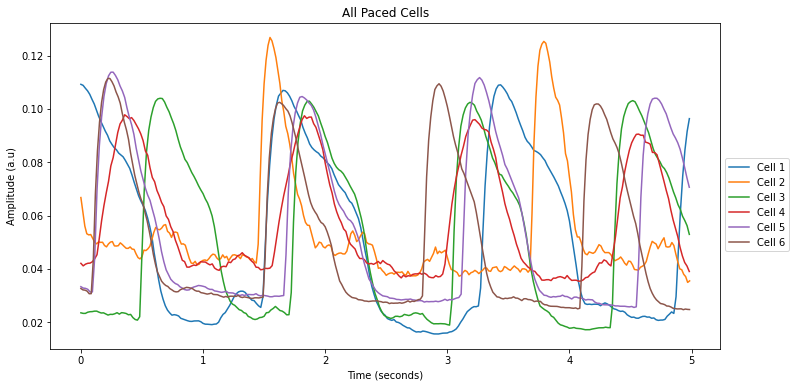

In [ ]:
#smaller_plotGivenTimeNorm(norm,start,end,arr,fps,label,ls,mark)
tStart = 0
tEnd = 5
plt.figure(figsize=(12,6))
smaller_plotGivenTimeNorm(tStart,tEnd,Cell_1_BF_C4p,55,'Cell 1','-',0)
smaller_plotGivenTimeNorm(tStart,tEnd,Cell_2_BF_C4p,62,'Cell 2','-',0)
smaller_plotGivenTimeNorm(tStart,tEnd,Cell_3_BF_C4p,54,'Cell 3','-',0)
smaller_plotGivenTimeNorm(tStart,tEnd,Cell_4_BF_C4p,53,'Cell 4','-',0)
smaller_plotGivenTimeNorm(tStart,tEnd,Cell_5_BF_C4p,53,'Cell 5','-',0)
smaller_plotGivenTimeNorm(tStart,tEnd,Cell_5_BF_C4p,59,'Cell 6','-',0)
plt.xticks(np.arange(tStart,tEnd+1,step=1))
plt.title("All Paced Cells")
plt.legend(bbox_to_anchor=(1, 0.6), loc=2, prop={'size': 10})
plt.show()

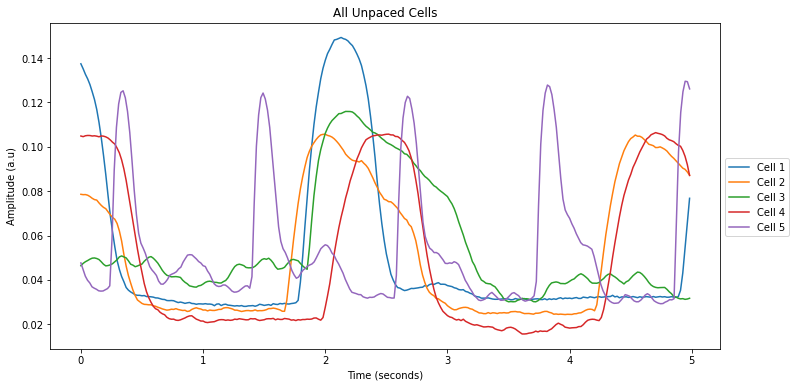

In [ ]:
tStart = 0
tEnd = 5
plt.figure(figsize=(12,6))
smaller_plotGivenTimeNorm(tStart,tEnd,Cell_1_BF_C4u,54,'Cell 1','-',0)
smaller_plotGivenTimeNorm(tStart,tEnd,Cell_2_BF_C4u,54,'Cell 2','-',0)
smaller_plotGivenTimeNorm(tStart,tEnd,Cell_3_BF_C4u,54,'Cell 3','-',0)
smaller_plotGivenTimeNorm(tStart,tEnd,Cell_4_BF_C4u,54,'Cell 4','-',0)
smaller_plotGivenTimeNorm(tStart,tEnd,Cell_5_BF_C4u,55,'Cell 5','-',0)
plt.xticks(np.arange(tStart,tEnd+1,step=1))
plt.title("All Unpaced Cells")
plt.legend(bbox_to_anchor=(1, 0.6), loc=2, prop={'size': 10})
plt.show()

# Paced vs Unpaced

In [ ]:
tStart = 0
tEnd = 5
plt.figure(figsize=(12,6))
smaller_plotGivenTime(tStart,tEnd,Cell_1_BF_C4p,55,'Cell 1','-',0)
smaller_plotGivenTime(tStart,tEnd,Cell_2_BF_C4p,62,'Cell 2','-',0)
smaller_plotGivenTime(tStart,tEnd,Cell_3_BF_C4p,54,'Cell 3','-',0)
smaller_plotGivenTime(tStart,tEnd,Cell_4_BF_C4p,53,'Cell 4','-',0)
smaller_plotGivenTime(tStart,tEnd,Cell_5_BF_C4p,53,'Cell 5','-',0)
smaller_plotGivenTime(tStart,tEnd,Cell_5_BF_C4p,59,'Cell 6','-',0)
plt.xticks(np.arange(tStart,tEnd+1,step=1))
plt.title("All Paced Cells")
plt.legend(bbox_to_anchor=(1, 1.017), loc=2, prop={'size': 10})
plt.show()

In [ ]:
#smaller_plotGivenTimeNorm(norm,start,end,arr,fps,label,ls,mark)
tStart = 0
tEnd = 5
plt.figure(figsize=(12,6))
smaller_plotGivenTimeNorm(tStart,tEnd,Cell_1_BF_C4p,55,'Cell 1','-',0)
smaller_plotGivenTimeNorm(tStart,tEnd,Cell_2_BF_C4p,62,'Cell 2','-',0)
smaller_plotGivenTimeNorm(tStart,tEnd,Cell_3_BF_C4p,54,'Cell 3','-',0)
smaller_plotGivenTimeNorm(tStart,tEnd,Cell_4_BF_C4p,53,'Cell 4','-',0)
smaller_plotGivenTimeNorm(tStart,tEnd,Cell_5_BF_C4p,53,'Cell 5','-',0)
smaller_plotGivenTimeNorm(tStart,tEnd,Cell_5_BF_C4p,59,'Cell 6','-',0)
plt.xticks(np.arange(tStart,tEnd+1,step=1))
plt.title("All Paced Cells")
plt.legend(bbox_to_anchor=(1, 1.017), loc=2, prop={'size': 10})
plt.show()

In [ ]:
tStart = 0
tEnd = 5
plt.figure(figsize=(12,6))
smaller_plotGivenTimeNorm(tStart,tEnd,Cell_1_BF_C4u,54,'Cell 1','-',0)
smaller_plotGivenTimeNorm(tStart,tEnd,Cell_2_BF_C4u,54,'Cell 2','-',0)
smaller_plotGivenTimeNorm(tStart,tEnd,Cell_3_BF_C4u,54,'Cell 3','-',0)
smaller_plotGivenTimeNorm(tStart,tEnd,Cell_4_BF_C4u,54,'Cell 4','-',0)
smaller_plotGivenTimeNorm(tStart,tEnd,Cell_5_BF_C4u,55,'Cell 5','-',0)
plt.xticks(np.arange(tStart,tEnd+1,step=1))
plt.title("All Unpaced Cells")
plt.legend(bbox_to_anchor=(1, 1.017), loc=2, prop={'size': 10})
plt.show()

# Line Graph Code (v1)

In [ ]:
import os
import time
import math
import numpy as np
import numpy.linalg as npla
import scipy
from scipy import linalg as spla
import scipy.sparse
import scipy.sparse.linalg
from scipy import integrate
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import axes3d
from collections import Counter 
np.set_printoptions(precision = 4)

def get_timearray(arr,fps):
  length = len(arr)
  time = np.zeros(length)
  for i in range(length):
    time[i] = i/fps
  return time

# Just for convenience #
def createLabels():
  plt.xlabel('Time (seconds)')
  plt.ylabel('Amplitude (a.u)')

# To get multiple lines on the same graph, get rid of plt.show and put it later, outside of function. #
def create_plot(arr,fps,title,start,end):
  # plt.figure(figsize=(12,6))
  time = get_timearray(arr,fps)
  startindex = int(fps*start)
  endindex = int(fps*end)
  newtime = time[startindex:endindex]
  newamplitude = arr[startindex:endindex]
  plt.plot(newtime, newamplitude, color='black')
  # plt.title(title)
  # createLabels()
  # plt.show()

def smaller_plotGivenTime(start,end,arr,fps,label,ls,shift):
  time = get_timearray(arr,fps)
  time += shift
  startindex = int(fps*start)
  endindex = int(fps*end)
  newtime = time[startindex:endindex]
  newamplitude = arr[startindex:endindex]
  plt.plot(newtime, newamplitude, label=label, linestyle=ls)
  createLabels()

def norm(data):
  return data/np.linalg.norm(data)

def smaller_plotGivenTimeNorm(start,end,arr,fps,label,ls,shift):
  time = get_timearray(arr,fps)
  time += shift
  startindex = int(fps*start)
  endindex = int(fps*end)
  newtime = time[startindex:endindex]
  newamplitude = arr[startindex:endindex]
  plt.plot(newtime, norm(newamplitude), label=label, linestyle=ls)
  createLabels()

# H251N C3 vs C4

**C3 videos**

In [ ]:
#H251N_C3_vs_C4\Myocyter\C3_videos
#21
Cell_1_BF_c31 = [3.617,3.6146,3.6748,3.6818,3.6908,3.7104,3.7125,3.705,3.7119,3.7305,3.758,3.7974,3.8243,3.8314,3.8348,3.8181,3.8302,3.8388,3.8372,3.8017,3.8144,3.8242,3.7974,3.7958,3.7976,3.7744,3.7826,3.7717,3.8012,3.7583,3.7396,3.6919,3.7868,4.6812,5.7691,6.8047,7.6698,8.4157,9.0388,9.5132,9.9632,10.2836,10.5341,10.7126,10.8497,10.9387,10.9757,10.9724,10.9172,10.8056,10.7374,10.608,10.581,10.5751,10.5817,10.559,10.5985,10.4968,10.4337,10.3245,10.2528,10.1688,9.9138,9.6448,9.302,8.8475,8.4144,8.0026,7.5225,7.0709,6.5425,6.1525,5.77,5.3959,5.0734,4.8196,4.5659,4.2992,4.0654,3.8678,3.7538,3.644,3.583,3.5269,3.4749,3.4505,3.4275,3.3958,3.4071,3.3968,3.3937,3.419,3.423,3.435,3.4596,3.4695,3.5047,3.5401,3.5548,3.5821,3.6055,3.6175,3.6329,3.636,3.6623,3.6609,3.6586,3.7092,3.7355,3.7338,3.763,3.7765,3.7753,3.7881,3.8148,3.8133,3.808,3.8087,3.8007,3.7756,3.7666,3.7364,3.6908,3.6557,4.4499,5.5152,6.5621,7.438,8.1828,8.7601,9.2704,9.6805,9.9986,10.2981,10.4885,10.6649,10.7683,10.8,10.8145,10.7599,10.7014,10.6287,10.5251,10.46,10.4639,10.4977,10.496,10.4801,10.4759,10.4531,10.4127,10.3232,10.1533,9.9656,9.7254,9.4358,9.0509,8.6884,8.2262,7.7002,7.1522,6.6715,6.1679,5.6354,5.1723,4.7533,4.4209,4.1438,3.9502,3.7322,3.5742,3.4781,3.4115,3.3273,3.3317,3.3008,3.3038,3.3225,3.3069,3.3442,3.3482,3.3793,3.3854,3.3666,3.4166,3.4517,3.4863,3.5072,3.4846,3.5374,3.5612,3.5698,3.6014,3.6258,3.6573,3.6638,3.6876,3.7017,3.6878,3.6773,3.6661,3.7072,3.7329,3.7438,3.7468,3.7265,3.7396,3.7103,3.6825,3.6601,3.527,4.191,5.294,6.391,7.3305,8.1511,8.7803,9.279,9.7175,10.0289,10.2811,10.5005,10.6201,10.7025,10.7688,10.7855,10.7945,10.7687,10.6973,10.6419,10.6445,10.6338,10.5839,10.5281,10.4792,10.4556,10.387,10.2751,10.2247,10.0925,9.8557,9.6662,9.3334,9.0264,8.7342,8.3078,7.8849,7.4441,6.9122,6.3454,5.8279,5.4509,5.0068,4.644,4.2667,3.9573,3.7078,3.546,3.3904,3.3069,3.2326,3.191,3.1524,3.1546,3.1126,3.1126,3.1313,3.167,3.1695,3.2111,3.2327,3.2424,3.2584,3.2953,3.3131,3.3185,3.3555,3.4014,3.3874,3.3964,3.4249,3.421,3.4356,3.4583,3.475,3.4828,3.5129,3.5459,3.5734,3.5744,3.5661,3.56,3.5492,3.5197,3.4684,3.3661,3.8409,4.8997,6.0312,7.0435,7.8685,8.5426,9.1327,9.5679,9.9236,10.2484,10.4602,10.6735,10.8391,10.8835,10.9426,10.904,10.8842,10.783,10.7311,10.6467,10.6198,10.6209,10.6353,10.6362,10.6154,10.5646,10.4599,10.4044,10.3003,10.1391,9.957,9.6924,9.3247,8.9658,8.5036,7.8995,7.371,6.7139,6.1995,5.6887,5.232,4.8549,4.4808,4.2247,3.9947,3.8243,3.6915,3.6065,3.5145,3.4843,3.4291,3.3511,3.3419,3.343,3.3322,3.3186,3.3199,3.3111,3.3245,3.3386,3.3506,3.3789,3.4153,3.4028,3.3995,3.4041,3.4242,3.4582,3.4792,3.5053,3.5127,3.5511,3.5605,3.5793,3.5816,3.5944,3.6133,3.6084,3.5743,3.585,3.5903,3.583,3.5876,3.5917,3.6069,3.588,3.5942,3.554,3.4551,3.7192,4.7227,5.8328,6.8478,7.7455,8.4729,9.0374,9.5228,9.899,10.1743,10.4373,10.5938,10.6942,10.7856,10.7689,10.7377,10.6765,10.668,10.5702,10.5894,10.6018,10.5827,10.6214,10.6092,10.5612,10.5056,10.4362,10.2963,10.16,9.9475,9.7826,9.5029,9.1938,8.8244,8.4527,7.9789,7.528,6.9602,6.4344,5.859,5.4338,5.0211,4.6609,4.2758,4.0474,3.8334,3.6914,3.567,3.4876,3.4465,3.3921,3.3819,3.3798,3.3856,3.3545,3.3614,3.3783,3.388,3.4006,3.4068,3.4173,3.4502,3.4535,3.4724,3.5164,3.5338,3.5224,3.5215,3.533,3.5143,3.5242,3.5249,3.5497,3.5569,3.5801,3.5768,3.6031,3.6239,3.6475,3.6467,3.6441,3.6635,3.6735,3.6469,3.6092,3.6031,3.565,3.4949,3.8925,4.9274,6.0413,7.05,7.8975,8.5891,9.1662,9.5727,9.9317,10.2006,10.4335,10.5643,10.6832,10.7819,10.7736,10.789,10.6803,10.6618,10.5429,10.5016,10.4875,10.5135,10.5759,10.5802,10.5308,10.5551,10.5154,10.4061,10.2673,10.0846,9.9427,9.667,9.4207,9.1708,8.8099,8.4144,7.9164,7.3463,6.6806,6.146,5.6584,5.2747,4.8866,4.5532,4.3202,4.0486,3.8683,3.7206,3.6228,3.5335,3.4793,3.4306,3.3914,3.3803,3.3663]
Cell_2_BF_c31 = [4.2637,4.1024,4.0007,3.993,3.9783,3.9488,4.0076,4.0197,4.0298,4.0042,3.9893,4.0571,4.0638,4.1167,4.0956,4.087,5.0613,6.6083,7.9216,8.9975,9.8423,10.5263,11.0676,11.4762,11.7713,12.0573,12.3298,12.5718,12.711,12.934,13.1749,13.3318,13.4924,13.6046,13.6811,13.6146,13.6073,13.5204,13.3325,13.1045,12.8393,12.5511,11.9997,11.2687,10.3631,9.2647,8.1246,6.8776,6.0431,5.3202,4.6997,4.3119,4.0739,3.9147,3.8414,3.7802,3.7379,3.6916,3.6754,3.6837,3.6723,3.6884,3.6965,3.6341,3.709,3.8756,4.0179,4.1397,4.3738,4.5671,4.7741,4.9408,5.0274,5.0667,5.0425,4.9023,4.6888,4.4073,4.0866,3.8435,3.7319,3.6803,4.0568,5.75,7.2727,8.4763,9.4442,10.2328,10.817,11.3283,11.6873,12.0139,12.2585,12.4675,12.6249,12.8181,12.9566,13.1807,13.3305,13.515,13.6192,13.6317,13.5314,13.415,13.2558,13.1177,12.8486,12.6079,12.2641,11.8463,11.3321,10.6063,9.8337,9.1596,8.3015,7.3817,6.4459,5.6141,4.7494,4.1619,3.7961,3.5644,3.407,3.3239,3.2227,3.1475,3.1292,3.0946,3.0596,2.9791,2.8905,2.8045,2.7698,2.7698,2.8394,2.8748,2.9211,2.979,3.0243,3.1036,3.1685,3.2008,3.1773,3.3395,3.5134,3.7304,3.9555,4.1245,4.2943,4.4583,5.547,7.136,8.4563,9.4578,10.3163,10.9127,11.3597,11.7035,11.9186,12.1259,12.3537,12.5295,12.7398,12.9026,13.0905,13.2335,13.3622,13.5233,13.5537,13.5532,13.4634,13.3292,13.104,12.8994,12.6571,12.3082,11.8221,11.1489,10.2484,9.3529,8.5054,7.8105,6.7139,5.6932,5.116,4.7901,4.5637,4.5237,4.5883,4.7166,4.862,4.9541,5.0278,5.0074,4.9349,4.8192,4.5566,4.2757,3.9702,3.854,3.7474,3.7071,3.7039,3.7033,3.7557,3.7628,3.811,3.8178,3.8697,3.8689,3.8824,3.8915,3.8975,3.8979,3.9659,3.9406,4.0318,5.3441,6.931,8.2505,9.2978,10.1214,10.8056,11.3582,11.7514,12.0495,12.2829,12.5344,12.6913,12.9005,13.0983,13.3166,13.4992,13.5403,13.6495,13.6193,13.6046,13.5002,13.3209,13.1695,12.9597,12.6895,12.2779,11.7711,11.0577,10.275,9.4453,8.5145,7.5317,6.4849,5.7109,5.1291,4.743,4.4306,4.27,4.1774,4.1418,4.1497,4.1704,4.1967,4.2498,4.2637,4.3106,4.5084,4.6441,4.8454,4.9641,5.0879,5.1566,5.3233,5.4197,5.4134,5.4294,5.4231,5.2667,5.0169,4.7363,4.4792,4.3205,4.2244,4.1758,4.1816,4.1733,4.2068,4.2202,4.2719,5.4381,6.9793,8.2993,9.3508,10.1772,10.8375,11.3603,11.725,12.056,12.281,12.4918,12.6988,12.9338,13.1387,13.3231,13.5092,13.6574,13.7382,13.758,13.8031,13.8334,13.7094,13.5169,13.1944,12.9272,12.5186,11.8957,11.0414,10.0683,9.1891,8.1887,7.216,6.3019,5.6281,5.2075,4.8377,4.6428,4.4968,4.4224,4.4234,4.4057,4.4204,4.4231,4.389,4.3441,4.2777,4.2467,4.1671,4.2004,4.1737,4.1977,4.1953,4.243,4.2661,4.316,4.4704,4.6847,4.8457,4.9654,5.0457,5.1628,5.2305,5.1982,5.1821,5.2188,5.2381,5.2348,5.214,5.1901,5.024,5.6782,6.9264,8.1383,9.145,10.0174,10.6516,11.1995,11.6678,11.9799,12.2115,12.4445,12.6353,12.7963,13.0118,13.248,13.3544,13.5045,13.5906,13.6175,13.5476,13.5225,13.4564,13.3307,13.1911,12.9539,12.6266,12.0471,11.3037,10.3471,9.4393,8.5714,7.6754,6.7915,6.215,5.9049,5.6886,5.5849,5.4474,5.3729,5.2415,4.9992,4.7608,4.5784,4.464,4.3918,4.3702,4.3528,4.351,4.327,4.3401,4.4097,4.4353,4.4153,4.3969,4.392,4.4443,4.3901,4.4552,4.4546,4.453,4.4452,4.4519,4.4754,4.4658,4.5107,4.5457,4.6545,4.807,5.5313,6.9451,8.2696,9.3733,10.2444,10.9194,11.5136,11.9369,12.1819,12.4451,12.5844,12.7202,12.7953,12.9609,13.0504,13.2266,13.4051,13.5494,13.6493,13.6722,13.6795,13.6327,13.4541,13.2193,12.8841,12.4927,11.9835,11.3383,10.4115,9.5606,8.6553,7.8445,6.9119,6.0194,5.449,5.1063,4.9169,4.8161,4.7403,4.8259,4.9304,5.0115,5.1447,5.1831,5.2839,5.392,5.4891,5.5128,5.5599,5.5725,5.6006,5.5211,5.3262,5.102,4.8342,4.667,4.6077,4.5878,4.5828,4.5894,4.6232,4.6289,4.6271,5.3984,6.76,8.0508,9.0823,9.9558,10.6843,11.2003,11.6535,11.9935,12.2272,12.3986,12.5623,12.7367,12.9012,13.0559,13.1906,13.2385,13.2664,13.2868,13.3205,13.2193,13.1897,13.1257,13.0237,12.9258,12.7708,12.6045,12.3336,11.9215,11.1819,10.2185,9.1673,8.0821,7.0397,6.2835,5.6424,5.2384,5.02,4.9206,4.8555,4.8161,4.861,4.8171,4.7453,4.6848,4.6704,4.6146,4.6227,4.6348,4.6556]
Cell_3_BF_c31 = [12.9766,12.7095,12.3793,11.9428,11.1745,10.1073,8.9846,7.8939,7.24,6.7419,6.3896,6.1774,5.8743,5.6031,5.4591,5.3876,5.2564,5.1668,5.1973,5.0208,4.908,4.9665,4.9647,4.8487,4.7549,4.7639,4.6698,4.7128,4.8153,4.6886,4.5754,4.5016,4.4646,4.4534,4.5794,4.5845,4.442,4.3908,4.3432,4.2969,4.3168,4.4055,4.4482,4.3396,4.2103,4.1945,4.1219,4.2018,4.3661,4.2934,4.1509,4.0787,4.0568,4.0805,4.2388,4.2917,4.2217,4.028,3.9738,3.9762,4.0477,4.2357,4.2315,4.0796,3.939,3.9357,3.9097,4.0236,4.1712,4.183,3.9194,3.8744,3.821,3.8609,4.0387,4.2219,4.0662,3.8851,3.7786,3.7791,3.8545,4.0547,4.1671,4.0253,3.8172,3.6782,3.6932,3.8206,4.1116,4.13,3.8732,3.6519,3.6301,3.6633,3.8706,4.0653,4.0118,3.7375,3.5209,3.5215,3.5368,3.7234,3.9832,3.7569,3.5276,3.4415,3.3894,3.4967,3.697,3.7687,3.5347,3.2894,3.285,3.285,3.4459,3.7521,3.7412,3.5051,3.4152,3.3992,3.4978,3.6902,3.8645,3.8136,3.5959,3.5424,3.5422,3.5941,3.8277,3.9799,3.7969,3.63,3.5805,3.6173,3.7537,3.9762,4.0172,3.785,3.6376,3.6609,3.6939,3.8859,4.0924,4.0431,3.8263,3.7145,3.7149,3.8367,3.9789,4.2105,4.049,3.8319,3.8004,3.7966,3.8889,4.0821,4.1797,4.0166,3.8904,3.8175,3.8192,3.9817,4.2605,4.2729,4.0751,3.9447,3.9161,3.9462,4.1706,4.3318,4.2721,4.0434,3.9845,3.9953,4.1012,4.3155,4.4398,4.2351,4.0774,4.025,4.0358,4.2333,4.4239,4.5289,4.2668,4.0898,4.027,4.1065,4.2764,4.6275,6.4861,8.4583,10.0568,11.4074,12.2647,12.9524,13.5901,14.1599,14.6876,15.1416,15.3255,15.5106,15.5467,15.6282,15.7346,15.7539,15.7115,15.4765,15.2419,15.039,14.8993,14.777,14.5649,14.3016,13.9764,13.774,13.5057,13.2628,13.0821,12.8953,12.7114,12.3145,11.7942,11.1132,10.1823,9.2432,8.3604,7.6222,6.9118,6.3603,6.1414,5.8534,5.6596,5.5604,5.4242,5.2813,5.2407,5.1604,5.0301,5.0179,4.9624,4.8328,4.8173,4.8993,4.7869,4.6607,4.6897,4.6136,4.582,4.6797,4.7706,4.6363,4.5122,4.4844,4.4597,4.5104,4.6483,4.6818,4.5483,4.4903,4.5083,4.4485,4.5522,4.6723,4.6353,4.5088,4.4483,4.4123,4.4605,4.5521,4.6712,4.5743,4.4367,4.3945,4.4655,4.4992,4.7096,4.7369,4.6185,4.49,4.4508,4.4808,4.524,4.6887,4.723,4.5572,4.4111,4.4317,4.4509,4.5957,4.7201,4.6609,4.5043,4.4501,4.5152,4.5237,4.706,4.8057,4.648,4.5326,4.4601,4.4697,4.5561,4.7499,4.7457,4.668,4.4694,4.4331,4.4641,4.6115,4.7659,4.7376,4.5277,4.467,4.5638,5.9826,7.8408,9.4613,10.7303,11.8034,12.6379,13.2043,13.5858,13.9328,14.2886,14.5771,14.7725,14.8959,14.9098,14.8633,14.8123,14.7539,14.7448,14.6719,14.4007,14.1857,13.9449,13.7259,13.575,13.4985,13.3675,13.2064,12.948,12.7387,12.59,12.3709,12.1047,11.5081,10.4729,9.337,8.3532,7.55,7.0234,6.7216,6.4124,6.1126,5.8368,5.772,5.6553,5.5825,5.5645,5.523,5.3559,5.3175,5.2941,5.2752,5.1992,5.1956,5.1974,5.1232,5.1142,5.1815,5.0838,5.0519,5.0788,5.0511,4.9739,5.0057,5.05,4.9242,4.9683,4.9582,4.9452,4.9285,5.0124,4.9782,4.8511,4.9209,4.9074,4.8358,4.8928,4.9969,4.9091,4.8501,4.8599,4.8563,4.8197,4.9171,4.9721,4.8983,4.8222,4.8813,4.833,4.861,4.9201,4.9404,4.8347,4.8391,4.8214,4.7643,4.8436,4.9601,4.9127,4.7966,4.7624,4.7554,4.8083,4.9268,4.93,4.8836,4.7717,4.7947,4.8213,4.8289,4.9647,4.9115,4.7861,4.7304,4.7591,4.7415,4.8419,4.9865,4.9243,4.815,4.7665,4.8137,4.7835,4.8805,5.0275,4.8832,4.7876,4.7772,4.7961,4.8027,4.9011,4.9882,4.8623,4.7671,4.7465,4.776,4.8235,5.0179,4.9283,4.8414,4.8175,4.7963,4.784,4.9039,4.9768,4.9285,4.7971,4.7981,4.7768,4.8027,4.9933,5.0432,4.968,4.8333,4.8265,4.8341,4.9044,5.1187,5.1007,4.9566,4.8464,5.1167,6.1813,7.4363,8.6068,9.6819,10.6797,11.6872,12.4379,12.9477,13.3398,13.7863,14.1437,14.4942,14.8037,14.9928,14.9587,14.9606,15.0202,15.0674,15.1129,15.1148,15.0004,14.7233,14.5202,14.3069,14.1814,14.0521,13.9318,13.5552,13.1738,12.9601,12.7342,12.5029,12.1034,11.565,10.587,9.5271,8.6595,7.8792,7.3583,6.9707,6.6114,6.3038,6.024,5.9267,5.7991,5.7765,5.7675,5.6906,5.5259,5.5208,5.4564,5.4176,5.3973,5.4055,5.2656,5.2034,5.2403,5.1884,5.1311,5.1931,5.1364,5.0392,5.0818,5.1097,4.9958,5.0274,5.1233,5.0901,5.0023,5.0776,5.0517,4.9734,5.0522,5.0444,4.9911,5.0036,5.052,5.0285,4.9833,5.0024,5.0195,4.941,4.9747,5.0563,4.9883,4.9765,4.9849,5.0208,4.992,5.0399,5.1039,5.0096,4.9223,5.0101,5.0036,5.0177,5.1615,5.1435,4.9463,4.9533,5.0398,4.9326,5.0394,5.1198,5.0333,4.9466,4.9325,4.9444]
Cell_4_BF_c31 = [3.1734,3.1663,3.1522,3.1702,3.1783,3.2074,3.2423,3.2254,3.232,3.2244,3.1666,3.1655,3.1392,3.1634,3.1938,3.1815,3.1978,3.2011,3.2053,3.1812,3.1293,3.1424,3.1573,3.1254,3.1421,3.1622,3.161,3.1403,3.1352,3.1275,3.1419,3.15,3.1453,3.1331,3.1236,3.1322,3.13,3.1144,3.1109,3.141,3.1238,3.1602,3.1497,3.1474,3.1368,3.1463,3.1415,3.1358,3.1291,3.1579,3.127,3.1274,3.1022,3.1228,3.4961,4.3513,5.2173,5.9956,6.7634,7.4352,8.0235,8.5722,8.9895,9.3129,9.5674,9.7229,9.8017,9.8868,9.8995,9.9958,10.0338,10.0287,10.0242,10.0206,9.973,9.8999,9.8119,9.7922,9.7405,9.7197,9.6876,9.6304,9.5788,9.4782,9.3468,9.255,9.0898,8.986,8.8784,8.6852,8.5009,8.156,7.6776,7.0543,6.5455,5.9233,5.3305,4.722,4.3013,4.0201,3.8453,3.7049,3.6284,3.5445,3.4948,3.4509,3.4239,3.4038,3.375,3.3904,3.3795,3.3327,3.296,3.2986,3.2938,3.2697,3.2463,3.256,3.2835,3.3041,3.2939,3.2512,3.191,3.1942,3.1949,3.2002,3.2017,3.2566,3.2595,3.236,3.2012,3.1751,3.1485,3.1623,3.1453,3.18,3.1591,3.1473,3.1713,3.1619,3.1594,3.1458,3.1689,3.1645,3.153,3.1451,3.168,3.1648,3.1729,3.1415,3.1548,3.1483,3.1575,3.1375,3.1251,3.1853,3.6787,4.5249,5.3706,6.1076,6.7888,7.422,7.9273,8.3975,8.7866,9.0734,9.3298,9.4121,9.5243,9.5683,9.6293,9.6877,9.6615,9.7215,9.7466,9.7142,9.6761,9.5815,9.5246,9.439,9.4398,9.3944,9.4162,9.4144,9.3468,9.276,9.158,8.9979,8.9161,8.7633,8.6063,8.4364,8.1928,7.831,7.3342,6.7265,6.0976,5.5758,4.966,4.4,4.0498,3.8135,3.7299,3.6345,3.5404,3.4748,3.4423,3.4181,3.3743,3.3299,3.3666,3.3568,3.367,3.3099,3.2789,3.2612,3.2654,3.2627,3.2532,3.2446,3.2408,3.2228,3.1991,3.1962,3.1728,3.1511,3.164,3.1422,3.1427,3.1594,3.1733,3.1725,3.1655,3.1834,3.1702,3.1481,3.1593,3.1593,3.1655,3.1776,3.1774,3.1745,3.1437,3.1049,3.0987,3.1009,3.0971,3.1276,3.1409,3.129,3.13,3.1039,3.0585,3.0959,3.0641,3.0545,3.0743,3.0782,3.1173,3.1051,3.0604,3.0719,3.0626,3.0532,3.0688,3.0573,3.0446,3.0512,3.05,3.0301,3.0406,3.059,3.4871,4.3585,5.261,6.0779,6.8444,7.5291,8.0394,8.4768,8.815,9.1099,9.3282,9.4615,9.6268,9.7358,9.8296,9.8508,9.8022,9.7677,9.7096,9.659,9.6582,9.626,9.6201,9.6621,9.5883,9.4955,9.437,9.3352,9.2212,9.1729,9.118,9.0261,8.886,8.7061,8.495,8.231,7.8503,7.2416,6.7185,6.1521,5.5661,5.0588,4.6222,4.2332,3.9227,3.6894,3.6064,3.5209,3.4552,3.4299,3.4192,3.3912,3.3457,3.2963,3.2601,3.2224,3.2137,3.2122,3.2267,3.2104,3.2075,3.2076,3.1664,3.1624,3.1603,3.1411,3.1236,3.1134,3.1234,3.1176,3.1501,3.1107,3.0727,3.0708,3.0576,3.0609,3.0458,3.0414,3.057,3.0722,3.0445,3.024,3.0333,3.0089,3.0163,3.0414,3.0413,3.0486,3.0902,3.0792,3.0511,3.0195,2.9923,2.9996,2.998,3.009,3.0189,3.0222,3.0118,2.9836,2.9725,2.9543,2.9683,2.9787,2.9589,2.9647,2.988,2.9716,2.9696,2.9579,2.9412,2.9398,2.9678,2.9622,2.9417,2.9561,2.9772,2.9655,2.9436,2.9387,2.9056,2.9194,2.9228,2.8988,2.9106,2.9374,2.9327,2.9253,2.9213,2.9403,2.9201,2.9149,2.9476,2.9369,2.9432,2.9723,2.9332,2.9315,2.8994,2.889,2.918,2.938,2.968,3.0054,3.0167,2.9825,2.9674,2.9311,2.9093,2.9234,2.9339,2.9424,2.9682,2.9718,2.9534,2.9122,2.8927,2.8812,2.8838,2.9061,2.9015,2.8835,2.8865,2.8788,2.8677,2.8698,2.8894,2.9036,2.8836,2.8606,2.869,2.8679,2.8568,2.8652,2.845,2.8971,2.8541,2.8798,2.8656,2.8856,2.8962,2.952,2.9862,2.9645,2.942,2.9232,2.9382,2.939,2.9458,2.9768,2.993,2.9933,2.9394,2.928,2.8911,2.8712,2.8741,2.8833,2.9072,2.9001,2.9045,2.8615,2.8432,2.8278,2.8541,2.8447,2.8234,2.8314,2.8335,2.8467,2.8551,2.8002,2.8002,2.8096,2.8012,2.8161,2.8179,2.834,2.8517,2.8575,2.8525,2.8297,3.1823,4.0054,4.8894,5.7761,6.5784,7.3545,7.9652,8.4646,8.8349,9.1203,9.4006,9.5764,9.7495,9.8592,9.965,10.0062,10.013,10.0165,9.9588,9.9029,9.847,9.8496,9.8652,9.8205,9.7398,9.6746,9.5517,9.4215,9.2576,9.0792,8.9355,8.7773,8.5889,8.3033,7.897,7.3386,6.6876,6.0635,5.434,4.7661,4.3611,4.0296,3.7657,3.623,3.517,3.411,3.3413,3.2943,3.2762,3.253,3.2431,3.2382,3.2362,3.2076,3.1821,3.1428,3.126,3.0978,3.1329,3.1185,3.1288,3.1377]
# FPS (respectively): 53,54,59,56
# Contractions (respectively): 6,8,4,4
#27
Cell_1_BF_c37 = [4.9776,5.0128,5.043,4.9501,4.9857,4.9796,4.9701,5.3133,6.1794,6.9926,7.7139,8.3376,8.81,9.2942,9.5733,9.8124,10.0305,10.22,10.414,10.5898,10.7162,10.7057,10.8223,10.901,10.919,10.9543,11.034,10.9123,10.9984,10.9511,11.1015,11.0406,11.0835,10.9377,10.7645,10.6248,10.3141,9.7166,9.0182,8.25,7.5742,6.9407,6.435,6.0028,5.7342,5.5246,5.4124,5.173,5.0634,5.0239,4.9357,4.8278,4.7641,4.6897,4.5944,4.5599,4.4673,4.4557,4.3963,4.3851,4.3616,4.3351,4.235,4.2479,4.2117,4.1909,4.1666,4.11,4.0811,4.0242,4.0143,3.9702,3.9023,3.9,3.8634,3.7101,3.6896,3.6896,3.7921,3.8811,3.902,4.0468,4.8437,5.6909,6.3784,7.1062,7.6508,8.1464,8.5833,8.9333,9.2206,9.4603,9.697,9.9105,10.0713,10.2012,10.2496,10.3172,10.2977,10.3555,10.2562,10.2961,10.336,10.3006,10.3586,10.2634,10.2562,10.2966,10.2929,10.285,10.2621,10.109,10.0514,9.7805,9.2654,8.6728,7.9734,7.3093,6.7317,6.1568,5.7782,5.5549,5.3723,5.313,5.2163,5.1631,5.0917,5.0713,5.0495,5.0701,5.063,5.0023,5.0079,4.979,5.0229,4.9464,4.9623,4.9556,4.9141,4.9655,4.9101,4.965,5.0031,5.0064,5.0234,5.0106,5.0353,5.0283,5.0207,5.0287,5.0313,5.0602,5.071,5.0665,5.0582,5.1034,5.1484,5.1321,5.1091,5.6923,6.6229,7.4774,8.237,8.823,9.3063,9.7138,9.9839,10.2545,10.4313,10.7327,10.9347,11.0658,11.0593,11.1316,11.1648,11.1887,11.1709,11.1124,11.1028,11.1228,11.0326,10.969,10.9461,10.966,11.0437,10.9797,10.9846,10.9198,10.8111,10.6878,10.4222,10.0455,9.4663,8.7807,8.1239,7.398,6.8379,6.4578,6.2039,6.0543,6.0063,5.879,5.8326,5.8019,5.7278,5.7647,5.7132,5.6773,5.6753,5.6886,5.6485,5.6201,5.5973,5.64,5.5904,5.6449,5.6606,5.6188,5.6697,5.6403,5.6225,5.6344,5.6886,5.6877,5.6375,5.6461,5.6275,5.6568,5.6786,5.6579,5.6443,5.6597,5.638,5.6155,5.6452,5.6541,5.681,5.8914,6.6545,7.5221,8.1842,8.7766,9.2116,9.5519,9.8558,10.1322,10.4175,10.6602,10.8256,11.02,11.2068,11.2974,11.3657,11.4814,11.5457,11.5318,11.5052,11.5282,11.5057,11.5355,11.5635,11.4854,11.3554,11.3266,11.3888,11.3581,11.2925,11.1222,10.8415,10.2621,9.5915,8.916,8.2906,7.6467,7.1453,6.7838,6.491,6.345,6.2159,6.1715,6.1017,6.0234,5.9969,6.0356,6.0003,5.9684,5.9583,5.9343,5.9427,5.9589,5.8676,5.9542,5.9319,5.9221,5.9487,5.9474,5.9727,5.918,5.9197,5.9493,5.9458,5.9225,5.9305,5.9251,5.9516,6.0002,5.9924,6.0238,6.0084,6.0638,6.1064,6.7659,7.5867,8.3184,8.9327,9.346,9.6656,9.9838,10.1725,10.3897,10.6183,10.7282,10.9216,11.0455,11.0947,11.161,11.2533,11.2771,11.3347,11.3839,11.4125,11.4839,11.4701,11.4178,11.3589,11.293,11.2094,11.063,10.953,10.8879,10.7913,10.6491,10.3826,9.8855,9.3073,8.619,8.0653,7.4712,7.0971,6.8093,6.5922,6.4634,6.3289,6.2205,6.229,6.2021,6.2152,6.1512,6.142,6.1657,6.1477,6.1367,6.1471,6.0987,6.0699,6.0698,6.0602,6.0669,6.0528,6.0378,6.0662,6.0849,6.0635,6.1006,6.0885,6.0572,6.1122,6.0933,6.1591,6.1674,6.147,6.1155,6.1408,6.1523,6.188,6.1973,6.7395,7.5137,8.1958,8.7594,9.3042,9.6697,10.0287,10.3157,10.5313,10.7947,10.948,11.1748,11.3335,11.4215,11.4644,11.4999,11.5288,11.4665,11.5095,11.4775,11.4392,11.395,11.3889,11.3385,11.3722,11.3362,11.3201,11.3137,11.2493,11.1839,11.1092,11.0302,10.8484,10.5676,10.184,9.6311,9.0877,8.5422,7.996,7.565,7.2395,7.0096,6.8245,6.7651,6.722,6.6246,6.6051,6.5763,6.6146,6.5866,6.5512,6.5727,6.542,6.5148,6.4941,6.4974,6.5154,6.512,6.5041,6.5089,6.4976,6.5535,6.5349,6.5037,6.51,6.5514,6.5508,6.4852,6.4506,6.5294,6.5538,6.5249,6.5319,6.4942,6.5044,6.4998,6.5031,6.5192,6.5178,6.5507,7.2461,7.9674,8.696,9.2436,9.7208,10.0605,10.3758,10.6678,10.9316,11.1526,11.3253,11.3905,11.414,11.4794,11.6034,11.6165,11.6612,11.6162,11.6087,11.5288,11.521,11.4947,11.5167,11.6628,11.8042,11.8443,11.8699,11.8086]
Cell_2_BF_c37 = [5.269,5.2481,5.3555,5.3357,5.296,5.3314,5.3783,5.3992,5.3492,5.3956,5.3521,5.4064,5.4406,5.4162,5.4,5.4068,5.4218,5.4229,5.4107,5.4254,5.3758,5.3914,5.4215,5.4189,5.4201,5.4512,5.4291,5.4462,5.4268,5.472,5.4473,5.472,5.4732,5.4478,5.503,5.4588,5.4636,5.3394,5.2997,5.6536,6.2552,7.0316,7.9657,8.9925,9.9664,10.8702,11.6807,12.4263,12.9112,13.3223,13.6387,13.8469,14.0353,14.194,14.2195,14.306,14.3038,14.3071,14.2207,14.1199,13.752,13.1799,12.276,11.2825,10.1752,8.81,7.3821,6.2435,5.5496,5.1552,4.9295,4.8835,4.8456,4.8365,4.8622,4.8874,4.9363,4.9485,4.943,4.9409,4.9128,4.9372,4.9264,4.9398,4.9524,4.889,4.9629,4.945,4.9146,4.9487,4.9316,4.9407,4.9696,4.9924,4.9484,4.9633,4.9508,4.9492,4.8645,4.8819,4.862,4.8554,4.8666,4.8447,4.8507,4.852,4.7899,4.7845,4.7402,4.7615,4.7417,4.7795,4.6947,4.7583,4.6539,4.5133,4.5884,5.164,6.0641,7.1994,8.3286,9.4446,10.4632,11.3522,12.1117,12.7739,13.2421,13.6957,13.9632,14.1716,14.3815,14.4527,14.4667,14.5043,14.348,14.136,13.5856,12.7583,11.6861,10.4533,9.0546,7.6011,6.2763,5.2445,4.2796,3.7362,3.3796,3.1602,3.1473,3.1473,3.3035,3.4342,3.5376,3.6061,3.711,3.7675,3.8486,3.9148,3.9722,4.0388,4.0768,4.1576,4.1758,4.232,4.2566,4.2758,4.2978,4.322,4.3901,4.3764,4.4292,4.4782,4.4861,4.5638,4.563,4.5357,4.5309,4.5529,4.5984,4.6284,4.6073,4.6452,4.6196,4.6552,4.6424,4.6818,4.7049,4.6499,4.6201,5.0724,5.7916,6.8166,7.9468,9.0425,10.0618,11.0059,11.8288,12.534,13.0839,13.4905,13.862,14.1787,14.3598,14.4682,14.5375,14.5515,14.4534,14.2837,13.9696,13.3486,12.4925,11.5072,10.3278,9.1127,7.8377,6.7179,5.802,5.1636,4.8808,4.7317,4.7169,4.7532,4.7786,4.8182,4.798,4.8696,4.9224,4.8851,4.8807,4.9102,4.8558,4.9249,4.9157,4.9944,5.0059,5.0183,5.0449,5.0629,5.0968,5.0976,5.0839,5.0871,5.113,5.088,5.0532,5.0503,5.0949,5.1502,5.1626,5.1325,5.1379,5.1794,5.1958,5.1935,5.2386,5.2119,5.2463,5.2266,5.228,5.2133,5.2072,5.0986,5.0802,5.5381,6.2162,7.1479,8.2186,9.3075,10.3201,11.262,12.0758,12.8239,13.3002,13.7044,13.9689,14.2232,14.3586,14.4476,14.4608,14.4383,14.3966,14.2422,14.0413,13.538,12.8583,11.8385,10.6968,9.5016,8.2805,7.0992,6.2051,5.6932,5.3277,5.1568,5.0616,5.0461,5.0209,5.0152,5.0381,5.077,5.1339,5.0933,5.0843,5.1112,5.1293,5.119,5.1239,5.126,5.174,5.1703,5.1976,5.2262,5.1924,5.2077,5.2046,5.2827,5.2801,5.2663,5.3333,5.3068,5.352,5.3357,5.3518,5.3396,5.3344,5.3648,5.3716,5.3717,5.4208,5.4189,5.3902,5.436,5.4171,5.3846,5.2466,5.2649,5.6307,6.2271,7.0456,7.9669,8.9627,9.9425,10.8257,11.5796,12.2185,12.7776,13.241,13.563,13.8474,14.0777,14.1331,14.1783,14.2506,14.2279,14.1857,14.0708,13.7894,13.2653,12.4941,11.549,10.3978,9.1267,7.873,6.8576,6.0918,5.6065,5.4027,5.3143,5.2836,5.2769,5.3394,5.2962,5.2738,5.2537,5.2844,5.3546,5.3608,5.3644,5.38,5.3988,5.3623,5.3348,5.3554,5.3388,5.3648,5.3735,5.3917,5.4268,5.4519,5.4422,5.4719,5.5526,5.5314,5.515,5.5054,5.4625,5.4783,5.4957,5.49,5.5192,5.5951,5.5843,5.5555,5.5355,5.5588,5.5994,5.5659,5.6315,5.5962,5.6095,5.5991,5.6018,5.5556,5.5699,5.4358,5.4287,5.736,6.3119,7.0073,7.7995,8.7284,9.6172,10.4861,11.1042,11.7994,12.3454,12.8537,13.2634,13.6179,13.8726,14.0574,14.2039,14.1658,14.1969,14.1556,13.9512,13.661,13.1349,12.3529,11.3871,10.26,9.0875,8.0257,6.8774,6.2004,5.7189,5.4937,5.4689,5.4262,5.4292,5.4548,5.4888,5.5142,5.5318,5.5631,5.5679,5.5956,5.5844,5.5973,5.5656,5.5999,5.5946,5.6341,5.6131,5.6365,5.6191,5.6337,5.7074,5.6904,5.7205,5.7016,5.7489,5.7426,5.7428,5.7674,5.7361,5.7598,5.7631,5.7845,5.7924,5.8229,5.8009,5.766,5.7883,5.7726,5.7971,5.7822,5.755,5.8146,5.8041,5.7406,5.6511,5.8414,6.3134,7.0217]
Cell_3_BF_c37 = [8.0422,9.0996,10.113,10.9947,11.7932,12.5412,13.0083,13.4199,13.7947,14.0421,14.2236,14.2453,14.2589,14.2374,14.2078,14.0857,14.0905,13.921,13.7487,13.4743,13.2844,13.035,12.6461,12.0936,11.2078,10.0513,8.6018,7.4544,6.5492,5.7896,5.2247,4.8295,4.6142,4.5051,4.4756,4.4288,4.3864,4.3746,4.373,4.3653,4.405,4.3357,4.3773,4.3159,4.333,4.3379,4.2799,4.3019,4.2888,4.2878,4.2917,4.2964,4.2783,4.2882,4.2588,4.2712,4.2532,4.2418,4.2448,4.2459,4.2473,4.2484,4.2496,4.1859,4.2222,4.222,4.2519,4.2273,4.246,4.2369,4.2447,4.2438,4.2355,4.2423,4.5192,5.2894,6.3343,7.498,8.6898,9.8164,10.8289,11.7181,12.4307,12.9196,13.2748,13.5961,13.81,13.8772,13.9166,13.9882,13.9477,13.9337,13.813,13.6594,13.4055,13.2385,13.0796,12.8693,12.6473,12.2929,11.7411,10.765,9.4635,8.1405,6.9787,6.1562,5.4624,4.9272,4.5869,4.4339,4.3635,4.2719,4.2863,4.2438,4.2078,4.1923,4.2024,4.1649,4.2088,4.2072,4.2143,4.1889,4.1799,4.1651,4.168,4.148,4.1635,4.1283,4.1519,4.1525,4.1618,4.1507,4.1374,4.1719,4.1297,4.1545,4.117,4.1414,4.135,4.0991,4.1553,4.1605,4.166,4.1607,4.1686,4.1535,4.1923,4.1582,4.155,4.1592,4.1684,4.2877,5.0577,6.2241,7.449,8.6055,9.7205,10.7337,11.5918,12.3412,12.9669,13.5076,13.8418,14.0993,14.251,14.2305,14.1693,14.1158,14.0082,13.9188,13.8495,13.8149,13.6454,13.4342,13.2085,12.9523,12.589,11.9308,10.9123,9.63,8.269,6.9497,5.8771,5.269,4.8321,4.5874,4.3845,4.2968,4.2595,4.1962,4.1761,4.1487,4.1731,4.1275,4.119,4.0717,4.0857,4.0604,4.0465,4.0518,4.0467,4.0328,4.0481,4.0383,4.0043,4.039,3.9894,4.019,4.0032,3.9822,3.9713,3.984,4.0085,3.9712,3.979,3.971,3.9629,3.9638,3.981,3.9627,3.9433,3.9433,3.9814,3.9737,3.9823,3.9646,3.9831,3.988,4.0898,4.728,5.7994,7.0012,8.2001,9.2854,10.3467,11.2768,12.0766,12.7579,13.3137,13.6591,13.8591,13.9789,14.1213,14.1595,14.1493,14.1708,14.1578,14.0595,13.92,13.7373,13.6133,13.4217,13.1285,12.9391,12.6609,12.0407,11.2297,10.0212,8.7017,7.5209,6.7341,5.998,5.337,4.9286,4.6708,4.5456,4.4796,4.4282,4.383,4.3453,4.3454,4.349,4.3145,4.3217,4.298,4.2742,4.2922,4.232,4.2522,4.2717,4.2526,4.2366,4.2411,4.2319,4.2407,4.2264,4.2073,4.2146,4.2083,4.1587,4.216,4.2032,4.1559,4.1897,4.1823,4.2018,4.1826,4.1853,4.2094,4.1751,4.2334,4.198,4.1733,4.1763,4.1678,4.173,4.4387,5.1946,6.3131,7.4592,8.5737,9.6258,10.649,11.47,12.219,12.8897,13.4095,13.7077,13.9661,14.1594,14.2524,14.3019,14.3187,14.3081,14.2629,14.1244,14.0331,13.8073,13.6311,13.2656,12.9924,12.6142,12.0521,11.0957,9.9328,8.6312,7.4286,6.4307,5.736,5.1584,4.8428,4.704,4.5884,4.5512,4.5578,4.5011,4.463,4.4827,4.4086,4.3621,4.3379,4.4085,4.3225,4.357,4.3075,4.3439,4.3342,4.3243,4.3318,4.336,4.3213,4.3466,4.2726,4.2853,4.3181,4.2792,4.2794,4.2815,4.2691,4.3077,4.2428,4.2985,4.287,4.2886,4.2772,4.2875,4.2754,4.2373,4.2689,4.2927,4.2745,4.2652,4.2579,4.2507,4.2851,4.5768,5.3856,6.5177,7.7228,8.8456,9.9117,10.9271,11.7628,12.4079,12.9245,13.3506,13.6348,13.8779,14.002,14.0611,14.1179,14.09,14.0588,13.9923,13.8067,13.7166,13.5693,13.3996,13.1246,12.8408,12.3494,11.5931,10.3885,9.1923,8.1228,7.1979,6.373,5.6545,5.2472,4.9853,4.7698,4.6757,4.6652,4.6225,4.5878,4.5878,4.5196,4.5006,4.4822,4.4962,4.4479,4.489,4.4592,4.491,4.4571,4.4449,4.4631,4.4302,4.447,4.4163,4.4508,4.449,4.3926,4.3748,4.36,4.4348,4.3981,4.399,4.3685,4.3754,4.4066,4.3456,4.3956,4.37,4.3457,4.3524,4.3242,4.3575,4.331,4.3372,4.3397,4.3036,4.5677,5.3171,6.3133,7.4138,8.5175,9.5932,10.5804,11.4771,12.1868,12.7655,13.1624,13.5441,13.7704,13.866,13.883,13.8863,13.8707,13.8653,13.8189,13.6574,13.4749,13.3577,13.2466,13.0807,12.8948,12.5661,12.0459,11.1969,10.0134,8.7049,7.4949,6.3558,5.6279]
Cell_4_BF_c37 = [5.4901,5.5031,5.5299,5.5492,5.5449,5.514,5.5027,5.5124,5.5438,5.566,5.5729,5.5337,6.3991,8.6034,10.5754,12.066,13.1833,14.0351,14.6469,15.1613,15.6082,15.9959,16.2199,16.4246,16.4907,16.3995,16.2787,16.1141,16.0003,15.8295,15.842,15.7703,15.6224,15.3565,15.0898,14.7046,14.2949,13.4173,12.0189,10.1159,8.3871,6.8981,6.0509,5.644,5.435,5.3147,5.2397,5.2156,5.2223,5.1914,5.1838,5.1889,5.1587,5.1651,5.1315,5.1842,5.1716,5.2252,5.2224,5.2336,5.243,5.2597,5.2559,5.2221,5.2712,5.2826,5.3169,5.295,5.3167,5.2907,5.2972,5.3032,5.318,5.2905,5.3401,5.4244,7.2944,9.75,11.7753,13.2591,14.3653,15.0466,15.5753,15.9693,16.2426,16.4027,16.5042,16.5317,16.4893,16.4125,16.3629,16.3214,16.2799,16.2051,16.0898,15.9436,15.7842,15.6742,15.4193,15.146,14.7389,14.1091,13.1107,11.4798,9.7308,8.2138,6.9948,6.1228,5.6281,5.352,5.1945,5.1163,5.105,5.0665,5.0384,5.0458,5.0611,5.0721,5.0583,5.0525,5.0353,5.0497,5.0421,5.0631,5.0649,5.0814,5.1111,5.093,5.1032,5.0522,5.0894,5.0729,5.1,5.1231,5.1554,5.1536,5.1405,5.1143,5.1272,5.1486,5.1504,5.1673,5.1357,5.1946,5.1785,5.1464,5.432,7.8207,10.3192,12.1036,13.3763,14.312,15.0762,15.6083,15.9075,16.1297,16.1999,16.3827,16.389,16.4138,16.4619,16.4644,16.3843,16.2381,16.1845,16.0232,16.0102,15.8341,15.6398,15.3813,15.0659,14.4526,13.4003,12.0045,10.2066,8.4565,6.9243,5.8726,5.3788,5.1388,5.0361,4.9947,4.9547,4.8912,4.8886,4.8478,4.831,4.8347,4.8636,4.8502,4.8586,4.894,4.8883,4.8945,4.9,4.8785,4.9044,4.8994,4.9041,4.9314,4.9196,4.9471,4.9639,4.9753,4.9481,4.9518,4.912,4.96,4.9799,4.9913,4.9974,4.9518,4.956,4.9325,4.9615,4.9806,4.9864,4.9537,6.783,9.2584,11.3352,12.9003,14.0588,14.8907,15.5649,16.0137,16.3714,16.5924,16.6507,16.6123,16.5717,16.4791,16.2981,16.1807,16.115,16.0745,16.0479,15.9387,15.8095,15.5792,15.3299,15.032,14.5001,13.6007,12.4056,10.9107,9.1163,7.5296,6.2157,5.3587,4.97,4.7903,4.7113,4.6793,4.6564,4.6988,4.619,4.6571,4.6156,4.5926,4.5876,4.6133,4.5668,4.6077,4.6062,4.6196,4.6266,4.6497,4.6424,4.62,4.6178,4.6043,4.6512,4.6535,4.6504,4.6822,4.6586,4.6568,4.6541,4.6804,4.6599,4.6779,4.6671,4.698,4.7126,4.7306,4.7262,4.6668,4.6945,4.6817,5.4652,8.0608,10.2628,11.8739,13.1369,14.1024,14.8581,15.3993,15.7933,16.0262,16.1512,16.3035,16.3692,16.416,16.3586,16.1868,16.099,15.9835,15.9025,15.7703,15.6945,15.5414,15.4107,15.254,15.0404,14.7037,14.0405,12.8715,11.1444,9.4445,7.8112,6.3213,5.4596,4.9376,4.7269,4.5458,4.4402,4.4688,4.3724,4.4196,4.3833,4.3662,4.3751,4.3457,4.3464,4.3632,4.338,4.3522,4.374,4.3814,4.3832,4.3739,4.3858,4.3681,4.4057,4.4269,4.4055,4.4278,4.4222,4.4425,4.4164,4.4346,4.4409,4.4435,4.4725,4.4629,4.4884,4.4807,4.4903,4.4682,4.5234,4.5067,4.5083,4.5295,4.4918,4.9553,7.4068,9.9623,11.9873,13.436,14.4746,15.2128,15.7618,16.0807,16.3209,16.5253,16.565,16.5066,16.5548,16.5103,16.4787,16.367,16.2606,16.1669,16.0101,15.9144,15.9127,15.775,15.6671,15.3328,14.9865,14.3215,13.1953,11.607,9.7922,8.2123,6.7007,5.5988,4.9868,4.6252,4.4879,4.3932,4.3302,4.2933,4.2613,4.2503,4.2192,4.2331,4.2036,4.1808,4.1735,4.1971,4.2031,4.1968,4.1867,4.2104,4.2499,4.2109,4.2099,4.1949,4.2086,4.2212,4.2069,4.2456,4.2646,4.2415,4.2509,4.2509,4.2551,4.2932,4.2709,4.5863,7.293,9.914,11.8676,13.2394,14.2388,15.0275,15.5931,15.9992,16.3255,16.5356,16.6582,16.6184,16.6124,16.4432,16.292,16.1232,16.0032,15.8332,15.758,15.6906,15.5079,15.3663,15.1371,14.8772,14.4365,13.9708,13.1625,11.8853,10.3072,8.515,6.8544,5.6168,4.7903,4.2108,3.9578,3.7518,3.7113,3.6335,3.5806,3.5333,3.4695,3.4565,3.3952,3.364,3.3548,3.3548,3.411,3.4339,3.4737,3.4922,3.4828,3.5315,3.5579,3.6241,3.6214,3.659,3.6697,3.7158,3.7114,3.7043,3.7198,3.7344,3.7555]
Cell_5_BF_c37 = [11.7432,10.4108,9.0069,7.7683,6.2891,5.3343,4.7443,4.1018,3.8458,3.6766,3.5573,3.4671,3.4414,3.4258,3.3849,3.3725,3.3545,3.3273,3.3115,3.2609,3.2745,3.2571,3.2229,3.229,3.2229,3.2266,3.2381,3.2457,3.3065,3.3395,4.327,7.0416,9.1145,10.715,11.9603,12.8853,13.5073,14.0364,14.2911,14.3955,14.446,14.4489,14.4181,14.3638,14.2734,13.9479,13.4222,12.4119,10.8215,9.0797,7.6858,6.5323,5.6434,5.0931,4.8399,4.7334,4.6265,4.595,4.5639,4.5468,4.5298,4.5615,4.5878,4.569,4.5863,4.5767,4.5788,4.5323,4.5463,4.5704,4.5507,4.5789,4.6099,4.6301,4.6642,4.5658,4.4925,6.2288,8.207,9.7958,11.0336,11.8751,12.4179,12.6318,12.813,13.0257,13.2462,13.3493,13.4542,13.4926,13.5072,13.5291,13.2847,12.9128,12.1776,10.9954,9.4215,7.779,6.225,5.2044,4.5159,4.1998,4.0552,4.0537,4.1246,4.2218,4.3634,4.4844,4.6012,4.6027,4.6739,4.7387,4.7021,4.7143,4.7018,4.7636,4.7161,4.7291,4.7658,4.7623,4.8041,4.7729,4.7666,4.7708,4.7333,4.9801,7.0146,8.9059,10.338,11.3977,12.3034,12.8217,13.0227,13.2371,13.4165,13.6326,13.7401,13.7876,13.8404,13.8997,13.791,13.518,12.9583,12.0071,10.5158,9.1449,7.8351,6.7384,5.9782,5.5037,5.1523,4.8274,4.5552,4.3264,4.1321,4.0357,3.9359,3.8984,3.8808,3.8529,3.8254,3.8127,3.8026,3.8189,3.8163,3.8028,3.7794,3.7993,3.8076,3.7976,3.7717,3.7923,3.775,3.8185,4.9292,7.3244,9.1793,10.6295,11.7534,12.5439,13.1407,13.5272,13.7795,14.1327,14.3234,14.4215,14.3327,14.1191,13.8264,13.5445,12.7162,11.4232,10.1055,8.6974,7.3723,6.3821,5.7444,5.4071,5.2705,5.1819,5.0991,5.0512,5.0161,4.973,4.9177,4.8814,4.823,4.8063,4.7807,4.7635,4.7789,4.7868,4.8251,4.7961,4.8702,4.851,4.8768,4.87,4.8687,4.8795,5.707,7.8794,9.5778,10.801,11.7175,12.2765,12.6783,12.9455,13.1936,13.3841,13.4534,13.5729,13.6318,13.6321,13.5721,13.2384,12.6414,11.567,10.0581,8.477,7.1375,6.0245,5.2049,4.6833,4.4069,4.2922,4.188,4.1817,4.1596,4.1809,4.2328,4.3597,4.4422,4.5869,4.7203,4.7757,4.8113,4.8768,4.8549,4.8384,4.8475,4.7957,4.7847,4.7745,4.7873,4.7666,4.7569,5.0431,7.0681,9.0269,10.522,11.6768,12.5901,13.2725,13.7637,14.0771,14.3638,14.5947,14.6806,14.686,14.5816,14.3468,13.8874,13.0396,11.6619,10.1301,8.7709,7.4201,6.4122,5.7534,5.3999,5.222,5.1589,5.0928,5.0256,4.9847,4.8846,4.6014,4.4542,4.2892,4.1556,4.0992,4.0327,4.0298,4.0375,4.0313,4.0456,4.0654,4.041,4.0504,4.0607,4.0631,4.0684,4.0345,4.5393,6.9579,8.9736,10.3983,11.4477,12.2208,12.7924,13.3,13.637,13.8946,14.0863,14.2879,14.3073,14.2946,14.1173,13.6917,12.8935,11.6414,10.0861,8.6781,7.378,6.4085,5.8655,5.5523,5.4075,5.3195,5.2795,5.2208,5.1987,5.1625,5.1426,5.133,5.0881,5.0044,4.9854,4.9469,4.9381,4.9343,4.9411,4.9357,4.9786,4.9921,5.0021,5.0215,5.0426,5.0451,5.0922,5.1684,6.5555,8.6361,10.1756,11.4089,12.261,12.85,13.1968,13.5131,13.6923,13.8394,13.9615,13.934,13.8504,13.8397,13.7025,13.518,12.9382,11.7045,10.2835,8.8794,7.5108,6.188,5.2703,4.8191,4.5974,4.4597,4.4,4.3228,4.3029,4.2935,4.2692,4.2326,4.2474,4.342,4.4601,4.6664,4.8238,4.94,5.0327,5.132,5.1216,5.137,5.1183,5.1027,5.0967,5.0795,5.0806,6.0315,8.2175,9.9006,11.1673,12.1517,12.8653,13.3693,13.653,13.8843,13.948,14.126,14.1902,14.2091,14.11,13.9188,13.5748,12.9838,11.8866,10.4744,9.0257,7.7042,6.6845,6.0315,5.7156,5.5298,5.4186,5.3625,5.364,5.3167,5.173,4.951,4.808,4.6234,4.4661,4.3932,4.2991,4.2693,4.2329,4.2031,4.2109,4.2049,4.2069,4.2094,4.1635,4.1622,4.1756,4.2577,6.046,8.3562,10.0583,11.3173,12.2297,12.9028,13.2969,13.5886,13.811,13.9819,14.0934,14.0989,14.0248,13.9937,13.9253,13.7533,13.4786,12.5021,11.1791,9.8648,8.4956,7.1737,6.3888,5.9224,5.7564,5.6216,5.6096,5.5905,5.5558,5.496,5.4611,5.4094,5.3665,5.307,5.3116,5.3175,5.2715,5.2424,5.2277]
Cell_6_BF_c37 = [13.6748,13.576,13.4358,13.2647,12.9443,12.4549,11.7491,10.8528,9.7486,8.5678,7.4502,6.3815,5.3897,4.7429,4.4718,4.2798,4.1887,4.104,4.0633,4.0664,4.0277,3.9845,4.1234,4.0933,4.0015,4.0825,4.1257,4.1039,4.0815,4.0687,3.9702,3.8463,3.7268,3.5658,3.5345,3.4888,3.461,3.4637,3.4319,3.446,3.4454,3.4197,3.4497,3.4295,3.4321,3.4109,3.4205,3.4097,3.3694,3.3694,3.3987,3.4063,3.3941,3.4343,3.4408,3.5225,3.5759,3.7496,3.8438,3.9558,4.0008,4.0207,4.0179,4.0258,3.9805,3.8722,4.2798,6.049,8.1233,9.8579,11.1215,12.055,12.7008,13.1657,13.4283,13.5782,13.6247,13.6394,13.572,13.4199,13.1991,12.8569,12.3666,11.6039,10.5667,9.4812,8.331,7.2382,6.1719,5.2805,4.7191,4.4667,4.3613,4.3821,4.4064,4.405,4.3694,4.3883,4.3333,4.2813,4.1403,3.9792,3.8081,3.7139,3.6715,3.6604,3.6222,3.6278,3.666,3.5934,3.6089,3.6176,3.5916,3.6051,3.6015,3.6219,3.5819,3.6217,3.6496,3.6363,3.6278,3.6323,3.6287,3.6518,3.6723,3.7737,3.8911,4.0149,4.0984,4.1435,4.1968,4.1592,4.1597,4.1071,4.0389,3.8981,3.7753,3.7353,3.7082,3.6899,3.6875,3.6957,3.8029,5.1877,7.397,9.2981,10.7932,11.7771,12.488,12.9633,13.2912,13.4513,13.5303,13.5818,13.5344,13.4375,13.2311,13.0157,12.6555,12.2085,11.5176,10.5159,9.5154,8.5295,7.5211,6.6043,5.8102,5.2029,4.7566,4.4478,4.2161,4.0589,3.9965,3.9312,3.9247,3.8625,3.8797,3.8642,3.8284,3.8312,3.8131,3.8229,3.8133,3.8012,3.8071,3.8001,3.7989,3.7731,3.7875,3.832,3.9411,4.0528,4.1685,4.2894,4.3195,4.3143,4.3083,4.2951,4.2171,4.1338,4.0096,3.8737,3.8233,3.7963,3.7792,3.8002,3.7945,3.7897,3.7797,3.7662,3.8042,3.7928,3.7978,3.7764,3.7693,3.7807,3.7716,3.7654,3.7524,3.8018,3.8803,4.044,5.1876,7.159,8.9784,10.3169,11.3418,12.0937,12.6874,13.1113,13.3631,13.5148,13.5787,13.5139,13.4016,13.2145,13.0093,12.768,12.5006,12.1388,11.5728,10.6243,9.4909,8.4524,7.3795,6.313,5.3889,4.7281,4.4347,4.2481,4.1402,4.061,3.9883,3.9761,3.959,3.9216,3.8866,3.9212,3.9238,3.8805,3.873,3.8594,3.8421,3.8193,3.8069,3.7973,3.8371,3.8195,3.8431,3.8213,3.8103,3.8277,3.8013,3.8215,3.814,3.8597,3.8311,3.8467,3.8562,3.8462,3.8166,3.8145,3.8349,3.8372,3.8353,3.8377,3.8228,3.823,3.8338,3.8373,3.8394,3.8653,3.8638,3.8894,4.006,4.1385,4.2965,4.4025,4.4617,4.5242,4.5367,4.7615,6.0047,7.8579,9.5296,10.8286,11.8779,12.5026,12.973,13.2943,13.4186,13.5261,13.5571,13.51,13.3795,13.2211,13.0231,12.7185,12.3841,11.894,11.2508,10.3462,9.3487,8.3288,7.2412,6.0302,5.1843,4.667,4.4058,4.2796,4.3006,4.3537,4.443,4.4699,4.5036,4.4807,4.4816,4.4268,4.3911,4.3045,4.185,4.0473,3.956,3.9138,3.8801,3.8627,3.8619,3.8279,3.8333,3.8502,3.8214,3.8215,3.8504,3.8567,3.8317,3.828,3.8538,3.8347,3.8548,3.8371,3.8628,3.8983,3.8684,3.8848,3.8608,3.9031,3.9926,4.1139,4.2169,4.3041,4.3976,4.4311,4.4067,4.4078,4.3719,4.2944,4.1719,4.0413,3.9592,3.8995,4.0777,5.5945,7.7845,9.6006,10.9534,11.8858,12.5632,13.0254,13.3502,13.5704,13.6386,13.6903,13.502,13.3097,13.0242,12.7325,12.496,11.9693,11.2757,10.3247,9.2294,8.1214,7.1731,6.2522,5.507,5.1014,4.8934,4.7625,4.7212,4.6659,4.5816,4.4194,4.2826,4.0942,4.0164,3.9182,3.9119,3.8744,3.8821,3.8829,3.8503,3.8705,3.8564,3.8569,3.8446,3.8365,3.8584,3.842,3.843,3.8441,3.8464,3.8571,3.8342,3.8457,3.8662,3.8675,3.9363,4.0125,4.1211,4.2017,4.3297,4.3811,4.4222,4.4255,4.385,4.3586,4.2873,4.1244,3.9727,3.9068,3.87,3.8786,3.8917,3.8794,3.8704,3.8981,3.9159,3.9034,4.3053,6.2457,8.3703,10.0972,11.3257,12.2529,12.8351,13.2901,13.558,13.6486,13.639,13.589,13.4394,13.313,13.0967,12.8335,12.4012,11.7957,10.8351,9.7714,8.6701,7.6313,6.6491,5.766,5.0963,4.7155,4.4884,4.357,4.291,4.2177,4.1658,4.1212,4.1234,4.1028,4.0801,4.0833,4.0492]
Cell_7_BF_c37 = [3.6283,3.6605,3.5922,3.6389,3.6111,3.6075,3.5992,3.6052,3.3284,3.3081,3.3102,3.2931,3.3012,3.3084,3.2925,3.2861,3.2861,3.3155,3.3189,3.3207,3.3267,3.3401,3.3419,3.3386,3.3291,3.3417,3.3202,3.3146,3.306,3.2985,3.3159,3.3249,3.3084,3.3349,3.3449,3.3921,3.555,3.829,4.1781,4.5804,4.979,5.3355,5.613,5.865,6.0748,6.1741,6.2603,6.2594,6.2024,6.0342,5.7073,5.1793,4.5674,4.0712,3.7325,3.5825,3.4953,3.4525,3.3929,3.4028,3.3998,3.3693,3.364,3.3738,3.3597,3.3767,3.3554,3.3873,3.393,3.4137,3.3868,3.3906,3.356,3.3897,3.397,3.3935,3.3684,3.3996,3.3975,3.4251,3.4047,3.4131,3.3969,3.4253,3.4018,3.4001,3.4287,3.4462,3.4048,3.4597,3.442,3.4345,3.4524,3.4826,3.5129,3.5766,3.705,3.9326,4.2825,4.7115,5.0744,5.4239,5.7047,5.9173,6.0745,6.1904,6.2535,6.2593,6.2614,6.1822,5.9831,5.6926,5.138,4.5608,4.1235,3.8573,3.7032,3.6344,3.5445,3.5218,3.4811,3.4873,3.4588,3.4954,3.4967,3.4859,3.5117,3.519,3.5601,3.4951,3.5177,3.5027,3.5435,3.5525,3.5479,3.5207,3.522,3.5325,3.5359,3.5344,3.5427,3.4962,3.5194,3.5077,3.5449,3.5262,3.5356,3.506,3.5109,3.5037,3.5293,3.5232,3.5531,3.5534,3.5873,3.541,3.6191,3.7946,4.0605,4.3896,4.8111,5.1731,5.5548,5.8408,6.0744,6.2233,6.3506,6.4441,6.4634,6.4155,6.2848,5.9893,5.4752,4.9001,4.3693,4.039,3.82,3.6713,3.6079,3.5819,3.5625,3.5753,3.5753,3.5649,3.549,3.5632,3.5655,3.541,3.5913,3.5904,3.5553,3.5479,3.5595,3.5667,3.5878,3.5963,3.6169,3.6224,3.6267,3.6218,3.6384,3.6277,3.6249,3.6111,3.5985,3.6011,3.5969,3.5887,3.5797,3.5711,3.552,3.5453,3.5934,3.5883,3.6082,3.6179,3.5871,3.6423,3.715,3.9046,4.1426,4.4636,4.8274,5.1968,5.5096,5.7533,5.9441,6.1109,6.2145,6.2765,6.2721,6.2785,6.2543,6.1378,5.9249,5.5315,4.9407,4.4479,4.1306,3.9488,3.8369,3.7317,3.7125,3.6784,3.6933,3.6895,3.6891,3.693,3.668,3.6733,3.6582,3.6858,3.696,3.7069,3.7101,3.6916,3.698,3.6907,3.7202,3.709,3.7249,3.7111,3.7295,3.7134,3.7105,3.7284,3.7325,3.7068,3.7152,3.7231,3.7546,3.7504,3.7418,3.7651,3.7331,3.7535,3.7395,3.7351,3.7444,3.7428,3.7118,3.7317,3.7505,3.7297,3.7541,3.7743,3.7402,3.7683,3.9112,4.1906,4.5256,4.8526,5.2344,5.562,5.8327,6.0536,6.253,6.3343,6.453,6.457,6.4353,6.3942,6.2773,6.0186,5.5188,4.972,4.4731,4.1967,3.9783,3.8453,3.7881,3.7844,3.7542,3.7563,3.7527,3.7935,3.7426,3.7467,3.7577,3.7503,3.7347,3.7207,3.7285,3.7574,3.7623,3.744,3.7459,3.7367,3.7331,3.7253,3.7307,3.7422,3.724,3.7293,3.7174,3.7471,3.7349,3.7392,3.751,3.728,3.7259,3.7175,3.7215,3.7196,3.7232,3.7297,3.7595,3.729,3.7693,3.7567,3.746,3.772,3.7999,3.9312,4.1435,4.446,4.8251,5.1615,5.539,5.7709,6.036,6.1627,6.3073,6.3759,6.3963,6.4302,6.3694,6.247,5.9535,5.5058,4.9367,4.4258,4.1193,3.93,3.8633,3.7843,3.7615,3.7352,3.7115,3.7075,3.6764,3.6849,3.6717,3.6706,3.656,3.6595,3.719,3.6639,3.6604,3.65,3.6659,3.6607,3.6522,3.6424,3.6403,3.655,3.6633,3.6412,3.665,3.6653,3.6346,3.6288,3.6358,3.5972,3.6057,3.6266,3.6166,3.625,3.6495,3.6458,3.6522,3.6328,3.6508,3.6548,3.6646,3.6946,3.7756,3.9274,4.2152,4.5478,4.9165,5.2527,5.532,5.8212,6.0312,6.1717,6.2945,6.3261,6.3664,6.3218,6.2733,6.1318,5.8129,5.2844,4.74,4.2802,3.9904,3.8413,3.7186,3.6891,3.6747,3.6176,3.6022,3.5944,3.5842,3.602,3.5715,3.598,3.5923,3.5697,3.5872,3.5915,3.6097,3.6434,3.6549,3.6506,3.627,3.6472,3.6445,3.6512,3.6792,3.6524,3.6389,3.651,3.5874,3.5928,3.5804,3.6197,3.5994,3.6181,3.611,3.5943,3.6171,3.6325,3.6527,3.6484,3.637,3.6191,3.7389,3.9307,4.2479,4.6156,4.9705,5.3432,5.6403,5.8812,6.0557,6.1984,6.2722,6.3264,6.3702,6.3297,6.2056,5.9687,5.4943]
Cell_8_BF_c37 = [6.1761,5.6604,5.4007,5.2184,5.1597,5.1185,5.1037,5.0493,5.1154,5.1024,5.1007,5.0925,4.6772,4.6622,4.6445,4.6743,4.6358,4.5729,4.6064,4.5397,4.5258,4.5663,4.5962,4.624,4.5883,4.6117,4.6622,4.6484,4.6346,4.6543,4.6217,4.6183,4.6206,4.6846,4.6032,4.6831,4.6287,4.6221,4.6445,4.6002,4.6451,4.6614,4.7041,4.7821,4.9979,5.2542,5.6898,6.1855,6.6682,7.1105,7.5275,7.8014,7.9204,7.9229,7.5635,7.0931,6.4941,5.8087,5.2575,4.8542,4.6638,4.5819,4.5238,4.5265,4.5355,4.4894,4.4915,4.4784,4.4815,4.4321,4.4474,4.4528,4.4156,4.4162,4.4711,4.4965,4.5013,4.5288,4.5286,4.4934,4.5194,4.5513,4.5168,4.4988,4.5065,4.5525,4.5365,4.5557,4.5582,4.5838,4.5812,4.6191,4.6071,4.5904,4.5922,4.6196,4.5859,4.5799,4.5429,4.5552,4.5986,4.7699,5.0118,5.3766,5.8328,6.3654,6.8645,7.2939,7.6064,7.7826,7.8792,7.6807,7.2893,6.7033,6.109,5.5085,5.0095,4.7257,4.5859,4.5781,4.5468,4.559,4.5304,4.5501,4.5733,4.5429,4.5705,4.5062,4.5437,4.5025,4.5168,4.5092,4.5059,4.5202,4.4971,4.4654,4.4597,4.5392,4.512,4.4549,4.4619,4.4901,4.4918,4.5299,4.4986,4.498,4.5224,4.5169,4.5508,4.5576,4.5055,4.5472,4.5416,4.5127,4.4996,4.4673,4.496,4.5148,4.4894,4.5494,4.6468,4.7901,5.1283,5.5459,5.9774,6.4618,6.9133,7.3409,7.6814,7.8556,7.8975,7.7873,7.3064,6.7254,6.0153,5.3002,4.7564,4.4778,4.3521,4.3436,4.3325,4.3566,4.3868,4.3647,4.3472,4.4426,4.4765,4.4772,4.461,4.4554,4.4267,4.4195,4.4236,4.4292,4.3887,4.4018,4.3861,4.3569,4.3282,4.3402,4.3242,4.3296,4.3148,4.298,4.3136,4.3001,4.2931,4.3223,4.3213,4.3319,4.33,4.3402,4.3318,4.3433,4.3296,4.3139,4.3745,4.5279,4.7623,5.1098,5.6156,6.0804,6.5746,7.0353,7.4153,7.6612,7.7308,7.5672,7.1234,6.5589,5.9195,5.2259,4.6532,4.3402,4.221,4.199,4.2184,4.1505,4.1853,4.1708,4.2072,4.2025,4.2203,4.2243,4.2611,4.2672,4.29,4.29,4.2638,4.2744,4.2337,4.2841,4.2429,4.2284,4.2232,4.2796,4.2703,4.24,4.2143,4.1623,4.2184,4.1956,4.2003,4.2106,4.2191,4.1958,4.232,4.2378,4.2349,4.1933,4.1949,4.2372,4.2978,4.3841,4.5067,4.8798,5.3087,5.7722,6.2733,6.7881,7.1789,7.5679,7.8385,7.8362,7.6458,7.1843,6.5811,5.8803,5.1872,4.6196,4.3085,4.1743,4.0667,4.0601,4.076,4.1111,4.0863,4.0465,4.0744,4.0813,4.0993,4.1266,4.1332,4.0934,4.0951,4.1231,4.0707,4.0716,4.1095,4.1039,4.1,4.128,4.1436,4.1051,4.1389,4.0932,4.0281,4.0645,4.0681,4.0554,4.0529,4.0443,4.0572,4.0774,4.0838,4.0306,4.0092,3.9822,3.9487,3.9373,4.0356,4.1668,4.4207,4.7669,5.2439,5.7807,6.286,6.7666,7.2162,7.4832,7.6298,7.4861,7.1464,6.6109,5.9084,5.2308,4.5896,4.1278,4.0183,3.9179,3.8723,3.8381,3.8313,3.8279,3.8103,3.8035,3.8064,3.8389,3.8272,3.8287,3.7972,3.7987,3.7747,3.7859,3.7895,3.8082,3.8378,3.8215,3.8406,3.8298,3.8636,3.8483,3.869,3.9041,3.8597,3.8692,3.9229,3.862,3.8658,3.8364,3.8361,3.8047,3.7942,3.7842,3.7767,3.7567,3.7476,3.8221,3.9431,4.2316,4.6252,5.1021,5.6368,6.2163,6.7263,7.1953,7.5805,7.7833,7.8131,7.5703,7.1184,6.55,5.7451,4.9227,4.2826,3.9398,3.7315,3.6365,3.5727,3.5148,3.5195,3.4646,3.4646,3.4666,3.4716,3.5064,3.5305,3.5212,3.5364,3.5567,3.5755,3.6032,3.6086,3.6004,3.6371,3.6259,3.6431,3.6478,3.6558,3.6564,3.6946,3.7,3.6842,3.7334,3.6643,3.7024,3.7711,3.7754,3.7979,3.8159,3.8379,3.7946,3.8129,3.8555,3.8116,3.9203,4.0589,4.3729,4.8058,5.3454,5.9435,6.527,7.0879,7.4668,7.8107,7.9454,7.8804,7.5705,6.9937,6.3261,5.563,4.9002,4.4117,4.0658,3.9043,3.8781,3.8339,3.8052,3.7818,3.803,3.8102,3.7783,3.8238,3.8273,3.8076,3.8179,3.7924,3.8329,3.8581,3.818,3.8517,3.8447,3.83,3.8203,3.8734,3.877,3.8895,3.8843,3.8979,3.9064,3.9682,3.949,4.0089,4.0165,4.0671]
Cell_9_BF_c37 = [4.4959,4.4718,4.4305,4.4049,4.1808,4.1725,4.1346,4.1669,4.1643,4.1659,4.1485,4.124,4.1345,4.1323,4.1084,4.1172,4.0855,4.102,4.1033,4.079,4.0451,4.0859,4.0851,4.0706,4.0671,4.0675,4.0806,4.0969,4.0793,4.0789,4.0415,4.0232,3.9892,3.9608,3.9504,3.9626,3.9771,3.9371,3.9632,3.9722,4.0017,4.0022,3.9885,3.9899,3.9864,4.0066,3.9879,3.9956,3.9635,3.9795,3.9735,3.9898,3.994,4.0343,4.0643,4.0524,4.041,4.0356,4.0632,4.0598,4.0701,4.0537,4.002,4.0086,4.0217,4.035,3.9979,4.0305,4.0102,4.0229,4.0374,4.0134,4.0177,4.028,4.0108,4.0187,4.0009,3.9975,4.027,4.0179,4.0124,4.0049,3.9908,3.9684,3.9554,3.9506,3.9128,3.9476,3.9188,3.931,3.9626,3.9511,3.9451,3.964,3.996,4.2694,4.7566,5.2543,5.7516,6.2281,6.6396,7.0199,7.3686,7.6908,7.8844,8.0919,8.2658,8.3892,8.5161,8.5604,8.6634,8.7467,8.8045,8.8225,8.8432,8.8979,8.945,8.9519,8.9917,9.0284,8.9615,9.0267,9.0039,9.0393,9.0091,8.958,8.8685,8.6229,8.1343,7.6113,7.0968,6.6808,6.2254,5.8272,5.4255,5.1404,4.8495,4.6576,4.5027,4.3852,4.3058,4.2336,4.1624,4.1236,4.1115,4.0503,3.9911,3.9734,3.9861,3.9726,3.9438,3.9264,3.9224,3.9263,3.8606,3.8633,3.9053,3.9112,3.9129,3.8753,3.902,3.9002,3.8885,3.9085,3.8803,3.8819,3.8851,3.8576,3.8509,3.8325,3.8448,3.8338,3.8498,3.8345,3.8194,3.834,3.8218,3.8225,3.8102,3.8119,3.8074,3.7973,3.7736,3.7767,3.7676,3.7599,3.7511,3.7481,3.7546,3.7384,3.7342,3.7196,3.6876,3.6975,3.6356,3.6051,3.6051,3.6115,3.6512,3.6501,3.6795,3.6774,3.6739,3.7097,3.7015,3.7013,3.6898,3.7149,3.7085,3.6857,3.6892,3.675,3.7188,3.7207,3.7605,3.7562,3.7764,3.7755,3.8187,3.8045,3.8049,3.7816,3.7898,3.808,3.8033,3.7834,3.8019,3.8106,3.7909,3.8037,3.8085,3.8165,3.8464,4.0678,4.5722,5.102,5.568,6.0386,6.4713,6.8624,7.2475,7.517,7.805,8.0351,8.2131,8.3358,8.4265,8.4909,8.5654,8.6365,8.6657,8.6779,8.7226,8.7626,8.764,8.7813,8.8371,8.807,8.8441,8.8196,8.774,8.7675,8.703,8.5634,8.2787,7.7365,7.2273,6.6903,6.2507,5.9101,5.5594,5.2589,5.005,4.8135,4.6485,4.5323,4.463,4.3843,4.3505,4.2686,4.2707,4.2202,4.1851,4.163,4.1329,4.0988,4.1051,4.0982,4.0901,4.0454,4.0714,4.0473,4.0345,4.0419,4.0247,3.9847,3.9833,3.958,3.8907,3.9295,3.8977,3.8977,3.8793,3.8665,3.9041,3.886,3.8966,3.9082,3.9018,3.9088,3.8952,3.9183,3.9009,3.8678,3.8813,3.8941,3.8956,3.887,3.885,3.931,3.9594,3.9364,3.9533,3.98,3.9782,3.9751,3.9286,3.9429,3.9851,3.952,3.9583,3.9903,3.9527,3.9642,3.9831,3.9663,3.9669,3.9573,3.9663,3.9552,4.0011,4.0075,3.9717,3.9949,4.0123,3.9726,3.9726,3.9982,4.0068,3.9818,3.9765,3.9728,3.9737,3.9826,3.9768,3.9655,3.9548,4.0096,3.9835,3.9994,4.0479,4.0271,4.0135,4.0411,3.9963,4.0105,4.0046,3.9877,3.9832,3.9655,3.9617,3.9564,3.9836,3.9898,4.0226,4.0183,4.0382,4.0379,4.0402,4.0247,4.0571,4.032,4.0677,4.0446,4.0476,4.0326,4.0334,4.0472,4.1095,4.4026,4.8177,5.3146,5.7813,6.2328,6.6361,6.961,7.2927,7.5516,7.8046,8.0052,8.1601,8.2836,8.4148,8.5116,8.5526,8.5973,8.6576,8.661,8.7041,8.7169,8.7548,8.7811,8.7886,8.7717,8.7833,8.785,8.7905,8.7151,8.6365,8.3384,7.8634,7.3924,6.9133,6.394,5.9938,5.598,5.2988,5.037,4.8833,4.7647,4.6913,4.5918,4.5305,4.5007,4.4323,4.3856,4.3401,4.3201,4.3163,4.2891,4.2575,4.2798,4.2516,4.2479,4.2229,4.2251,4.2225,4.216,4.2105,4.1965,4.2123,4.2188,4.2189,4.192,4.1891,4.1901,4.1527,4.1273,4.1094,4.0921,4.0813,4.0738,4.1163,4.1001,4.1075,4.1085,4.0982,4.1144,4.1188,4.0995,4.1159,4.1219,4.1242,4.1072,4.1144,4.1159,4.0985,4.1122,4.1049,4.1365,4.1408,4.1454,4.1684,4.1698,4.1746,4.177,4.2023,4.1705,4.1703,4.2025,4.1688,4.1846,4.1673,4.1873,4.1837]
Cell_10_BF_c37 = [3.7612,3.7612,3.7815,3.785,3.7741,3.7984,3.7759,3.8142,3.8383,3.9,3.9362,4.0037,4.5169,5.069,5.7346,6.3729,6.9832,7.5238,7.982,8.3902,8.7467,9.0047,9.2561,9.3945,9.5002,9.5822,9.5563,9.4166,9.112,8.6333,8.1192,7.4776,6.9199,6.4712,6.0535,5.7873,5.7163,5.4899,5.2998,4.9785,4.7969,4.582,4.4587,4.3279,4.2951,4.3131,4.259,4.3466,4.2728,4.2828,4.2999,4.244,4.2418,4.2653,4.2047,4.2047,4.1595,4.1425,4.1738,4.171,4.1606,4.121,4.1103,4.1562,4.1964,4.2118,4.156,4.2567,4.2572,4.2648,4.3571,4.3788,4.4393,4.4241,4.4052,4.5801,5.1442,5.6869,6.343,6.9311,7.5073,8.0529,8.4524,8.8251,9.1792,9.4527,9.6631,9.7633,9.8367,9.8842,9.8111,9.5591,9.0777,8.5362,7.9411,7.333,6.8156,6.4096,5.9573,5.4881,5.143,4.8132,4.6002,4.4664,4.4033,4.2932,4.2849,4.3039,4.2328,4.2539,4.2155,4.1776,4.211,4.1602,4.2042,4.1575,4.2005,4.1657,4.1635,4.1776,4.1969,4.1686,4.206,4.1776,4.2454,4.2615,4.298,4.2959,4.3389,4.3672,4.3129,4.323,4.341,4.4095,4.3574,4.535,4.9945,5.608,6.2432,6.8527,7.4495,7.9312,8.4265,8.811,9.1035,9.3289,9.5402,9.7043,9.7544,9.7821,9.7309,9.4815,8.9888,8.4361,7.8254,7.21,6.6411,6.1564,5.7531,5.3152,5.0319,4.7773,4.5877,4.4892,4.4098,4.3986,4.2985,4.3277,4.2706,4.2464,4.2205,4.2141,4.245,4.1969,4.2204,4.1889,4.2428,4.2001,4.2215,4.2357,4.137,4.1999,4.1957,4.1922,4.2313,4.2884,4.2925,4.3143,4.3599,4.3539,4.384,4.3855,4.3403,4.39,4.4114,4.4023,4.4253,4.6332,5.1194,5.7681,6.4518,6.985,7.5712,8.0338,8.517,8.8758,9.1907,9.4112,9.5342,9.6926,9.7542,9.8196,9.7422,9.5342,9.1913,8.6842,8.0217,7.4026,6.7214,6.1874,5.6623,5.3221,5.0636,4.8298,4.5625,4.434,4.4368,4.3927,4.3283,4.3299,4.3311,4.2662,4.2992,4.3217,4.3067,4.2681,4.3102,4.2138,4.2006,4.2516,4.2802,4.2318,4.255,4.3225,4.3407,4.413,4.4601,4.446,4.4682,4.4349,4.4875,4.4296,4.3939,4.4883,4.4224,4.4431,4.5672,4.9853,5.5721,6.1967,6.8296,7.3798,7.9414,8.3922,8.7509,9.1265,9.4168,9.5822,9.7235,9.8295,9.8222,9.6735,9.4123,8.8991,8.273,7.5883,6.949,6.4364,6.0394,5.5799,5.1823,4.9868,4.8154,4.6619,4.5621,4.4741,4.4019,4.3566,4.2923,4.3384,4.2815,4.2585,4.2879,4.2648,4.3029,4.3112,4.3056,4.3176,4.263,4.2743,4.3202,4.237,4.3637,4.3549,4.4238,4.3928,4.4547,4.4649,4.4997,4.4338,4.4944,4.4969,4.4693,4.5165,4.5363,4.5317,4.5904,5.0816,5.6183,6.2364,6.8487,7.4546,7.9415,8.4359,8.7763,9.1543,9.401,9.5609,9.7712,9.8501,9.8991,9.7918,9.5312,9.1464,8.6006,7.8625,7.2044,6.581,6.153,5.6881,5.3648,5.09,4.8245,4.6782,4.559,4.5539,4.4047,4.4651,4.4266,4.295,4.3756,4.3219,4.3227,4.3161,4.3839,4.3558,4.3456,4.348,4.3333,4.3382,4.3863,4.3997,4.4218,4.4263,4.4782,4.4473,4.5184,4.5297,4.4975,4.5414,4.5435,4.476,4.5491,4.5571,4.5938,4.6534,5.1721,5.7519,6.3609,6.9482,7.582,8.0889,8.528,8.8841,9.2654,9.5204,9.6934,9.7846,9.9134,9.9079,9.8152,9.653,9.2319,8.7123,8.0312,7.4614,6.8885,6.3517,5.8946,5.5025,5.1907,4.9756,4.7865,4.6715,4.6128,4.5312,4.4708,4.4363,4.4089,4.3692,4.3097,4.3019,4.2916,4.2842,4.25,4.2815,4.2675,4.25,4.2377,4.2605,4.2703,4.2981,4.3145,4.3893,4.4068,4.4241,4.4552,4.5061,4.5199,4.5099,4.5385,4.521,4.5566,4.5423,4.5234,4.5667,4.9226,5.569,6.1252,6.7614,7.3721,7.9357,8.3721,8.7722,9.0522,9.3293,9.4914,9.6605,9.7694,9.8312,9.7872,9.5662,9.2099,8.6204,7.934,7.2816,6.65,6.203,5.7762,5.395,5.1723,4.8993,4.685,4.5879,4.4817,4.3902,4.4183,4.3435,4.288,4.3033,4.3578,4.2937,4.1978,4.2146,4.2312,4.2391,4.2169,4.2425,4.2598,4.3304,4.3239,4.316,4.335,4.4254,4.4019,4.4736,4.496,4.5397,4.4991,4.4699,4.5183,4.4822,4.5359,4.4749,4.4893]
# FPS (respectively): 50 for all
# Contractions (respectively): 8,7,7,7,7,11,7,8,9,3

**C4 videos**

In [ ]:
#H251N_C3_vs_C4\C4_videos\paced
Cell_1_BF_c4p = [23.3818,23.3001,23.0722,22.8614,22.5767,22.1777,21.8092,21.3167,20.8201,20.4052,20.0212,19.6226,19.2928,18.8395,18.5554,18.2943,18.1278,17.8633,17.7152,17.5631,17.2803,16.954,16.6305,16.1038,15.5161,14.9755,14.4324,14.0205,13.6604,13.2718,12.6809,11.9754,11.1302,9.8432,8.8036,7.701,6.782,6.1326,5.6084,5.2528,5.0306,4.8487,4.8887,4.8551,4.7848,4.5955,4.5308,4.4652,4.4044,4.3546,4.3491,4.3839,4.3917,4.392,4.322,4.1894,4.1269,4.1214,4.1059,4.0894,4.1249,4.1408,4.2828,4.6396,4.9089,5.0534,5.3386,5.6303,5.9757,6.3242,6.5687,6.7212,6.7755,6.7712,6.6701,6.4386,6.2486,6.0512,6.0162,5.7943,5.5993,5.4714,6.3403,10.3671,13.9987,16.8677,19.042,20.6281,21.7086,22.4375,22.6737,22.8954,22.8641,22.6975,22.4241,22.0603,21.6026,21.2805,20.8833,20.5171,19.9236,19.4654,19.0755,18.5961,18.3118,18.122,17.973,17.8554,17.6246,17.4903,17.3029,17.0688,16.8893,16.6114,16.137,15.7272,15.3304,15.1029,14.8813,14.6849,14.3066,13.9941,13.8385,13.4702,13.0447,12.5976,11.8945,10.9288,9.9773,9.1091,8.0302,7.1552,6.5349,5.9625,5.6024,5.2153,4.9885,4.8387,4.5808,4.4943,4.433,4.4943,4.3041,4.2625,4.1673,4.0343,3.9348,3.8341,3.8206,3.6891,3.5832,3.4983,3.5154,3.4943,3.5714,3.5441,3.4973,3.4367,3.3823,3.3436,3.3386,3.3386,3.374,3.4028,3.4134,3.4178,3.4967,3.5267,3.6203,3.7445,3.9749,4.2757,4.5349,4.8454,5.133,5.2809,5.4359,5.5343,5.5265,5.5888,7.0383,11.4318,15.2079,17.9307,19.9627,21.3927,22.4186,23.0127,23.3111,23.3433,23.157,22.9166,22.6269,22.2307,21.9997,21.5711,21.1092,20.5807,20.1003,19.6464,19.1267,18.8069,18.6204,18.3581,18.0696,17.9959,17.883,17.7356,17.4857,17.2588,16.8739,16.5632,16.2691,15.926,15.5842,15.2254,14.7525,14.3145,13.824,13.2404,12.416,11.2276,10.0103,8.8679,7.585,6.7414,6.1248,5.7718,5.7138,5.7336,5.7041,5.7281,5.7287,5.718,5.6069,5.7428,5.8333,5.7549,5.6465,5.4919,5.3598,5.3116,5.2178,5.1525,5.1748,5.0781,4.8771,4.7644,4.6735,4.6924,4.6119,4.5998,4.6833,4.7498,4.7569,4.693,4.7012,4.6013,4.6252,4.4831,4.4299,4.454,4.457,4.5075,4.762,4.9271,5.1079,4.9885,6.3253,9.9239,13.2598,16.0021,18.091,19.5983,20.6277,21.4355,21.765,21.957,22,21.8613,21.8545,21.744,21.6274,21.3918,21.3249,21.2489,21.127,20.9595,20.7205,20.2923,19.9729,19.6892,19.4728,19.3593,19.1154,19.1048,19.1127,19.0197,18.9866,18.8876,18.7895,18.7061,18.6207,18.5074,18.3341,18.2415,18.01,17.9784,17.9703,17.7858,17.4931,16.8468,15.9977,15.0728,14.1243,13.3095,12.5463,11.9782,11.6251,11.4475,11.3668,11.3719,11.4506,11.4288,11.3976,11.2267,10.9925,10.7094,10.3571,10.1318,9.7964,9.4152,9.1423,8.8588,8.478,8.1583,7.8761,7.8193,7.9898,8.1277,8.2706,8.3605,8.4798,8.4902,8.3475,8.2439,8.1708,8.1543,8.0544,7.9659,7.6754,7.4118,7.2122,6.8924,6.6096,6.2609,8.2412,11.7326,14.7735,17.0676,18.8145,20.0258,20.7808,21.2933,21.5554,21.5578,21.5586,21.4115,21.198,20.9761,20.8487,20.5741,20.4247,20.1092,19.8672,19.6514,19.4185,19.2559,19.1461,19.0232,18.8771,18.6798,18.3745,18.1761,17.8209,17.5131,17.234,16.835,16.4247,15.9544,15.6097,15.1503,14.7384,14.2856,13.9722,13.6163,13.1839,12.5894,11.739,10.6516,9.4929,8.6279,7.8438,7.4621,6.9831,6.6595,6.5952,6.575,6.4596,6.3734,6.4099,6.1998,5.9134,5.8777,5.7906,5.6956,5.6257,5.4669,5.3335,5.3347,5.1938,5.1104,4.9131,4.8738,4.6983,4.5361,4.4854,4.4155,4.3603,4.2961,4.257,4.1931,4.1462,4.1489,4.1415,4.2209,4.2146,4.2429,4.2563,4.1809,4.1414,4.2266,4.094,4.1719,4.3946,4.5901,6.7492,10.9303,14.489,17.1256,19.0932,20.5384,21.5447,22.0963,22.4136,22.3997,22.2712,22.0952,21.8202,21.384,21.109,20.7507,20.4251,20.0018,19.6282,19.2078,18.7959,18.4822,18.2624,18.0686,17.9422,17.7314,17.5894,17.406,17.2611,17.0385,16.7838,16.4847,16.0884,15.7357,15.4267,15.0677,14.7816,14.6558,14.4658,14.1206,13.6404,12.8493,11.8384,10.5218,9.2293,8.106,7.1919,6.3837,5.8956,5.5765,5.4958,5.4495,5.5561,5.828,6.1202,6.1928,6.4253,6.5736,6.5329,6.6444,6.6914,6.6239,6.4954,6.4707,6.4315,6.3699,6.3884,6.3988,6.3312,6.2109,6.3138,6.2245,6.1253,6.3527,6.3641,6.2374,6.0671,6.0629,5.8952,5.7138,5.7411,5.6921,5.6597,5.6331,5.6691,5.6029,5.5923,5.5029,5.3547,5.1284,5.0997,5.0016,4.9857,4.8767,4.8258,4.7976,4.7437,5.4281,10.1028,14.4658,17.6885,19.9363,21.4926,22.5727]
Cell_2_BF_c4p = [8.6746,7.9692,7.2854,6.9107,6.8551,6.8732,6.6845,6.4971,6.4193,6.517,6.4909,6.4967,6.3379,6.2721,6.4138,6.5042,6.5289,6.3202,6.3124,6.3296,6.4672,6.3866,6.2896,6.2018,6.1978,6.2688,6.1638,6.1499,5.9315,5.7496,5.6851,5.7866,6.1139,6.0906,6.1734,6.2976,6.6108,6.9719,7.2235,7.1274,7.1064,7.1853,7.3231,7.357,7.0263,6.9444,6.7338,6.9734,6.9943,6.962,6.6339,6.4066,6.4187,6.3537,6.0275,5.7125,5.4831,5.4623,5.5664,5.3953,5.424,5.5543,5.6147,5.6349,5.5972,5.7002,5.8311,5.9171,5.8908,5.7302,5.6396,5.7038,5.8817,5.741,5.8099,5.5976,5.7447,5.8713,5.8868,5.8526,5.8071,5.6973,5.8892,5.8543,5.7819,5.7454,5.638,5.7042,5.5544,5.4806,6.4047,9.5895,12.4343,14.2176,15.3666,16.0887,16.4769,16.3091,15.9427,15.4989,14.8831,14.2413,13.3896,12.8523,12.1482,11.7978,11.2823,10.6311,9.8347,9.3399,8.8266,8.602,8.2857,7.807,7.4647,7.3278,7.3152,6.9471,6.565,6.225,6.3351,6.5034,6.4634,6.28,6.221,6.3276,6.3686,6.2923,5.9381,5.8536,5.9193,5.9636,5.9745,5.9286,5.9278,6.0624,6.4468,6.907,7.0484,6.839,6.5281,6.6313,6.8175,6.984,6.9178,6.4966,6.4191,6.4016,6.3529,6.0458,5.6874,5.227,5.2515,5.1169,5.0216,4.8833,4.9539,4.9922,5.0038,4.9402,5.0278,5.0341,5.0236,5.0538,4.9365,4.8834,5.0781,4.9231,4.8542,4.8632,4.8605,4.8991,5.0027,5.1955,5.5341,5.6123,5.6609,5.5659,5.7658,5.9554,6.2627,5.9417,6.0591,5.9829,6.0415,6.1089,5.7668,5.4328,5.1684,5.1321,5.0834,5.0184,4.8434,4.8791,5.0314,5.1247,5.0652,4.9134,5.0115,5.0483,5.1263,5.0628,4.9695,5.0556,5.1384,5.251,5.2368,5.1018,5.0792,5.2545,5.2757,5.2976,5.1163,5.0632,5.1182,5.3135,5.2598,5.1793,5.128,5.2414,5.342,5.2565,5.1872,5.0453,5.198,5.2019,5.1649,5.0377,5.1627,7.9096,11.3607,13.5805,15.0662,15.8571,16.1508,16.2848,16.1947,15.7704,15.278,14.5633,14.0165,13.5672,13.4138,13.1861,12.5476,11.8274,10.8166,10.4582,9.6669,8.949,7.8506,7.1072,6.7567,6.7496,6.4824,6.1577,5.9428,5.8866,6.0253,5.988,5.9552,6.0222,6.1941,6.3786,6.3128,6.1053,5.9895,5.994,5.992,5.8974,5.7292,5.5942,5.6383,5.6881,5.7787,5.6496,5.4808,5.3807,5.5793,5.559,5.3967,5.1692,5.1548,5.1348,5.2775,5.3274,5.3935,5.5613,5.9276,6.2666,6.5402,6.4691,6.4097,6.1812,6.3639,6.5653,6.7141,6.2836,6.2615,6.2819,6.4824,6.34,5.9254,5.5422,5.1994,5.159,4.9351,4.8209,4.5403,4.6149,4.6957,4.6904,4.7193,4.7381,4.8214,4.7845,4.7447,4.649,4.737,4.939,4.9323,4.8967,4.8722,4.9719,4.9416,4.9955,4.8686,4.8426,4.6866,4.7966,4.8159,4.8262,4.7387,4.6598,4.7852,4.8264,4.8902,4.7414,4.6072,4.5485,4.5481,4.5472,4.728,5.1938,5.3336,5.711,5.9718,6.3151,6.8037,6.9802,6.9157,7.422,10.4757,12.8816,14.5822,15.5433,16.2443,16.591,16.5144,16.1914,15.4918,14.4931,13.6666,13.1517,12.7394,12.3704,11.62,11.2719,10.8456,10.6412,10.0914,9.3993,8.6274,8.3118,7.9249,7.2297,6.677,6.4157,6.5038,6.5282,6.429,6.1372,5.9675,6.0297,6.0536,5.9012,5.6728,5.5293,5.4274,5.4922,5.5057,5.336,5.3373,5.391,5.5059,5.5579,5.3752,5.207,5.0965,5.0739,5.1858,5.4306,5.4247,5.5725,5.7576,6.24,6.691,6.7785,6.7682,6.7182,6.8746,7.1011,7.1365,6.715,6.7221,6.637,7.0312,7.1091,6.8086,6.5995,6.4611,6.4398,6.5504,6.2111,5.7612,5.3397,5.2417,5.17,4.8069,4.6068,4.4455,4.525,4.5927,4.5035,4.3923,4.4335,4.5163,4.6001,4.5375,4.4712,4.4828,4.5861,4.5729,4.5821,4.4347,4.4954,4.495,4.5935,4.6272,4.4869,4.4771,4.59,4.6241,4.61,4.4766,4.3883,4.4425,4.5577,4.584,4.5356,4.4466,4.3472,4.4123,4.6607,5.0441,5.2628,5.2149,5.4585,6.0153,6.5287,6.8904,6.7272,6.879,8.1251,11.055,13.2366,14.5555,15.4003,15.8842,16.1597,16.0645,15.7256,15.2184,14.503,13.9727,13.4255,12.8526,12.1661,11.4047,10.9922,10.4167,9.916,9.1147,8.4547,7.888,7.3738,6.8355,6.1921,5.7298,5.7192,5.8361,5.7321,5.6503,5.5601,5.6861,5.6508,5.6156,5.3993,5.2662,5.2154,5.3082,5.3723,5.0522,4.8918,4.8264,4.8914,5.0284,4.9472,4.7773,4.706,4.7701,4.8907,4.7977,4.6814,4.5893,4.9715,5.5689,6.2696,6.6482,6.7171,7.1703,7.4808,7.7659,7.744,7.6297,7.2125,7.2943,7.2047,7.3668,7.1786,6.9771,6.7877,7.1156,7.1691,7.0267,6.7153,6.233,6.0367,5.8256,5.3606,4.6897,4.3039,4.1268,4.1017,3.8239,3.5905,3.4796,3.4796,3.5725,3.5909,3.6188,3.6701,3.7049,3.7582,3.7039,3.72,3.7738,3.8239,3.7588,3.8486,3.7905,3.8184,3.8292,3.9781,4.0237,3.9438,3.8983,3.9529,4.0034,4.0456,4.0603,3.9274,3.9364,3.9889,4.0493,4.2472,4.3468,4.5981,4.8219,5.3097,5.9117,6.3259,6.3856,6.5204,7.0524,7.2872,7.7294,7.4992,7.4868,7.2259,7.6179,8.7002,11.4287,13.5725,15.1394,16.1616,16.8055,17.0434,16.8769,16.4304,15.8357,14.9912,14.093]
Cell_3_BF_c4p = [4.3972,4.3576,4.3565,4.4388,4.4734,4.4817,4.5133,4.5151,4.4418,4.3847,4.3954,4.315,4.2396,4.2911,4.2846,4.3308,4.4059,4.3064,4.4081,4.3877,4.3515,4.2598,4.2833,4.0622,3.9292,3.8847,4.1228,8.5517,12.9472,15.659,17.1896,18.1224,18.7798,19.2155,19.3882,19.4323,19.4146,19.1739,18.8028,18.4843,18.0551,17.6537,17.161,16.5652,16.0199,15.6105,15.1506,14.9275,14.5867,14.2323,13.9578,13.6472,13.3096,13.0159,12.7527,12.3852,12.0992,11.6859,11.1953,10.4506,9.4551,8.41,7.3535,6.5848,5.9312,5.578,5.2081,5.0078,4.9233,4.7667,4.6152,4.5614,4.4147,4.354,4.1431,4.0787,3.9688,3.9279,3.9673,4.0631,4.0817,4.1533,4.4033,4.4215,4.5939,4.699,4.8436,4.7002,4.5596,4.5156,4.4105,4.2566,4.265,5.8134,10.7593,14.2322,16.359,17.6909,18.5468,18.955,19.2059,19.2324,19.0324,18.8027,18.4909,18.1915,17.7074,17.26,16.7546,16.3367,15.7804,15.242,14.8683,14.6034,14.4301,14.3259,14.1513,13.8808,13.6141,13.293,13.003,12.7208,12.2457,11.6375,11.0028,10.2293,9.1083,8.0339,7.1898,6.4444,5.772,5.3242,4.8252,4.4842,4.2325,4.1206,4.0648,4.0042,4.0467,4.1515,4.155,4.1211,4.1646,4.285,4.2484,4.2066,4.2581,4.3613,4.3953,4.3635,4.2994,4.3471,4.1276,3.9441,3.8165,3.6963,3.6249,3.6316,3.6292,3.6403,3.6278,3.6206,3.5724,3.5355,5.1969,10.1322,13.7634,15.9928,17.4775,18.258,18.7561,19.0334,19.149,19.0905,18.9464,18.5363,18.251,17.9069,17.383,16.7722,16.3134,15.8001,15.2495,14.9187,14.4763,14.1177,14.0489,13.7486,13.4934,13.2649,12.9986,12.7949,12.5162,12.262,11.918,11.3637,10.6189,9.7488,8.539,7.455,6.6083,5.9427,5.3439,4.8775,4.7433,4.6208,4.5294,4.4076,4.1741,4.0823,3.8747,3.6784,3.5572,3.5117,3.4466,3.3965,3.3165,3.3323,3.3659,3.311,3.3002,3.2823,3.247,3.2119,3.2119,3.2159,3.2593,3.286,3.307,3.3453,3.3492,3.3521,3.3898,3.3607,3.3555,4.9291,9.8837,13.4499,15.7645,17.2817,18.1466,18.6698,19.0613,19.1992,19.2678,19.1884,18.8893,18.5325,18.2095,17.8162,17.4264,17.0216,16.4736,15.9064,15.4958,15.2319,14.9891,14.6695,14.5034,14.2192,13.8449,13.3496,12.8712,12.4595,11.9757,11.651,11.168,10.8641,10.507,9.8944,8.9881,8.1564,7.1784,6.4526,5.8198,5.1675,4.7472,4.517,4.2951,4.1792,4.0849,3.9489,3.9362,3.8855,3.7961,3.7337,3.6994,3.7656,3.7198,3.7116,3.6833,3.7278,3.6943,3.7507,3.7342,3.6718,3.636,3.7372,3.8697,3.9891,4.1648,4.3715,4.5433,4.6473,4.8728,5.0373,5.0797,5.2891,8.8034,13.0009,15.6653,17.2375,18.2815,18.8002,19.0991,19.2577,19.3199,19.1548,18.8816,18.48,18.1819,17.7446,17.3393,16.9584,16.4531,15.8659,15.4185,15.0208,14.8005,14.4676,14.2683,13.9384,13.6514,13.3343,13.1341,12.8414,12.4437,11.9442,11.6293,11.3647,10.9737,10.3748,9.5686,8.6496,7.5921,6.8103,6.0829,5.4405,5.0265,4.6945,4.4395,4.3719,4.2895,4.3542,4.536,4.6823,4.8774,5.0052,5.2134,5.2517,5.2631,5.3681,5.1803,5.2033,5.0927,5.0539,5.0971,5.1375,5.0657,5.1711,5.0794,4.8808,4.5684,4.3831,4.1836,3.9877,3.9153,3.9136,3.8794,3.8695,3.9366,3.9577,3.9187,6.7419,11.585,14.6822,16.4716,17.5587,18.3337,18.9182,19.241,19.2979,19.3317,19.1369,18.7636,18.4253,17.9223,17.3832,16.8729,16.6032,16.3292,16.0778,15.8273,15.3924,15.0824,14.7859,14.3905,14.0183,13.8602,13.6188,13.3315,12.9174,12.5085,12.1021,11.6188,10.8422,9.8755,8.9326,7.9944,7.2376,6.573,6.0718,5.7465,5.5363,5.2587,4.9639,4.6379,4.4737,4.3675,4.2036,4.1496,4.0793,4.1188,4.0659,4.0465,4.0191,3.9912,4.0079,3.9455,3.9099,3.8969,3.9001,3.9679,3.9819,4.0007,3.9566,3.9664,3.9107,3.9283,3.9827,3.9601,3.9306,4.0022,7.1354,11.8211,14.7736,16.5393,17.7106,18.3039,18.6751,19.0112,19.1759,19.1406,18.8943,18.5228,18.143,17.6909,17.26,16.8249,16.4222,16.1415,15.9369,15.6879,15.5592,15.4534,15.2113,14.9039,14.5619,14.0776,13.6062,13.1954,12.8388,12.1859,11.4559,10.4678,9.3993,8.2995,7.2749,6.4709,5.8024,5.2433,4.8734,4.621,4.5247,4.3921,4.3371,4.2339,4.1406,4.0896,4.0524,4.0327,4.0077,4.031,4.0188,4.0743,4.0395,4.0397,4.0332,4.0394,3.984,3.9938,4.0065,4.0488,4.0741,4.0913,4.2348,4.4259,4.6058,4.789,4.9617,5.2806,5.3916,5.3878,5.5952,8.4735,12.9318,15.731,17.3436,18.4433,18.973,19.3874,19.6531,19.6937,19.6687,19.4651,19.0707,18.5233,18.0067,17.3287,16.8606]
Cell_4_BF_c4p = [5.1839,5.0667,5.1457,5.1853,5.194,5.2572,5.3959,5.5833,6.3498,7.1617,7.8463,8.4331,8.9723,9.6837,10.0648,10.6365,11.2274,11.6218,11.7936,12.0445,11.965,11.8653,11.9139,11.7812,11.5911,11.3971,11.1576,10.8493,10.3707,10.1735,9.5954,9.1476,8.9522,8.5503,8.3007,7.9981,7.8016,7.3747,7.2118,6.8727,6.6499,6.2543,5.9731,5.6428,5.3243,5.2637,5.0095,5.0073,5.0596,5.1058,5.0835,5.1771,5.2587,5.247,5.243,5.1704,5.1127,5.1566,4.9676,4.8949,4.8596,5.0202,5.0487,5.0276,5.248,5.2161,5.3508,5.3917,5.5353,5.5698,5.674,5.5565,5.4967,5.4368,5.2954,5.2012,5.0054,4.9929,4.8859,4.9025,4.952,4.943,4.9594,5.0776,5.6978,6.4016,7.1125,7.7342,8.3036,8.7873,9.2917,9.8444,10.2309,10.7098,11.107,11.48,11.8211,11.9985,11.8766,11.9365,11.9388,11.6364,11.4629,11.1389,10.8026,10.4285,9.8224,9.2996,8.8055,8.4319,7.9234,7.566,7.2814,7.063,6.7751,6.6542,6.2701,6.0641,5.9569,5.8431,5.5677,5.4057,5.4062,5.359,5.203,5.1554,5.1775,5.1377,5.1973,5.2711,5.1715,5.3117,5.2208,5.1486,5.1138,4.9923,4.8272,4.7371,4.6058,4.512,4.6339,4.5598,4.6103,4.5954,4.672,4.6958,4.6959,4.7332,4.6774,4.7296,4.6696,4.5581,4.5251,4.5185,4.6146,4.5585,4.5763,4.6887,5.155,6.1116,7.0057,7.9255,8.6212,9.2072,9.6782,10.1846,10.584,11.0403,11.323,11.5697,11.797,11.8201,11.7138,11.6023,11.4326,11.3672,11.3428,11.245,10.7824,10.4589,10.0698,9.395,8.9266,8.4615,7.935,7.5462,7.2235,6.8137,6.4707,6.072,5.7652,5.4176,5.2492,5.1356,5.0137,4.938,4.8386,4.812,4.6736,4.5828,4.4088,4.4041,4.4271,4.4294,4.3873,4.5001,4.4984,4.5469,4.5698,4.5367,4.4841,4.6179,4.4855,4.3942,4.4042,4.4029,4.3585,4.3661,4.4226,4.5222,4.546,4.6609,4.7427,4.7908,5.0215,5.2039,5.1982,5.3413,5.2882,5.1475,5.0642,5.7463,6.4311,7.303,8.2043,8.7181,9.4287,9.9431,10.4086,10.748,10.9665,11.1399,11.1524,11.0972,11.1008,10.7822,10.7488,10.6935,10.3076,10.3004,10.1984,9.7936,9.3893,8.9809,8.5546,8.1733,7.6437,7.1846,6.8026,6.4212,5.9218,5.5285,5.2245,5.06,4.8063,4.6789,4.7075,4.5829,4.629,4.6799,4.6667,4.5918,4.6022,4.5694,4.5574,4.536,4.6504,4.588,4.539,4.6852,4.5399,4.578,4.7517,4.819,4.7747,4.9854,4.9122,4.9424,4.9892,4.9471,4.7573,4.7377,4.566,4.5143,4.4518,4.4399,4.3303,4.2957,4.3909,4.3457,4.3594,4.365,4.3413,4.4011,4.4603,4.3357,4.2683,4.6322,5.3179,6.0571,6.7608,7.4052,7.9396,8.4503,8.9977,9.4355,9.9174,10.394,10.7373,10.8785,10.9486,10.9154,10.7371,10.4229,10.2806,10.1001,9.7743,9.6225,9.1982,8.8132,8.5114,8.2289,7.8026,7.5659,7.3237,6.9877,6.7128,6.4952,6.1051,5.7949,5.6141,5.2128,4.9749,4.8034,4.6954,4.5787,4.5676,4.6447,4.406,4.472,4.3982,4.2863,4.3256,4.1642,4.0727,4.0693,4.0783,4.0539,4.0667,4.0982,4.1436,4.1264,4.2124,4.1474,4.1087,4.1786,4.1677,4.1179,4.1117,4.1307,4.0906,4.1155,4.1365,4.0595,4.1146,4.2042,4.0994,4.1609,4.2069,4.3549,4.2371,4.4506,5.1675,5.9512,6.7474,7.5672,8.1071,8.7276,9.3428,9.8602,10.4136,10.9754,11.6032,11.9149,12.088,12.0942,11.9043,11.6407,11.2292,10.6707,10.4114,10.1812,9.7487,9.2349,8.8337,8.4207,8.1523,7.932,7.6311,7.2256,6.8627,6.4374,6.0415,5.7963,5.3756,4.9676,4.6747,4.4979,4.398,4.2518,4.1013,4.1093,4.0608,4.045,4.0175,4.0215,4.0733,4.0388,4.0801,4.0164,3.9698,3.878,3.8814,3.8695,3.8532,3.8548,3.9495,3.9941,4.0477,4.1758,4.216,4.2962,4.3929,4.3418,4.3414,4.319,4.2989,4.1839,4.1214,4.1179,3.9439,3.9182,3.9047,3.923,3.9552,3.9621,3.9937,3.9113,4.0074,4.3662,5.2732,6.2016,7.1862,7.8773,8.5432,9.1251,9.5755,10.2912,10.9269,11.3156,11.6649,11.781,11.9194,11.9062,11.6458,11.362,11.1452,10.6713,10.3201,9.7607,9.3816,8.8219,8.4175,8.0527,7.7759,7.4408,7.0318,6.6669,6.4074,6.0878,5.8867,5.5079,5.1143,4.8367,4.5727,4.4286,4.1866,4.0493,4.0272,3.9105,3.8166,3.9289,3.9178,3.9931,3.9651,3.9142,3.9558,3.8469,3.7873,3.7196,3.6253,3.5535,3.5116,3.5116,3.5509,3.5966,3.6292,3.658,3.6111,3.7027,3.7038,3.6884,3.7159,3.6994,3.6756,3.6567,3.6863,3.681,3.6872,3.6822,3.7147]
Cell_5_BF_c4p = [5.2299,5.1473,5.1307,5.0743,4.9168,4.9216,6.9547,10.9067,13.4989,15.2239,16.4152,17.1816,17.6355,17.8484,17.8523,17.658,17.4043,17.0373,16.7475,16.3666,15.752,15.2123,14.7645,14.1962,13.377,12.714,12.045,11.5322,11.022,10.6153,10.3055,9.7864,9.298,8.6951,8.0323,7.2863,6.6989,6.2181,5.95,5.6681,5.5207,5.4121,5.3541,5.2229,5.147,5.0584,5.0273,5.0429,5.1534,5.21,5.2502,5.2999,5.2849,5.2545,5.2155,5.1211,5.0705,5.0698,4.9813,4.9598,4.9257,4.8947,4.9177,4.9563,4.8731,4.8656,4.8582,4.7994,4.7552,4.7095,4.7541,4.7114,4.7671,4.7688,4.7593,4.7594,4.8166,4.7239,4.6891,4.7258,4.699,4.6771,4.6383,4.6383,4.6724,4.6729,4.6635,4.6912,4.7094,7.1009,10.7687,13.0681,14.5461,15.4524,16.034,16.3767,16.4182,16.3338,16.2137,16.0383,15.8919,15.6133,15.1951,14.6971,14.2004,13.5882,13.0554,12.5226,11.9719,11.4013,10.8481,10.3877,10.0734,9.8523,9.6679,9.397,9.2004,9.1146,8.9381,8.6258,8.2493,7.8144,7.1357,6.5987,6.1374,5.6844,5.4695,5.2192,5.0099,4.8763,4.7769,4.6903,4.6662,4.6393,4.5583,4.548,4.5274,4.4788,4.4731,4.4489,4.464,4.4833,4.4795,4.5029,4.4549,4.4396,4.3966,4.4127,4.3979,4.3251,4.3571,4.3444,4.3525,4.352,4.3756,4.3469,4.3742,4.4217,4.4897,4.4168,4.4727,4.4527,4.5057,4.5597,4.5905,4.7884,8.412,11.9264,14.1443,15.5188,16.5125,17.1885,17.4092,17.5338,17.3864,17.0958,16.6646,16.177,15.5946,14.9791,14.3549,13.8534,13.418,12.9561,12.4158,12.1524,11.8097,11.4518,11.1321,10.7992,10.4403,9.8117,9.085,8.3096,7.5656,6.8467,6.1519,5.6597,5.3086,5.0095,4.8653,4.7265,4.7085,4.6406,4.6053,4.6463,4.6284,4.6566,4.6647,4.7321,4.656,4.6483,4.5812,4.5056,4.6129,4.6178,4.5669,4.5589,4.5254,4.4425,4.4754,4.4636,4.455,4.3252,4.2568,4.2475,4.1879,4.1648,4.1627,4.1588,4.1548,4.1291,4.0959,4.098,4.0781,4.077,4.0772,4.0554,4.0421,4.0651,4.0084,4.0461,6.5613,10.494,12.9625,14.4848,15.393,15.9734,16.269,16.3212,16.3147,16.191,15.9756,15.673,15.3978,14.9765,14.577,14.2191,13.9773,13.6969,13.3267,12.8093,12.236,11.6258,11.0813,10.5706,10.0321,9.5565,9.136,8.5307,7.8371,7.2601,6.6747,6.1268,5.6342,5.2271,4.9439,4.7179,4.5523,4.4369,4.328,4.3033,4.2614,4.1781,4.1722,4.1213,4.0458,4.0256,4.0037,4.0076,4.0099,3.9569,3.9961,3.9758,3.9676,3.9936,4.0156,3.9628,3.993,3.9635,3.9037,3.8723,3.843,3.8167,3.7584,3.7567,3.7755,3.7637,3.7495,3.7513,3.7389,3.7708,3.8272,3.8403,3.8805,3.8498,3.9302,3.9641,4.0312,4.086,5.8005,9.8454,12.6579,14.3297,15.4593,16.1302,16.523,16.6301,16.5331,16.3012,15.9314,15.5669,15.2057,14.7873,14.3304,13.8959,13.5667,13.0744,12.486,11.8482,11.3786,10.912,10.5106,10.2747,10.0375,9.7023,9.2445,8.5817,7.7713,7.0232,6.2415,5.476,4.9103,4.529,4.3122,4.1224,4.0572,3.9757,3.9097,3.8507,3.7531,3.6926,3.6803,3.6043,3.5907,3.6053,3.5729,3.5113,3.4998,3.6044,3.7536,3.864,3.896,3.9948,4.0366,4.1487,4.0443,4.027,3.9323,3.8067,3.7242,3.6186,3.5055,3.4315,3.3287,3.2805,3.2629,3.2241,3.2241,3.2423,3.2698,3.3005,3.297,3.3099,3.3041,5.5916,9.9215,12.6509,14.2203,15.3047,15.9685,16.3016,16.3976,16.2958,16.1367,15.858,15.4125,14.9295,14.5513,14.1143,13.555,12.8946,12.479,12.1098,11.7557,11.4651,11.1985,10.8125,10.2483,9.7436,9.2026,8.7834,8.3543,7.8743,7.3884,6.9203,6.3139,5.701,5.177,4.8266,4.4712,4.2634,4.208,4.1226,4.0461,3.9785,3.9142,3.9579,3.9855,3.9834,3.9633,3.9749,3.9423,3.9177,3.8902,3.8223,3.7896,3.7458,3.7719,3.7381,3.7985,3.8196,3.8417,3.8101,3.8006,3.7869,3.8268,3.7853,3.7787,3.7886,3.772,3.7679,3.7913,3.8346,3.8448,3.8801,3.9136,3.8878,3.9292,3.9089,3.957,3.8802,3.9446,4.1983,7.6961,11.2437,13.282,14.6983,15.502,16.1205,16.2824,16.2017,16.1386,15.8767,15.64,15.3145,14.9155,14.5866,14.176,13.6738,12.995,12.3805,11.7607,11.2791,11.0576,10.6278,10.2584,9.9916,9.7264,9.3087,8.8447,8.4005,7.8638,7.425,6.9051,6.2834,5.848,5.3986,5.0578,4.775,4.5996,4.4663,4.4298,4.3307,4.2872,4.2512,4.2176,4.214,4.1788,4.1758,4.1554,4.1159,4.1904,4.2114,4.3024,4.3554,4.4649]
Cell_6_BF_c4p = [21.4669,20.5004,19.5883,18.7538,17.7084,16.1954,14.4951,12.8748,11.601,10.6163,9.7146,8.6079,7.3773,6.6663,6.3154,6.3537,6.3106,6.2441,6.0677,6.1828,6.2974,6.2897,6.2925,6.1485,6.1067,6.0854,6.0091,5.9483,5.804,5.7798,5.7171,5.745,6.064,6.7317,7.6147,8.2887,8.7562,9.2944,10.1747,11.3843,12.7036,13.5657,14.1767,14.7281,15.6593,16.8438,17.8431,18.6749,18.9404,19.1911,19.6465,20.3581,21.0916,21.3363,21.3971,21.3196,21.5071,21.9857,22.397,22.4703,21.5131,20.5064,19.2004,18.3062,17.3961,16.1363,14.3107,12.5217,10.9783,10.0451,9.1717,8.3567,7.215,6.4363,6.0249,6.0586,6.2112,6.1545,6.1233,6.2487,6.4877,6.5062,6.595,6.4511,6.4019,6.3581,6.2977,6.2269,6.1799,6.1608,6.034,5.9632,6.17,6.8264,7.6755,8.4382,8.9764,9.5415,10.2013,11.4285,12.6156,13.7518,14.3761,14.957,15.5589,16.5632,17.6945,18.6889,19.0374,19.2442,19.5018,20.1489,20.8217,21.35,21.4458,21.4236,21.3029,21.661,22.1275,22.3738,21.7208,20.7527,19.809,19.1682,18.6592,18.0428,17.2645,16.3093,15.7789,15.6232,15.962,16.285,16.543,17.0961,17.6221,18.3732,19.059,19.7474,20.4354,21.1408,21.7542,22.3667,22.6926,23.2487,23.6332,24.2195,24.5889,24.8853,25.1917,25.4754,25.7181,25.9849,26.2464,26.4663,26.7499,26.9451,27.3583,27.7301,27.891,28.1591,28.4355,28.934,29.2091,29.3472,29.5901,29.6894,30.0208,30.1833,30.4111,30.3205,30.1892,30.0687,30.2532,30.3269,30.3164,30.1679,29.8811,29.5013,29.4606,29.0546,28.2505,26.8057,25.3008,23.577,22.0867,20.4548,18.5954,16.5322,14.5693,12.7457,11.2811,10.0027,8.8758,7.7463,6.9755,6.2929,5.941,5.6256,5.5111,5.4468,5.5575,5.5117,5.4462,5.1534,5.0527,5.1118,5.1618,5.1141,4.9311,4.9846,5.3232,5.6217,5.9174,6.3938,7.3829,8.333,9.5799,10.1439,10.9263,11.7295,12.7444,14.156,15.2951,16.0641,16.6686,17.2786,18.3444,19.2968,20.0789,20.4725,20.7103,20.7979,21.2601,21.9457,22.3835,22.4406,22.4003,22.2238,22.5332,22.6394,22.1945,21.2128,19.7711,18.2664,16.9788,15.8626,14.6875,13.0462,11.2596,9.5948,8.4283,7.5929,6.8389,5.9326,5.0114,4.4272,4.1372,4.0797,4.0122,3.9464,3.9421,3.9829,3.9365,3.8259,3.784,3.784,3.8745,3.8841,4.0054,4.389,5.0097,5.5495,6.0317,6.5137,7.5151,8.9215,10.2229,11.1318,11.8598,12.5415,13.5626,14.7503,15.9915,17.1024,17.6688,18.2212,18.8797,19.8495,20.8349,21.4108,21.6037,21.7321,21.9926,22.5999,23.0669,23.445,23.2156,23.1951,23.2768,23.2516,22.8237,22.0644,20.5414,19.2304,17.7271,17.1211,16.2985,15.4965,14.472,13.7181,13.2161,13.4161,13.7674,14.2699,14.6449,15.2846,16.0562,16.8571,17.6848,18.4732,19.2335,20.1392,20.8155,21.4936,22.1159,22.7861,23.4548,24.0547,24.5221,25.1015,25.4432,25.9747,26.5125,27.0241,27.4359,27.9076,28.3846,28.858,29.312,29.6895,30.0521,30.462,30.9678,31.4126,31.5605,31.9349,31.9616,32.2813,32.5502,32.829,32.9701,32.9445,32.8918,32.9126,32.9763,33.092,33.0294,32.819,32.4703,31.9624,31.1261,30.1815,28.8344,27.2269,25.503,23.6534,21.9606,20.2255,18.3654,16.5238,14.6846,13.3076,11.8851,10.9824,9.9367,9.2623,8.6561,8.1985,7.7817,7.6234,7.4484,7.5012,7.3299,7.2321,6.9893,6.9461,7.0367,7.2335,7.3316,7.4574,7.7381,8.355,9.0278,9.5581,10.1076,10.8907,11.8401,12.9662,14.0027,14.727,15.2959,16.3096,17.4789,18.569,19.4574,20.0868,20.5172,21.0749,22.0296,22.7138,23.2407,23.3962,23.5012,23.7153,24.1453,24.5496,24.8859,24.7842,24.702,24.287,23.8164,23.0353,22.0901,20.6577,19.0473,17.5451,16.4035,15.1446,13.9745,12.4242,11.0612,9.8478,9.0437,8.5003,7.9839,7.3277,7.0509,6.575,6.4239,6.3861,6.4249,6.3284,6.3406,6.3147,6.2055,6.3674,6.5926,6.715,6.9707,7.1042,7.7887,8.6119,9.5545,10.11,10.7434,11.3827,12.6019,13.6717,14.9184,15.7909,16.3493,17.1745,18.2038,19.3459,20.3765,20.9483,21.3039,21.8898,22.5456,23.2695,23.9874,24.086,24.1513,24.2839,24.5648,24.9914,25.2843,25.3871,25.1981,24.4803,23.9202,23.1879,22.4904,21.1683,19.5177,18.0952,16.9209,16.0999,15.4738,14.6984,14.0188,13.7628,13.9496,14.4661,14.994,15.5567,16.2757,17.1072,17.899,18.7261,19.6572,20.5936,21.4028,22.2689,22.9702,23.6639,24.3519,25.0428,25.7935,26.4651,26.9874,27.6295,28.1527,28.7914,29.2823,29.7542,30.1744,30.7723,31.3078,31.8202,32.2143,32.4587,32.869,33.2488,33.6575,33.9504,34.1249,34.2424,34.3377,34.4722,34.6408,34.8107,34.6798,34.5675,34.3796,34.4669,34.3025,34.3944,34.0921,33.5647,32.9327,32.1957,31.3936,30.3557,29.0275,27.4856,25.8682,24.4357,22.8161,21.295,19.5958,17.9571,16.3713,15.0837,14.001,13.1511,12.3215,11.6359,10.9704,10.5318,10.1485,10.0349,9.8939,9.8229,9.7385,9.6524,9.8003,9.9494,10.2954,10.5431,10.8128,11.3826,12.1202,13.0671,13.5917,14.262,14.9382,15.7888,16.9175,18.033,18.8085,19.3282,20.0631,20.9381,21.9229,22.8705,23.3913,23.7934,24.0857,24.6788,25.3508,25.797,25.9882]
# FPS (respectively): 55,62,54,53,53,59
# Contractions (respectively): 7,7,8,7,7,11
#H251N_C3_vs_C4\C4_videos\unpaced
Cell_1_BF_c4u = [18.6625,18.3583,18.0196,17.7377,17.3913,16.9522,16.4813,15.8727,15.0816,14.1417,13.0589,11.8852,10.5954,9.3702,8.3665,7.4526,6.6274,6.0787,5.6402,5.3213,4.9693,4.8049,4.6957,4.6122,4.5191,4.4902,4.489,4.4597,4.4746,4.4134,4.41,4.3978,4.3777,4.3318,4.3255,4.2822,4.243,4.2319,4.1704,4.1629,4.1709,4.1574,4.0967,4.0449,4.0753,4.0423,3.9961,4.0278,4.0499,3.9896,3.9803,3.9402,3.9673,3.9648,3.9543,3.9774,3.9516,3.954,3.9316,3.8537,3.9504,3.9643,3.8624,3.9261,3.9445,3.8883,3.8754,3.8516,3.8331,3.8542,3.8343,3.8604,3.8125,3.8125,3.8436,3.8475,3.8606,3.8193,3.8641,3.9416,3.9138,3.8714,3.8957,3.9211,3.8735,3.9749,3.9395,3.928,3.9885,3.9641,3.9961,3.9629,3.9554,3.9855,4.0032,4.035,4.1789,5.2902,6.8329,8.7038,10.469,12.1734,13.618,14.9445,16.0273,16.9169,17.7503,18.3886,18.8761,19.2869,19.5533,19.8517,20.1223,20.1569,20.2193,20.2753,20.2012,20.1579,20.0672,19.9104,19.776,19.5367,19.2606,18.9492,18.5544,17.975,17.3242,16.5128,15.4496,14.2657,12.9307,11.3999,10.0614,8.8776,7.8755,7.0256,6.3894,5.7817,5.4312,5.1457,4.9621,4.9299,4.8446,4.7798,4.8056,4.8537,4.911,4.9045,4.922,4.9451,4.9743,4.9842,5.0878,5.0352,5.1418,5.1857,5.1521,5.2176,5.2629,5.1647,5.1692,5.1585,5.0841,5.051,5.0232,4.9512,4.9164,4.8404,4.8194,4.8353,4.7264,4.6914,4.6144,4.5687,4.4539,4.4066,4.3865,4.315,4.3143,4.319,4.3321,4.2994,4.2606,4.2448,4.2463,4.2481,4.2657,4.2706,4.2786,4.2579,4.2159,4.2249,4.2921,4.2524,4.2449,4.2572,4.2914,4.2282,4.2126,4.2273,4.2537,4.271,4.2759,4.2333,4.2277,4.2785,4.2138,4.274,4.2357,4.2745,4.2417,4.3053,4.341,4.2743,4.321,4.301,4.3175,4.2871,4.3268,4.3516,4.2979,4.3002,4.3791,4.3537,4.3327,4.3976,4.3684,4.3403,4.3882,4.4076,4.3697,4.3833,4.4053,4.41,4.4157,4.4891,4.3925,4.4305,4.3379,4.3926,4.3898,4.3984,4.3626,4.3755,4.4142,4.3832,4.3453,4.3996,4.3691,4.3891,4.4084,4.3887,4.3688,4.4155,4.37,4.3924,4.4148,4.3869,4.4045,4.3708,4.3759,4.4066,4.3798,4.3643,4.4039,4.7956,5.8597,7.3733,8.9527,10.4288,11.8811,13.2143,14.3224,15.4591,16.2192,16.9403,17.589,18.0678,18.5579,18.9333,19.159,19.4491,19.5315,19.6359,19.6763,19.5997,19.5711,19.4839,19.3714,19.2263,19.021,18.9086,18.6668,18.3477,18.1428,17.7507,17.3092,16.7792,16.0516,15.0073,13.819,12.5606,11.2772,9.9911,8.7918,7.9339,6.9887,6.3647,5.85,5.5135,5.2183,5.0703,4.8951,4.8484,4.8165,4.7936,4.7258,4.6985,4.6861,4.6394,4.6458,4.6312,4.6105,4.6549,4.6782,4.7353,4.6622,4.7133,4.7794,4.8422,4.8907,4.9736,4.9934,4.9873,5.0669,5.1086,5.1191,5.1749,5.2424,5.2984,5.3264,5.3563,5.3756,5.3738,5.3741,5.4164,5.3809,5.3289,5.3655,5.315,5.3275,5.2388,5.2518,5.1925,5.1023,5.0333,5.0168,4.9099,4.8748,4.808,4.7483,4.7075,4.6988,4.6677,4.6616,4.6396,4.647,4.6229,4.6017,4.5776,4.6069,4.5693,4.631,4.589,4.539,4.5993,4.6001,4.5675,4.5791,4.5996,4.6212,4.6384,4.5843,4.5986,4.5957,4.6429,4.6476,4.5586,4.6111,4.5618,4.5376,4.5317,4.5579,4.5958,4.5949,4.6611,4.5993,4.5693,4.5872,4.5812,4.59,4.611,4.5857,4.6138,4.6354,4.623,4.6877,4.6726,4.7113,4.6672,4.626,4.6864,4.7262,4.6486,4.7033,4.7537,4.7837,4.7318,4.7528,4.7818,4.7857,4.7773,4.7378,4.8909,5.8439,7.3419,8.8494,10.4373,11.8912,13.142,14.4075,15.293,16.1875,16.9351,17.5787,18.111,18.5075,18.8277,19.1263,19.3352,19.4618,19.6035,19.5486,19.5586,19.6294,19.54,19.4866,19.456,19.2199,19.0365,18.8073,18.579,18.3494,18.0709,17.7374,17.1895,16.526,15.6618,14.5475,13.2587,11.9408,10.7409,9.33,8.3103,7.5204,6.8044,6.259,5.9534,5.6187,5.3677,5.2623,5.1451,5.0675,5.0839,5.0591,4.9931,4.9998,5.0523,4.9528,4.8998,4.9355,4.924,4.8528,4.8816,4.8767,4.897,4.8789,4.8299,4.9008,4.8469,4.8131,4.7963,4.8343,4.8281,4.8058,4.8221,4.8529,4.9094,4.9216,5.0011,5.0634,5.108,5.2393,5.3148,5.3867,5.4172,5.4676,5.5288,5.5633,5.5938,5.7105,5.7222,5.7817,5.7976,5.8498,5.8334,5.7733,5.7974,5.7998,5.7766,5.7796,5.7319,5.7109,5.6911,5.6778,5.5883,5.5319,5.4873,5.4175,5.3722,5.3301,5.3021,5.2092,5.2028,5.1587,5.0749,5.0886,4.9614,4.9788,4.9326,4.8416,4.9129]
Cell_2_BF_c4u = [17.6026,17.5664,17.5753,17.5116,17.3762,17.1998,17.0689,17.0191,16.7338,16.4863,16.2828,16.1493,15.8455,15.5293,15.2622,15.0821,14.6562,13.91,12.8891,11.5323,10.3617,9.3923,8.6396,7.9272,7.3744,6.9351,6.7656,6.5826,6.4918,6.4767,6.4449,6.4468,6.3467,6.2984,6.1986,6.123,6.0308,5.9685,5.9055,5.9349,6.0003,5.9791,6.0578,5.9701,5.9176,5.8724,5.8912,5.7745,5.8155,5.9784,6.0766,6.1446,6.0668,6.0201,5.9152,5.925,5.8338,5.9124,5.8781,5.8725,5.9184,5.9824,5.9844,6.117,6.1596,6.1543,6.0867,6.0242,5.9051,5.9029,5.8419,5.7713,5.8188,5.8597,5.8669,5.8361,5.8494,5.9295,5.8384,5.8576,5.8525,5.8854,5.9549,6.0662,6.0659,6.1107,6.0715,5.9959,5.9306,5.7951,5.7925,6.8914,8.9512,10.9819,13.0647,14.9148,16.6646,18.1393,19.3531,20.3895,21.3231,21.9613,22.4579,22.813,23.1416,23.4091,23.5999,23.6557,23.6696,23.5499,23.4863,23.3766,23.1972,22.9593,22.6911,22.3729,22.0516,21.6565,21.4133,21.2005,21.0407,20.979,20.9428,20.8683,20.9994,20.7459,20.5302,20.2214,19.7519,19.2752,18.7507,18.2929,17.8016,17.4717,17.1049,17.0176,16.8598,16.8456,16.6605,16.4236,16.1764,15.7823,15.4855,15.163,15.0113,14.5555,14.3321,13.689,12.9271,11.7901,10.4699,9.4398,8.6981,8.1049,7.7131,7.4965,7.3637,7.0936,7.0487,6.8763,6.7236,6.6046,6.3547,6.1884,6.0392,5.94,5.9557,6.0641,6.1307,6.1799,6.1907,6.1573,6.047,5.9967,5.8555,5.7542,5.6252,5.612,5.554,5.5533,5.6568,5.5696,5.6388,5.6215,5.5635,5.6347,5.6241,5.6541,5.6195,5.6318,5.7433,5.7608,5.7697,5.7247,5.7245,5.6318,5.5582,5.5621,5.5699,5.5369,5.5003,5.5967,5.5965,5.6336,5.7222,5.7801,5.7799,5.6841,5.6245,5.495,5.5195,5.4806,5.5039,5.4863,5.4602,5.4872,5.4797,5.4724,5.538,5.549,5.6158,5.6375,5.7559,5.8876,5.9806,6.0079,5.9764,5.8441,6.4442,8.1612,10.0064,11.8161,13.5433,15.0186,16.4542,17.7009,18.8733,19.8031,20.696,21.3601,22.0035,22.4766,22.9202,23.2294,23.3884,23.5876,23.4702,23.4678,23.3422,23.1266,22.9115,22.6536,22.5892,22.5072,22.3224,22.3309,22.3928,22.28,22.1494,21.9717,21.6909,21.4411,21.2369,20.9851,20.7254,20.4916,20.2444,20.122,19.8623,19.5343,19.3984,19.2039,18.8869,18.5752,18.1335,17.7288,17.3195,16.859,16.5526,16.3812,16.2418,16.0737,15.8258,15.6422,15.5175,15.2678,14.8752,14.1525,12.9763,11.6198,10.3993,9.268,8.4902,7.7053,6.9289,6.289,5.953,5.7457,5.6178,5.5012,5.3397,5.2248,5.1685,5.1718,5.205,5.2366,5.232,5.1347,5.1537,5.0212,4.9739,5.0366,4.9783,5.0453,5.1069,5.0988,5.2472,5.2533,5.2715,5.241,5.1548,5.1749,5.074,5.022,5.0537,5.0125,5.0389,4.9921,4.9502,5.0193,4.9561,4.9433,4.9153,4.8957,4.8493,4.8567,4.8301,4.9015,4.9853,4.933,4.9822,4.923,4.8997,4.8571,4.7912,4.8524,4.8249,4.7927,4.7832,4.8408,4.8526,4.9377,4.9604,4.8763,4.8699,4.8097,4.8074,4.8035,4.8144,4.8565,4.8099,4.7981,4.7822,4.8192,6.083,8.2978,10.3749,12.4025,14.1508,15.7425,17.1517,18.3192,19.4932,20.5061,21.3554,22.1181,22.6791,23.1612,23.5523,23.6332,23.7553,23.6735,23.5317,23.2829,23.118,22.8913,22.5196,22.2464,21.9523,21.6846,21.2739,21.0378,20.6673,20.2223,19.9258,19.5806,19.3209,19.0244,18.7255,18.4806,18.1865,17.9257,17.656,17.5139,17.3135,17.0872,16.9307,16.6968,16.4637,16.1032,15.8082,15.4926,15.266,15.0125,14.9322,14.7594,14.4767,14.3419,14.1739,14.1205,14.011,13.8814,13.6641,13.2228,12.6081,11.6535,10.6269,9.5901,8.46,7.501,6.8015,6.2018,5.7109,5.3697,5.1156,4.9944,4.9578,5.0456,5.0452,4.9858,4.8339,4.6343,4.5182,4.3776,4.3341,4.2676,4.326,4.2422,4.1736,4.238,4.1634,4.1039,4.0807,4.0819,4.0687,4.0435,4.1151,4.1939,4.2116,4.2109,4.2116,4.1132,3.9829,3.8911,3.8749,3.8749,3.9031,3.9683,3.9626,3.9643,3.9687,3.9952,4.0049,4.0537,4.0567,4.1951,4.332,4.541,4.6398,4.7637,4.7811,4.7694,4.7143,4.6132,4.6183,4.6398,4.6104,4.6363,4.6653,4.7314,4.8667,4.9765,5.0269,4.9658,4.8905,4.7546,4.6734,4.5416,4.6045,4.6131,5.7887,8.0222,10.0589,12.0216,13.8592,15.6091,17.1218,18.5131,19.7361,20.8197,21.6954,22.5353,23.053,23.5842,23.8749,24.129,24.2435,24.2755,24.1832,23.9848,23.8567,23.6081,23.4413,23.1841,23.0039,22.8085,22.417,22.0115,21.5793,21.2314,20.911,20.7218,20.4876,20.1872,20.0436,19.9441]
Cell_3_BF_c4u = [10.5537,10.7939,10.9618,11.0852,11.2239,11.3282,11.3486,11.2926,11.1862,10.9577,10.7019,10.5363,10.5697,10.6417,10.761,10.9635,11.1678,11.4525,11.5559,11.4539,11.3554,11.0587,10.7081,10.6128,10.4502,10.5283,10.6325,10.7251,11.0105,11.2252,11.419,11.4881,11.3232,11.0874,10.8198,10.4591,10.0769,9.7852,9.5724,9.4988,9.4114,9.4263,9.4385,9.4073,9.3515,9.0646,8.8563,8.7024,8.4884,8.4279,8.3749,8.3547,8.4886,8.5353,8.6723,8.8432,8.939,8.9659,8.9068,8.8515,8.8401,8.7844,8.7813,8.9259,9.0393,9.3187,9.7185,10.1268,10.4676,10.648,10.7079,10.6486,10.5608,10.3735,10.3373,10.3413,10.3618,10.5024,10.7136,10.9677,11.1824,11.2744,11.2092,11.3224,11.121,10.8347,10.4424,10.1946,10.2364,10.2742,10.3913,10.6887,10.9451,11.1645,11.2002,11.1321,11.0581,10.7884,10.5423,10.3299,10.1888,12.4076,15.1982,17.7465,19.6855,21.3444,22.4555,23.3112,24.1226,24.6682,25.1058,25.4399,25.6765,25.9116,26.1425,26.1604,26.2731,26.371,26.3674,26.3624,26.3123,26.1443,25.9071,25.7022,25.4,25.1064,24.8561,24.6726,24.4686,24.2393,24.1616,24.031,23.8058,23.5949,23.4246,23.2046,23.0753,22.9664,22.8261,22.6604,22.5484,22.4231,22.2837,22.031,21.9779,21.7263,21.4802,21.0943,20.8281,20.5192,20.3045,19.9789,19.7038,19.5269,19.3065,19.013,18.7555,18.6185,18.3913,18.1994,18.0295,17.8409,17.644,17.2452,16.8916,16.3953,15.7634,15.0226,14.349,13.7035,12.9443,12.333,11.7128,10.9862,10.5791,9.9999,9.5105,9.0853,8.945,8.7594,8.7136,8.6875,8.5238,8.3957,8.1012,7.7667,7.4959,7.1273,6.9573,6.8563,6.8793,6.8563,6.8739,7.0093,7.0862,7.2133,7.1451,7.1671,7.1283,7.0158,6.8726,6.853,6.9668,7.1553,7.3251,7.6676,8.1597,8.5285,8.7858,8.8465,8.8903,8.8407,8.7261,8.7234,8.7083,8.807,8.9554,9.1091,9.2035,9.4328,9.6183,9.7286,9.6056,9.4219,9.2174,8.9337,8.7684,8.7603,8.757,8.8279,9.062,9.2344,9.4921,9.6653,9.7254,9.5461,9.4073,9.2289,9.0083,8.8674,8.6822,8.9077,9.0188,9.2649,9.526,9.7215,9.898,9.8601,9.6922,9.4461,9.1604,8.8263,8.5691,8.4166,8.3313,8.2931,8.311,8.3144,8.3245,8.1321,7.8811,7.6842,7.3992,7.3431,7.2147,7.1513,7.1767,7.1054,7.1381,7.2154,7.2977,7.398,10.353,13.5673,16.0298,18.0242,19.5923,20.8477,21.7582,22.6952,23.2805,23.8705,24.2684,24.6063,24.9108,25.2223,25.4665,25.4941,25.4505,25.4331,25.3657,25.3725,25.2513,25.1641,25.1272,25.08,25.0099,24.8424,24.6927,24.4965,24.2899,24.1386,24.0066,24.0525,24.0011,23.9378,23.8196,23.8317,23.8426,23.7016,23.591,23.4466,23.2228,22.9341,22.6468,22.2978,22.1074,21.8791,21.7801,21.5708,21.4933,21.4257,21.298,21.1622,20.8964,20.5481,20.3412,20.0495,19.7229,19.4138,19.0085,18.5213,17.7867,16.9653,16.0729,14.8378,13.6593,12.433,11.3433,10.3129,9.285,8.3772,7.651,7.1762,6.8248,6.6008,6.4994,6.547,6.5407,6.4433,6.3276,6.3448,6.3371,6.3763,6.3957,6.6657,6.9045,7.2251,7.5918,7.8392,8.167,8.248,8.1735,8.1901,8.0332,7.884,7.8124,7.8588,7.9191,8.1048,8.314,8.4301,8.6775,8.6937,8.6749,8.5133,8.4412,8.1264,8.1667,8.0046,8.006,8.0139,8.1777,8.3445,8.5575,8.6204,8.6741,8.5872,8.352,8.1738,7.98,7.8453,7.7227,7.6533,7.902,7.9775,8.1828,8.3087,8.3446,8.3517,8.1574,7.8188,7.4175,7.0864,6.7768,6.5977,6.4276,6.3666,6.4019,6.3389,6.2644,6.1737,6.0492,5.9696,6.2606,9.6894,13.2379,16.1196,18.2213,19.8079,21.0373,21.9702,22.7501,23.4485,23.86,24.2434,24.5243,24.7774,24.8608,25.0145,25.1741,25.3256,25.4525,25.43,25.4774,25.425,25.4454,25.2843,25.1009,24.9663,24.8142,24.6321,24.4104,24.2129,24.0597,23.8544,23.7759,23.6546,23.6011,23.4879,23.2974,23.2133,23.0057,22.7171,22.4044,22.1097,21.8898,21.6642,21.3999,21.1572,20.952,20.7516,20.4834,20.0465,19.7057,19.5226,19.2449,18.9869,18.7299,18.3348,17.83,17.194,16.2604,15.3533,14.3843,13.4059,12.4,11.3987,10.4357,9.4185,8.5674,7.99,7.7526,7.6513,7.7205,7.789,7.8192,7.5835,7.2251,6.8447,6.466,5.8827,5.4537,5.1495,4.9747,4.852,4.817,4.7627,4.8771,4.8653,4.7502,4.6425,4.4737,4.3674,4.2508,4.2508,4.41,4.3887,4.4074,4.3846,4.547,4.6454,4.7502,4.9171,4.9562,5.0132,5.014,5.0886,5.0705,5.2652,5.4365,5.6351,5.9182,6.2357,6.5056,6.7404,6.7477,6.6241,6.5413,6.3751,6.2612,6.2232,6.3443,6.4111,6.5129,6.689,6.972,7.1361,7.1461]
Cell_4_BF_c4u = [30.1421,30.059,30.174,30.214,30.2056,30.1414,30.1707,30.1237,30.0417,30.1492,30.1239,30.0318,29.8777,29.6315,29.3325,29.1004,28.5678,27.9613,27.0588,25.8749,24.4002,22.5982,20.8764,19.0991,17.2714,15.4854,13.8944,12.4326,11.0215,9.9602,9.1893,8.5906,8.0883,7.7617,7.631,7.3025,7.1089,6.9835,6.6542,6.4772,6.4041,6.4124,6.2815,6.2509,6.3219,6.4458,6.5674,6.7264,6.8289,6.8515,6.628,6.414,6.3014,6.1679,6.1639,6.0149,5.9704,6.0233,6.0502,6.0872,6.2127,6.3198,6.3504,6.3391,6.2602,6.3089,6.2602,6.2961,6.4118,6.3719,6.4672,6.4162,6.3705,6.3228,6.3323,6.4821,6.4473,6.4693,6.3217,6.2396,6.2879,6.335,6.4475,6.4712,6.4606,6.5116,6.3287,6.4375,6.3746,6.3741,6.4994,6.4521,6.4148,6.2858,6.3247,6.2312,6.3453,6.2983,6.3639,6.3611,6.4117,6.3943,6.4265,6.5536,6.5679,6.407,6.2816,6.6193,7.9595,9.4356,11.0165,13.0316,14.974,16.6707,18.2601,19.6305,20.8158,22.1173,23.1659,24.3361,25.2371,26.19,27.1604,27.8518,28.6129,29.1627,29.6579,29.8514,30.0096,30.1657,30.1982,30.2788,30.279,30.2489,30.3199,30.3689,30.3853,30.285,30.2802,30.0855,30.0663,29.8596,29.567,29.3109,28.8267,28.2335,27.304,26.0854,24.4774,22.6751,20.533,18.6117,16.5647,14.6681,13.002,11.586,10.2939,9.2593,8.5264,7.9376,7.4295,7.1534,6.8683,6.7,6.6236,6.4359,6.3024,6.3806,6.2246,6.4012,6.1308,5.9821,5.8389,5.7164,5.6412,5.6853,5.5891,5.4997,5.4022,5.4123,5.4499,5.4091,5.3685,5.1576,5.0502,4.9792,4.9108,5.0238,5.2506,5.3298,5.3625,5.2759,5.1322,4.9097,4.7089,4.4916,4.4916,4.518,4.5987,4.6356,4.708,4.859,4.7591,4.887,4.8314,4.8545,4.8208,5.0048,5.1529,5.4232,5.7115,5.8947,5.7441,5.6219,5.3726,5.3193,5.2524,5.2891,5.3041,5.3254,5.445,5.4583,5.6927,6.0179,6.2672,6.3616,6.4022,6.3813,6.2847,6.225,6.6312,7.6386,9.1008,10.7582,12.4953,14.4689,16.2975,18.0041,19.6716,21.1517,22.4418,23.451,24.4326,25.1658,26.0743,26.6973,27.3849,28.0726,28.6269,29.1896,29.7498,29.9858,30.3079,30.4518,30.5802,30.4915,30.422,30.3214,30.1529,29.8424,29.65,29.5477,29.412,29.1475,28.9297,28.8171,28.2706,27.513,26.4493,25.0338,23.182,21.0134,19.0784,16.7208,14.5067,12.9127,11.563,10.4791,9.6885,9.0996,8.7299,8.4326,8.1711,7.8312,7.3943,7.1429,6.9062,6.6278,6.5342,6.4702,6.4075,6.3309,6.3918,6.4745,6.652,6.6899,6.7041,6.6427,6.3907,6.2338,6.1421,6.1614,6.1539,6.1949,6.0624,6.102,6.0907,6.2184,6.3511,6.4026,6.5205,6.5441,6.4876,6.3366,6.2127,6.1565,6.095,6.136,6.1208,6.1069,6.0855,6.1484,6.3467,6.5054,6.5117,6.5057,6.339,6.1753,6.0414,5.9031,5.9691,6.0831,6.0403,6.0284,5.998,6.0104,5.9781,5.9153,6.0114,6.0203,6.0733,6.0304,6.1882,6.2605,6.2453,6.2912,6.3511,6.369,6.3265,6.3671,6.5668,6.8573,7.1201,7.1343,7.1616,7.0991,6.9424,6.8323,6.7254,6.7004,6.7816,6.8374,7.0157,7.1282,7.3264,8.271,9.7884,11.1074,12.3532,13.6386,15.0859,16.4896,17.8199,19.1288,20.6508,21.9722,23.3965,24.4934,25.6989,26.5144,27.3153,27.9404,28.5844,28.9206,29.0703,29.2726,29.3967,29.5811,29.5846,29.6451,29.892,30.0166,29.9401,30.0184,30.1118,30.1237,29.9898,29.7323,29.5056,29.0574,28.8901,28.6662,28.3065,27.8954,27.2798,26.3108,25.0943,23.5801,21.622,19.4276,17.5188,15.4819,13.498,12.0024,10.8922,10.0693,9.5441,9.0398,8.57,8.3811,8.0261,7.9823,7.8516,7.8175,7.7094,7.5441,7.4776,7.301,7.1574,7.2411,7.2177,7.195,7.1501,7.2732,7.3748,7.4905,7.6976,7.7336,7.8192,7.6682,7.4702,7.2332,7.1382,7.0889,7.014,6.9671,7.1328,7.2319,7.3665,7.5169,7.6367,7.7973,7.8082,7.5778,7.4654,7.3207,7.2292,7.1834,7.1957,7.1942,7.2658,7.426,7.5832,7.9377,8.1568,8.2535,8.2592,8.1495,8.0672,7.9207,7.8563,7.8076,7.7567,7.8651,8.0166,8.1321,8.2524,8.4268,8.5023,8.4539,8.2716,8.1341,7.856,7.7539,7.5495,7.4962,7.47,7.4613,7.4138,7.3352,7.311,7.8068,9.0724,10.474,11.906,13.5703,15.3595,16.982,18.6061,20.0021,21.2136,22.5194,23.6715,24.713,25.7305,26.7061,27.5994,28.2454,28.8076,29.3737,29.8062,30.0748,30.3418,30.4423,30.4466,30.4823,30.4274,30.552,30.6187,30.5961,30.6015,30.6685,30.5885,30.35,30.2582,29.9578,29.5927,29.1869,28.6338,28.0916,27.6577,27.1129,26.2294,25.1441]
Cell_5_BF_c4u = [8.1371,7.6218,7.1162,6.8004,6.5983,6.2996,6.1936,6.1086,5.9928,5.9675,5.9801,6.0746,6.1637,6.3716,9.9599,15.2636,18.5676,20.3728,21.2635,21.3875,20.8508,19.7898,18.1829,16.0302,13.7394,11.8486,10.4164,9.6603,9.291,8.8772,8.3472,7.8545,7.5931,7.3984,7.1702,6.7382,6.5109,6.5011,6.6486,6.8723,7.1857,7.2789,7.3519,7.4598,7.6759,7.8131,8.1951,8.4746,8.7377,8.7725,8.7565,8.5933,8.4401,8.2444,8.1312,7.9243,7.8613,7.5186,7.267,6.8786,6.5294,6.3802,6.3244,6.3435,6.4417,6.4336,6.3151,6.1561,5.9707,5.8867,5.9003,5.9604,6.0996,6.2348,6.3602,6.3752,6.1915,7.0798,12.6662,17.1166,19.5235,20.8602,21.2143,20.7601,19.9002,18.5683,16.6861,14.7123,12.7709,10.9119,9.7921,9.2315,8.9376,8.5299,8.0345,7.545,7.2103,6.957,7.0523,7.3435,7.5806,7.7207,7.8873,7.9793,8.0545,8.2182,8.5389,8.88,9.2308,9.3997,9.5356,9.4691,9.2542,8.9018,8.7121,8.3509,8.0631,7.7117,7.3495,6.8809,6.4978,6.1336,5.8774,5.8223,5.7697,5.7009,5.6956,5.5324,5.469,5.4253,5.4931,5.4828,5.5158,5.6311,5.7167,5.7824,5.7464,5.6148,5.4881,5.4718,5.4304,5.4374,7.1751,12.6369,16.971,19.2914,20.4859,20.9657,20.7926,19.9746,18.8954,17.3418,15.3463,13.2636,11.251,10.1636,9.6472,9.2764,9.1358,8.9297,8.9364,8.8369,8.6144,8.3782,8.1058,8.09,8.1416,8.1073,8.2312,8.1585,8.0124,7.6358,7.2376,6.8046,6.5219,6.2022,5.9487,5.6374,5.4766,5.2864,5.2366,5.2891,5.3638,5.5727,5.7577,5.8677,5.704,5.539,5.363,5.2615,5.2722,5.3194,5.4353,5.6164,5.7965,5.8503,5.7269,5.6195,5.4099,5.2704,5.1951,5.2449,5.3088,5.4261,5.6066,6.7114,12.5603,17.2879,19.8713,21.2107,21.8297,21.707,21.0925,19.9562,18.5771,16.6423,14.6648,13.0474,12.2124,11.8501,11.5681,11.1475,10.8065,10.3808,10.0477,9.6974,9.5302,9.4944,9.4338,9.317,9.1892,8.6344,7.9283,7.2438,6.5043,6.008,5.6622,5.3801,5.2075,5.0911,5.027,5.0386,5.0646,5.2451,5.4499,5.6952,5.642,5.5708,5.3817,5.2138,5.1448,5.1501,5.2683,5.4531,5.6618,5.7665,5.6646,5.4368,5.2234,5.1156,5.0357,4.9964,5.0116,5.1187,5.1908,5.3065,5.2943,5.3815,10.9396,16.6654,19.7239,21.3138,22.1221,22.0885,21.5334,20.5923,19.2627,17.6284,15.9238,14.3609,13.3141,12.4961,11.7492,11.0317,10.2647,9.758,9.2457,8.9121,8.6506,8.3871,7.9393,7.2878,6.5345,5.9749,5.5842,5.3615,5.18,4.9964,4.8789,4.7696,4.7657,4.7243,4.7338,4.8032,4.9399,5.0606,5.0806,5.01,4.8468,4.7124,4.671,4.6829,4.7363,4.9384,5.174,5.396,5.46,5.3809,5.1586,4.9743,4.8348,4.8265,4.8837,5.0931,5.3814,5.5713,5.2888,4.8845,4.5342,4.54,4.9006,6.5317,12.3288,17.1122,19.7954,21.216,21.9941,22.0606,21.407,20.479,19.173,17.6333,15.7457,13.8821,12.4768,11.528,10.8441,10.1249,9.4289,8.7858,8.0702,7.2453,6.5146,5.7974,5.386,5.1334,4.9927,4.7272,4.5145,4.3712,4.2746,4.1765,4.1324,4.117,4.23,4.2849,4.3423,4.2633,4.125,4.0126,3.9322,3.9247,3.9175,3.9371,4.0306,4.1127,4.1107,4.0616,3.9095,3.7831,3.7466,3.7466,3.8163,3.7894,3.8543,3.8881,4.0316,4.2347,4.6446,5.2972,5.9527,6.3683,6.5871,6.6229,6.5505,6.7735,10.9135,15.6341,18.8754,20.636,21.6012,21.7485,21.1049,19.7603,17.8415,15.4612,13.0798,11.2473,10.0239,9.2438,8.5848,7.817,7.1573,6.605,6.2105,5.9085,5.6652,5.4603,5.2649,5.0225,4.869,4.8407,4.7041,4.6617,4.6885,4.8299,4.8395,4.8335,4.7152,4.5562,4.49,4.4866,4.4885,4.5226,4.5939,4.7067,4.7797,4.7683,4.6801,4.5822,4.5554,4.5641,4.6541,4.7594,4.8609,5.0836,5.4032,5.6485,6.0196,6.5511,7.001,7.4692,7.5897,7.499,7.3719,7.2935,7.2667,7.3769,8.0885,12.3401,17.0973,20.0838,21.7237,22.4927,22.4145,21.7662,20.6574,19.0582,17.2166,15.1681,13.0414,10.8317,9.4071,8.8338,8.3641,7.7125,7.3201,6.8611,6.4374,6.1006,5.8452,5.6873,5.6038,5.5656,5.5707,5.5947,5.6089,5.5681,5.4051,5.3274,5.1714,5.1353,5.15,5.1305,5.1514,5.2173,5.2925,5.2987,5.2249,5.1079,5.0149,5.1255,5.4283,5.6365,5.7981,5.9081,6.2007,6.5554,7.0573,7.4941,8.1409,8.4002,8.6115,8.6436,8.6182,8.4178,8.2195,8.1271,8.1515,8.1117,8.9894,13.3487,17.4722,19.7749,21.039,21.4533,21.1594,20.2338,18.7365,16.9324,14.7927,12.564,10.7028,9.4835,8.9595,8.5327,7.9263,7.4447,6.9581,6.4943,6.1508,5.9471,5.8863,5.8516,5.7699,5.7219,5.7879,5.8068,5.6821,5.4898,5.3931]
# FPS (respectively: 54,54,54,54,55
# Contractions (respectively): 4,5,3,5,9
#H251N_C3_vs_C4\C4_videos\more unpaced videos
Cell_1_BF_c4u2 = [5.04,5.0489,5.0617,5.0501,5.1146,5.1082,5.1158,5.1528,5.4695,6.4937,7.8665,9.2785,10.6176,11.8178,12.8856,13.8179,14.595,15.3499,15.9296,16.4549,16.9379,17.3827,17.6949,18.0305,18.321,18.5319,18.7516,18.8419,19.0005,19.1327,19.2322,19.274,19.3288,19.3459,19.3844,19.3382,19.3329,19.2584,19.1883,19.0846,18.8876,18.7335,18.4418,18.0317,17.511,16.797,15.9405,14.9098,13.8144,12.6742,11.0734,9.8956,9.0313,8.3079,7.685,7.2392,6.8886,6.7664,6.5073,6.3251,6.1963,6.1097,6.0617,5.8761,5.8069,5.699,5.643,5.5116,5.4618,5.4518,5.2748,5.2561,5.1953,5.1543,5.0709,5.0241,4.9199,4.8801,4.8435,4.7961,4.8316,4.7265,4.668,4.6829,4.6354,4.5739,4.5299,4.5112,4.4868,4.4926,4.4355,4.4187,4.4096,4.3748,4.3462,4.3222,4.3476,4.3166,4.2832,4.3067,4.3325,4.2954,4.2839,4.3528,4.3676,4.3637,4.3454,4.3485,4.3865,4.4037,4.4129,4.4094,4.3604,4.359,4.3604,4.3895,4.3999,4.3746,4.3527,4.3393,4.363,4.3386,4.3422,4.357,4.6392,5.7898,7.2013,8.6004,9.8906,11.0716,12.1414,13.058,13.9329,14.6481,15.2805,15.8211,16.2874,16.7499,17.0886,17.411,17.6414,17.8853,18.0654,18.2736,18.3796,18.4925,18.5817,18.6348,18.7384,18.8061,18.7217,18.7929,18.7508,18.7088,18.6313,18.5543,18.3628,18.1263,17.7868,17.3436,16.7267,15.9513,14.9167,13.7936,12.6468,11.4319,10.1527,8.9669,7.8893,7.0811,6.4136,6.0308,5.6965,5.4983,5.2686,5.1144,4.9713,4.8252,4.7749,4.68,4.6114,4.569,4.492,4.4782,4.4323,4.4336,4.3749,4.3587,4.3077,4.2703,4.2135,4.1617,4.1537,4.1325,4.1061,4.1001,4.0519,4.039,3.9828,3.9379,3.9657,3.931,3.9057,3.9118,3.8621,3.8733,3.8532,3.8398,3.7898,3.7786,3.7767,3.7187,3.7252,3.6992,3.6992,3.677,3.6624,3.6624,3.6987,3.689,3.728,3.732,3.7576,3.7649,3.7776,3.7941,3.804,3.83,3.8311,3.8428,3.8567,3.8842,3.8699,3.8564,3.9125,3.9208,3.8896,3.9497,3.9403,4.0046,4.7604,6.2494,7.767,9.2303,10.4664,11.6431,12.6322,13.572,14.3682,14.9755,15.6224,16.1083,16.592,17.0018,17.3878,17.6655,17.9216,18.118,18.281,18.4243,18.5447,18.6128,18.7222,18.7902,18.8486,18.8852,18.9601,18.9597,18.9446,18.8772,18.8444,18.8014,18.7307,18.6047,18.4092,18.1731,17.8249,17.3667,16.7843,15.9766,14.9549,13.7639,12.4937,11.134,9.8769,8.8655,8.0127,7.4258,6.8465,6.3906,6.0242,5.7177,5.5015,5.2882,5.1676,5.0199,4.8985,4.7658,4.705,4.677,4.65,4.5965,4.5756,4.5515,4.5388,4.5115,4.4958,4.4545,4.4646,4.4232,4.4018,4.4261,4.4407,4.3992,4.3628,4.3698,4.3683,4.3555,4.3759,4.3693,4.3688,4.3513,4.371,4.3602,4.3555,4.3484,4.3558,4.3991,4.3521,4.3552,4.3407,4.3917,4.3751,4.3837,4.3978,4.3914,4.3672,4.3851,4.404,4.3923,4.3963,4.4091,4.4231,4.3677,4.4184,4.4179,4.4316,4.4499,4.4656,4.473,4.4541,4.4846,4.4964,4.4942,4.4979,4.5337,4.5406,4.4858,4.4943,4.5031,4.5103,5.0313,6.2319,7.6003,8.978,10.2862,11.4834,12.5384,13.5158,14.2804,14.9914,15.5894,16.095,16.537,16.902,17.2781,17.5686,17.8648,18.1163,18.2577,18.39,18.5374,18.5863,18.6443,18.7282,18.7721,18.7732,18.7467,18.75,18.6927,18.6746,18.5836,18.491,18.3388,18.1615,17.8846,17.4593,16.8663,16.1539,15.1981,14.0604,12.8019,11.5618,10.3548,9.2609,8.3727,7.5902,6.9838,6.5233,6.1558,5.8499,5.6174,5.4393,5.3286,5.1906,5.0881,5.0135,4.9469,4.9128,4.8419,4.8333,4.8072,4.7364,4.7219,4.7188,4.6892,4.6928,4.7087,4.6858,4.6646,4.6965,4.6627,4.6478,4.6243,4.6749,4.6413,4.707,4.7053,4.7199,4.7013,4.7002,4.7127,4.7018,4.7503,4.7896,4.8462,4.8619,4.8682,4.929,4.9771,4.9551,4.9629,5.0203,5.0229,5.0236,5.0217,5.0321,5.0332,5.029,5.0775,5.0736,5.0721,5.023,5.0608,5.0177,5.0293,5.0796,5.1001,5.0696,5.05,5.0691,5.0418,5.3232,6.2026,7.4164,8.7213,9.9783,11.1646,12.2634,13.2015,14.0273,14.6755,15.3083,15.8047,16.2689,16.6734,16.975,17.2631,17.5651,17.8021,18.0082,18.1633,18.3285,18.4084,18.5695]
Cell_2_BF_c4u2 = [6.0752,7.1927,8.3428,9.5354,10.585,11.4525,12.3945,13.2543,13.9973,14.6461,15.1697,15.6308,16.0282,16.3442,16.5691,16.7902,16.9854,17.1052,17.1872,17.2564,17.3166,17.3719,17.402,17.4431,17.4812,17.5158,17.4523,17.457,17.4654,17.5028,17.4513,17.4399,17.4207,17.4101,17.4465,17.3517,17.3351,17.2962,17.3178,17.2554,17.1918,17.1918,17.1319,17.0713,17.0156,16.9891,16.9169,16.8987,16.7848,16.7379,16.6981,16.6463,16.6764,16.6004,16.6005,16.5834,16.623,16.5702,16.5382,16.5061,16.4677,16.424,16.4072,16.3944,16.3078,16.2505,16.1957,16.0895,16.063,16.0043,15.9026,15.8868,15.8493,15.7662,15.7752,15.7037,15.6495,15.6091,15.5216,15.4569,15.4402,15.4209,15.3323,15.2954,15.2962,15.2534,15.2482,15.1481,15.0909,15.0275,14.9826,14.9896,14.8517,14.7557,14.583,14.327,14.0113,13.6347,13.1835,12.6876,12.0787,11.4559,10.7498,9.9939,9.1854,8.5241,7.7876,6.9829,6.4052,5.979,5.625,5.3615,5.2143,5.0283,4.9253,4.8559,4.783,4.7029,4.6716,4.6017,4.5917,4.5336,4.5349,4.4969,4.4786,4.4661,4.459,4.4292,4.4079,4.3957,4.3589,4.3403,4.3187,4.295,4.2811,4.2957,4.2111,4.165,4.1198,4.0803,4.0223,3.9551,3.9312,3.8873,3.8313,3.7919,3.7912,3.7554,3.7144,3.7371,3.6919,3.6752,3.6108,3.603,3.5841,3.554,3.5383,3.5089,3.5268,3.4884,3.5104,3.4449,3.4157,3.4261,3.4131,3.4131,3.4225,3.4531,3.4805,3.4824,3.5124,3.5237,3.5362,3.5341,3.581,3.5971,3.6389,3.6392,3.7022,3.7153,3.7363,3.8162,3.8677,3.8767,3.9124,3.9517,3.974,4.0099,4.0666,4.0957,4.1004,4.1587,4.1826,4.219,4.2296,4.2441,4.2313,4.2429,4.2613,4.2565,4.2745,4.2526,4.2615,4.2834,4.2809,4.2664,4.2654,4.2887,4.2621,4.2786,4.2694,4.254,4.2453,4.2572,4.3259,4.7165,5.8061,7.1356,8.4405,9.6213,10.7498,11.8043,12.7431,13.5698,14.252,14.896,15.387,15.8134,16.1456,16.4845,16.6908,16.9163,17.0921,17.2399,17.3023,17.3694,17.4716,17.4729,17.5154,17.5427,17.6049,17.6384,17.6472,17.617,17.5978,17.6387,17.6469,17.6215,17.6079,17.6181,17.5857,17.5384,17.5149,17.4701,17.4582,17.4016,17.3554,17.3405,17.3011,17.1843,17.1871,17.1072,17.0806,17.038,16.9691,16.927,16.8637,16.9021,16.8815,16.8035,16.8103,16.7823,16.7358,16.745,16.7082,16.6657,16.6593,16.5961,16.5792,16.4715,16.4325,16.3514,16.2843,16.2102,16.174,16.1057,16.0263,15.9508,15.8911,15.8251,15.7853,15.7196,15.6714,15.6323,15.55,15.498,15.4203,15.2938,15.1739,14.9146,14.7077,14.4379,14.0047,13.477,12.8968,12.3422,11.7673,11.0296,10.2361,9.4297,8.6076,7.8162,7.0539,6.5002,6.0373,5.7023,5.434,5.2193,5.127,5.0031,4.9469,4.9287,4.8969,4.9046,4.9192,4.9149,4.9002,4.8629,4.8615,4.8719,4.8586,4.8842,4.8831,4.8703,4.8514,4.8728,4.8276,4.8073,4.8008,4.8036,4.7854,4.7915,4.7565,4.7845,4.7754,4.7808,4.7833,4.7419,4.7639,4.7455,4.7528,4.7511,4.717,4.7526,4.7624,4.7198,4.7279,4.7327,4.7257,4.7235,4.7271,4.721,4.7013,4.7377,4.7324,4.7354,4.7205,4.7258,4.7301,4.744,4.7397,4.7251,4.7738,4.7388,4.722,4.7066,4.6631,4.6504,4.5851,4.5587,4.5308,4.4974,4.4455,4.4296,4.3888,4.422,4.419,4.3868,4.4109,4.3937,4.3879,4.3651,4.3689,4.3478,4.3427,4.3726,4.3682,4.3981,4.35,4.3396,4.3185,4.3143,4.314,4.3281,4.328,4.3542,4.3486,4.3305,4.3744,4.3921,4.3721,4.3711,4.408,4.4278,4.4545,4.4655,4.5157,4.5917,4.6591,4.6724,4.7359,5.2436,6.2883,7.5713,8.8308,9.9561,11.045,11.9932,12.9085,13.6832,14.3669,14.9374,15.4784,15.8412,16.156,16.4285,16.6352,16.8655,16.9958,17.0943,17.2191,17.2958,17.3364,17.4028,17.4688,17.5091,17.5652,17.5323,17.5498,17.5802,17.5377,17.5343,17.5654,17.484,17.4806,17.4982,17.4686,17.4736,17.4098,17.4305,17.4066,17.3584,17.347,17.3081,17.2522,17.2388,17.1726,17.1137,17.1196,17.0339,16.9675,16.8988,16.8985,16.7933,16.7761,16.7667,16.749,16.7264,16.7258,16.6478,16.6078,16.5608,16.4924,16.4622,16.4139,16.4091,16.3531,16.3167,16.2123,16.2058,16.1543,16.1021,16.0474,16.0497,15.9955]
Cell_3_BF_c4u2 = [7.2792,7.2489,7.2111,7.1627,7.1487,7.1061,7.0868,7.0892,7.0383,7.052,6.9769,6.9797,6.9895,6.9736,6.9639,6.9075,6.9163,6.8919,6.8545,6.9063,6.8838,6.8407,6.7875,6.7926,6.7381,6.6566,6.6537,6.6774,6.6804,6.6776,6.6613,6.6699,6.6723,6.6785,6.7117,6.68,6.7403,6.6982,6.7182,6.7354,6.7605,6.7504,6.7958,6.7936,6.8019,6.7367,6.6532,6.5783,6.5015,6.4407,6.4363,6.4609,6.626,6.8591,7.0543,7.3572,7.646,8.0382,8.3767,8.7018,8.9928,9.2555,9.4687,9.6683,9.8158,9.9363,10.0656,10.1901,10.2441,10.3101,10.2832,10.253,10.1493,10.1531,10.4513,11.0976,11.8514,12.6202,13.3793,14.1621,14.8359,15.4711,16.0806,16.6074,17.0893,17.5536,17.9671,18.4241,18.7645,19.0899,19.343,19.5665,19.6734,19.8393,20.0218,20.2102,20.3195,20.3781,20.5402,20.5622,20.6042,20.597,20.5016,20.4335,20.2645,20.2245,20.0893,20.0014,19.7941,19.5628,19.3419,19.0968,18.8756,18.6543,18.4405,18.2549,18.0635,17.8341,17.6396,17.3708,17.0677,16.8542,16.649,16.4565,16.3441,16.1983,15.9324,15.6643,15.1677,14.4921,13.7278,12.9909,12.1329,11.449,10.7611,10.2281,9.7109,9.3556,9.153,8.9578,8.8818,8.8614,8.8249,8.7946,8.7963,8.7728,8.7166,8.5878,8.5008,8.3494,8.2806,8.1681,8.0403,8.0022,7.8868,7.805,7.7362,7.6104,7.5369,7.3964,7.2731,7.1386,7.0258,6.9604,6.886,6.8837,6.8723,6.8356,6.8157,6.7059,6.577,6.4881,6.3658,6.3234,6.2075,6.1199,6.0313,6,5.9085,5.8167,5.7389,5.6958,5.6021,5.5201,5.4826,5.4632,5.4153,5.3854,5.3275,5.2779,5.2612,5.1798,5.1424,5.1203,5.0991,4.9884,4.943,4.9421,4.8008,4.7506,4.7025,4.6351,4.5731,4.5037,4.4133,4.2938,4.1668,3.9919,3.9594,3.9594,4.1126,4.2349,4.2877,4.3644,4.4528,4.5379,4.6392,4.8297,5.0478,5.3282,5.6504,6.0096,6.4152,6.8241,7.1858,7.8639,8.9413,10.0413,11.1641,12.1658,13.1665,14.0876,14.8803,15.6866,16.3898,17.0272,17.5727,18.0991,18.5302,18.9187,19.2771,19.5458,19.8813,20.0993,20.3385,20.4967,20.6453,20.7121,20.7673,20.769,20.8013,20.8032,20.7686,20.7501,20.6928,20.6477,20.6049,20.4686,20.3695,20.2267,20.0516,19.9097,19.7738,19.648,19.5523,19.4795,19.3027,19.195,19.166,19.0379,18.8834,18.7377,18.6042,18.4213,18.3049,18.1997,18.0482,17.9311,17.7463,17.5856,17.3671,17.0747,16.6708,16.1041,15.4554,14.6124,13.9159,13.2696,12.7583,12.3292,11.8617,11.4164,11.1662,11.0458,10.8502,10.7865,10.6616,10.4801,10.5134,10.5708,10.5728,10.6375,10.7101,10.8157,10.8343,10.7762,10.8438,10.8709,10.8779,10.8334,10.7437,10.7731,10.8176,10.7809,10.8252,10.8134,10.7194,10.7633,10.6547,10.6153,10.5774,10.4214,10.4274,10.3929,10.312,10.2779,10.2803,10.2355,10.1766,10.1115,10.0127,9.9987,9.8277,9.7283,9.5423,9.3429,9.2176,9.0654,8.9571,8.8796,8.8098,8.7021,8.5983,8.52,8.4156,8.2955,8.1537,8.0061,7.8636,7.7542,7.624,7.5891,7.4668,7.3642,7.2796,7.1668,7.0982,7.012,6.8898,6.8989,6.8705,6.7613,6.7816,6.7223,6.8416,7.5146,8.3967,9.4478,10.4818,11.4354,12.3053,13.1751,13.9637,14.6533,15.3219,15.9387,16.4739,16.9819,17.4268,17.883,18.2856,18.6672,18.9773,19.2972,19.5176,19.6927,19.8351,20.0091,20.1556,20.208,20.3756,20.4661,20.4371,20.441,20.3582,20.2942,20.1357,20.0363,19.9178,19.8225,19.7402,19.5041,19.3869,19.2194,19.015,18.7504,18.5692,18.3103,18.1606,17.9599,17.8179,17.5652,17.3485,17.0631,16.7621,16.508,16.1672,15.8043,15.4542,14.9891,14.2894,13.3606,12.4213,11.4158,10.601,9.9391,9.2065,8.5762,8.1881,7.9159,7.7116,7.5595,7.4194,7.3517,7.2799,7.2112,7.213,7.1481,7.1296,7.1116,7.0626,7.0507,7.0607,7.0265,6.9683,6.978,6.9581,6.9162,6.9308,6.9714,6.9617,6.9926,6.9906,6.9963,6.9585,6.9622,6.9573,6.9568,6.9953,6.9713,7.0111,7.0124,6.9538,6.9658,6.9418,6.961,6.9501,6.9664,7.0208,7.0278,7.0665,7.049,7.0242,7.0063,7.0747,7.0579,7.1177,7.0733,7.0378,7.0164,7.0523,7.0518,7.0568,7.0403,7.0812,7.0928,7.0764,7.1413,7.1568,7.1528,7.1778,7.1915,7.2178,7.2387,7.2524]
Cell_5_BF_c4u2 = [10.5934,10.4489,10.2685,10.0984,9.9177,9.747,9.5321,9.3238,9.1061,8.9959,8.8379,8.5804,8.5202,8.2435,8.0806,7.8556,7.7262,7.4773,7.2195,7.2013,7.09,7.05,7.0104,6.6679,6.4659,6.3164,6.305,6.1783,6.1581,6.0578,5.9608,5.8982,5.8089,5.8137,5.7409,5.6517,5.5567,5.4737,5.3423,5.253,5.1784,5.2108,4.9774,4.8579,4.7368,4.5979,4.5412,4.3959,4.3413,4.2893,4.1514,4.103,4.1098,4.0905,4.0501,4.0222,4.0059,4.0285,4.0018,3.9357,3.9326,3.8563,3.8779,3.8885,3.854,3.7369,3.6838,3.631,3.6214,3.6214,3.6987,3.7116,3.7661,3.7755,3.8418,3.8549,3.8559,3.8978,3.9242,3.8938,3.9595,4.0129,4.0301,4.0064,4.043,4.0547,4.0731,4.1209,4.127,4.1719,4.1655,4.2236,4.2934,4.2648,4.2989,4.3718,4.3837,4.4184,4.4416,4.461,4.4067,4.4514,4.4683,4.4542,4.431,4.4717,4.5835,4.5906,4.7477,4.8964,5.5852,6.7454,7.9928,9.009,9.8363,10.3536,10.6908,10.8423,10.8502,10.8507,10.7989,10.7167,10.5894,10.4321,10.3433,10.1356,10.0127,9.9516,9.9814,10.0038,9.8748,9.8148,9.7242,9.465,9.2176,9.0339,8.8044,8.5889,8.3988,8.182,7.8912,7.6476,7.4807,7.3604,7.1937,7.0726,7.0502,6.9471,6.8644,6.7283,6.686,6.5839,6.3758,6.2436,6.1095,5.9292,5.8755,5.7492,5.6915,5.5699,5.4776,5.3635,5.2226,5.0645,4.979,4.8316,4.7962,4.81,4.8557,4.7432,4.7544,4.6961,4.6751,4.6439,4.7054,4.7655,4.7207,4.7257,4.7402,4.7891,4.8704,4.8514,4.8392,4.8187,4.8894,4.8506,4.9519,4.9868,4.9257,4.949,4.9336,4.9862,5.0217,4.9872,4.9853,5.0426,5.0048,5.05,5.079,5.0712,5.0127,5.0353,5.0619,5.091,5.0657,5.0954,5.182,5.1186,5.1046,5.1165,5.1069,5.1157,5.6189,6.5215,7.4064,8.0626,8.676,9.0304,9.2448,9.3385,9.3001,9.3744,9.4826,9.4449,9.4947,9.4301,9.4839,9.5243,9.487,9.4967,9.47,9.4546,9.3669,9.3079,9.3235,9.336,9.1813,9.0361,8.9894,8.8703,8.7735,8.6546,8.4793,8.4308,8.3845,8.1975,8.1012,7.9466,7.7919,7.7748,7.7444,7.7312,7.7058,7.6535,7.6079,7.5481,7.5248,7.4748,7.3976,7.3969,7.4216,7.2993,7.2239,7.1983,7.1716,7.084,7.0973,7.0379,7.0076,6.8627,6.8064,6.6458,6.4234,6.2974,6.1406,6.0529,5.9249,5.8004,5.7728,5.7068,5.6073,5.5943,5.5977,5.4966,5.597,5.6438,5.6205,5.5204,5.4954,5.5827,5.5714,5.5984,5.5856,5.6531,5.6604,5.7294,5.7909,5.8554,5.9176,5.8957,5.9837,5.9381,5.9221,5.976,5.8236,5.7912,5.7165,5.7637,5.7349,5.754,5.6552,5.6572,5.8305,5.773,5.8706,5.963,5.9097,5.8629,5.8715,6.0305,6.8059,8.0356,9.067,9.7527,10.2461,10.6176,10.6642,10.7119,10.5769,10.6723,10.6639,10.5643,10.3966,10.2946,10.1985,10.0164,9.8551,9.7614,9.5789,9.3938,9.2461,8.9885,8.8532,8.7262,8.579,8.4348,8.3229,8.2572,8.2026,8.0599,8.011,7.9626,7.8411,7.8585,7.847,7.7627,7.6818,7.7023,7.5575,7.5194,7.529,7.4559,7.2944,7.1947,7.1274,7.0335,7.0142,7.0843,7.0503,7.0457,7.1034,7.1743,7.3328,7.4486,7.5706,7.7238,7.7883,7.8687,8.0234,8.1019,8.1446,8.1746,8.2449,8.2975,8.3616,8.4126,8.4587,8.5519,8.5384,8.5058,8.4663,8.3285,8.3504,8.2413,8.1743,7.9931,7.8526,7.803,7.5785,7.4192,7.225,6.8998,6.7223,6.5271,6.3967,6.3142,6.1584,6.0449,6.0252,5.9436,5.8679,5.8667,5.8369,5.8965,5.9109,5.9034,5.9339,5.8904,5.9054,5.9455,5.9829,5.9138,5.8611,5.8501,5.8713,5.8454,5.812,5.8242,5.8759,5.9387,5.8938,5.8647,5.8786,5.8592,5.8269,5.8882,5.8564,5.9275,5.976,6.0415,6.0449,6.4367,7.6633,8.8993,9.9111,10.6587,11.1658,11.4426,11.6595,11.699,11.6845,11.6276,11.5268,11.4563,11.3487,11.3014,11.147,11.0489,10.9035,10.7693,10.6331,10.518,10.2357,10.1256,10.015,9.7193,9.5671,9.3948,9.2094,9.0115,8.8507,8.7134,8.6889,8.6483,8.5582,8.414,8.4039,8.2782,8.183,8.0419,8.0571,7.9879,8.0009,8.0192,8.0518,7.8968,7.8067,7.6926,7.57,7.4676,7.3355,7.2737,7.2476,7.1423,7.1405]
Cell_6_BF_c4u2 = [6.6168,6.529,6.5487,6.559,6.5136,6.51,6.535,6.5567,6.5335,6.5265,6.517,6.5074,6.484,6.4738,6.4599,6.4729,6.4733,6.4791,6.4759,6.4613,6.4556,6.4699,6.4799,6.4431,6.4892,6.5306,6.5135,6.51,6.4714,6.514,6.5495,6.4976,6.5336,6.5383,6.5516,6.5235,6.5009,6.4947,6.4725,6.9906,9.6322,12.3231,14.3353,15.7629,16.5725,16.7777,16.409,15.8726,14.9633,14.0595,13.0084,12.0501,11.2017,10.3462,9.5399,8.8675,8.1498,7.5567,7.0798,6.8085,6.6162,6.5164,6.4359,6.4226,6.4073,6.3825,6.3787,6.3964,6.3867,6.3534,6.3237,6.3047,6.265,6.3101,6.282,6.3449,6.3659,6.3095,6.3317,6.2739,6.2512,6.2948,6.2435,6.2542,6.2723,6.2455,6.2143,6.2503,6.2569,6.2326,6.2321,6.2414,6.2421,6.2494,6.2247,6.2755,6.2341,6.2358,6.235,6.2126,6.2267,6.1738,6.5914,9.3393,12.325,14.4831,15.8009,16.5079,16.5488,16.2362,15.5698,14.7991,13.9909,13.0986,12.321,11.4868,10.7198,9.9261,9.1614,8.4308,7.7955,7.371,6.9256,6.6818,6.5057,6.4219,6.3506,6.3313,6.2363,6.2054,6.2023,6.1584,6.1808,6.1477,6.1148,6.1436,6.0638,6.0468,6.0537,6.0007,6.0426,5.9971,6.0189,5.9721,6.0029,6.0227,6.0337,5.9859,5.9575,5.9649,5.97,5.9625,5.9553,5.9965,5.9464,5.942,5.9331,5.9254,5.9302,5.939,5.9962,5.9868,5.9545,5.9452,5.9375,5.906,5.9651,8.0334,11.3392,13.9829,15.8097,16.9734,17.543,17.5159,17.0769,16.3844,15.5997,14.5597,13.4657,12.3943,11.4378,10.5898,9.7815,8.9191,8.1055,7.4104,6.9359,6.503,6.2864,6.2089,6.118,6.0741,6.084,6.0156,5.9944,5.951,5.9384,5.8633,5.8519,5.864,5.8226,5.8868,5.8667,5.8205,5.8686,5.8297,5.8261,5.8008,5.7542,5.7347,5.7605,5.7813,5.7797,5.7679,5.7385,5.7615,5.7399,5.7031,5.7456,5.6971,5.686,5.6878,5.7195,6.4319,9.0395,11.7565,13.8103,15.0941,15.7248,15.8765,15.6151,15.1042,14.2957,13.4947,12.5782,11.766,10.9,10.2333,9.4576,8.7971,8.0931,7.542,6.9859,6.5678,6.2918,6.0744,5.9699,5.9056,5.8631,5.8173,5.7809,5.765,5.7446,5.7782,5.7316,5.7352,5.7049,5.6577,5.6184,5.6353,5.5963,5.6433,5.6163,5.6321,5.6157,5.5985,5.587,5.5487,5.5508,5.5202,5.5086,5.5307,5.5103,5.4935,5.4533,5.4574,5.4605,5.403,5.4312,5.4295,5.4071,5.3916,5.3926,5.3799,5.4118,5.4239,5.4012,5.4875,7.8108,10.9962,13.4381,15.1256,16.2423,16.7414,16.53,15.9525,15.1951,14.3053,13.3869,12.3439,11.3476,10.598,9.9986,9.4471,8.7414,8.1374,7.3607,6.7111,6.2441,5.8426,5.6374,5.5355,5.5068,5.5458,5.4609,5.4084,5.4088,5.3886,5.3076,5.3232,5.2736,5.324,5.2532,5.2596,5.2676,5.2431,5.171,5.1917,5.1514,5.1558,5.1335,5.1185,5.1601,5.1278,5.1492,5.1335,5.1158,5.1005,5.0739,5.0581,5.0956,5.0753,5.0577,5.0947,5.1153,5.0473,5.0297,5.0345,5.0987,7.1655,10.3832,12.9538,14.7321,15.7923,16.1735,15.931,15.2902,14.4994,13.5862,12.5987,11.7588,10.7223,9.9105,9.1323,8.4992,7.9,7.3053,6.599,6.0102,5.5428,5.3112,5.1854,5.1041,5.0286,4.9821,4.9562,4.9459,4.9053,4.8598,4.891,4.8542,4.8582,4.8278,4.7958,4.7976,4.8414,4.8147,4.777,4.765,4.762,4.6943,4.7522,4.7383,4.6972,4.6836,4.6932,4.6585,4.6741,4.6679,4.6754,4.6725,4.6475,4.6689,4.5891,4.5971,4.5547,4.5777,4.6127,4.5459,4.5526,4.5384,4.543,4.5488,4.5417,5.3975,8.7415,11.8289,14.1178,15.6191,16.4389,16.5985,16.093,15.3591,14.4854,13.3756,12.3015,11.3174,10.3271,9.4117,8.5774,7.721,7.0015,6.1289,5.517,5.036,4.8085,4.5808,4.5276,4.503,4.3783,4.3394,4.3271,4.2617,4.2472,4.2337,4.1885,4.1977,4.1899,4.164,4.1195,4.0437,3.9825,3.9594,3.9543,3.9267,3.9316,3.8979,3.8639,3.8531,3.7365,3.7292,3.7292,3.7738,3.8432,3.8352,3.8914,3.9097,3.9342,3.9195,3.9891,3.9546,4.0208,3.998,4.064,4.0992,4.8759,8.2274,11.3696,13.6473,15.1152,15.8798,15.9349,15.3851,14.6109,13.9041,13.0522,12.2022,11.2534,10.3934,9.5334,8.7135,8.0034,7.2078,6.5555,5.9871]
Cell_7_BF_c4u2 = [11.0294,10.5254,10.0524,9.7502,9.5195,9.4288,9.3132,9.2165,9.1958,9.1854,9.2201,9.1513,9.1659,9.1311,9.1288,9.0936,9.0165,9.1445,9.0666,9.098,9.0986,9.1437,9.1137,9.1489,9.1162,9.1484,9.1946,9.1824,9.1792,9.1856,9.1089,9.1377,9.1674,9.1909,9.1935,9.1887,9.2382,9.2535,9.2077,9.2167,9.2379,9.6155,10.8499,12.1596,13.5731,14.8243,15.901,16.7882,17.4651,18.0746,18.4893,18.9635,19.3142,19.6652,19.9638,20.2539,20.4496,20.6202,20.8017,20.8347,20.8201,20.7892,20.7664,20.6856,20.378,20.0035,19.1974,18.0828,16.825,15.4876,14.1861,13.1042,12.1174,11.3798,10.7431,10.2721,9.8341,9.5302,9.2465,9.1499,8.998,8.91,8.9402,8.9281,8.8614,8.8303,8.7963,8.6986,8.6788,8.719,8.6917,8.7906,8.7803,8.7239,8.7174,8.7599,8.7275,8.7409,8.6575,8.6804,8.686,8.7526,8.7412,8.8031,8.8075,8.7745,8.761,8.7203,8.7304,8.7908,8.8781,8.8341,8.8503,8.8931,8.9028,8.9186,8.8923,8.8853,8.9576,8.9169,8.799,9.3583,10.9936,12.6871,14.3178,15.6713,16.8664,17.7857,18.4992,19.1316,19.5444,19.8618,20.2053,20.4857,20.6324,20.8,20.9094,20.9442,20.9339,20.8654,20.7977,20.6587,20.4479,20.1207,19.7089,19.1625,18.2216,17.1412,15.963,14.8474,13.6855,12.7351,11.7699,10.9936,10.2264,9.7125,9.3902,9.1279,8.981,8.8381,8.7007,8.6358,8.6319,8.4986,8.4327,8.4428,8.5006,8.4984,8.5068,8.498,8.4545,8.4847,8.5059,8.4491,8.4176,8.4701,8.4526,8.4577,8.4284,8.426,8.3693,8.355,8.3655,8.3136,8.348,8.3339,8.4013,8.4598,8.3662,8.373,8.3494,8.3832,8.3696,8.3558,8.4216,8.434,8.4885,9.5983,11.2401,12.8732,14.2647,15.6042,16.5293,17.4255,18.119,18.7387,19.1376,19.5084,19.7906,20.0079,20.1761,20.317,20.4354,20.6457,20.6802,20.6518,20.6335,20.5391,20.4468,20.2979,19.936,19.3431,18.4798,17.4905,16.2347,15.0185,13.6773,12.5521,11.5457,10.7962,10.0814,9.4998,9.0947,8.7257,8.5193,8.3289,8.2758,8.1713,8.1162,8.0524,7.9989,7.9513,7.94,7.9121,7.9049,7.898,7.8646,7.8445,7.8027,7.8359,7.8704,7.8012,7.7917,7.8411,7.8554,7.8645,7.8801,7.8561,7.8149,7.8966,7.8922,7.9099,7.8319,7.8375,7.8786,7.8954,7.9572,7.9288,7.9993,7.9989,8.0601,7.9822,7.9867,8.7363,10.4328,12.2011,13.9064,15.3305,16.5443,17.4381,18.1961,18.7722,19.3318,19.7863,20.0701,20.2573,20.4128,20.6349,20.6313,20.6492,20.6413,20.585,20.4819,20.3559,20.1545,19.8062,19.4238,18.6681,17.7705,16.5853,15.4631,14.2694,13.0953,11.958,10.9223,10.0348,9.258,8.6751,8.2614,8.0299,7.8188,7.6293,7.4882,7.4611,7.4125,7.331,7.2711,7.1971,7.1909,7.2495,7.2202,7.1911,7.1105,7.0935,6.9972,7.0276,7.0221,7.0998,7.0574,7.1009,7.1268,7.1637,7.1694,7.1452,7.0186,6.9962,6.9883,7.0321,7.0273,6.8984,6.9395,6.9855,7.0355,7.0185,6.9283,6.9813,7.0843,7.0338,7.0709,8.0665,9.4977,11.1346,12.7349,14.074,15.2258,16.1344,16.8741,17.5434,18.0701,18.6123,18.9624,19.3168,19.5773,19.822,19.932,19.9455,20.0144,20.0182,19.9864,19.8659,19.7364,19.4769,18.9281,18.1269,17.1186,15.9951,14.7862,13.5458,12.2402,11.1494,10.0558,9.1547,8.375,7.7727,7.1935,6.7292,6.3978,6.1333,5.9338,5.6313,5.4302,5.2547,5.1142,4.9351,4.7549,4.5623,4.3891,4.2201,4.0702,3.8385,3.8173,3.8173,4.0802,4.2099,4.4001,4.5038,4.6801,4.7904,4.9028,4.9986,5.0261,5.0858,5.139,5.2585,5.3284,5.4384,5.4686,5.5532,5.6117,5.6799,5.7453,5.7077,5.8237,5.9239,6.854,8.7017,10.5605,12.1885,13.7652,15.0208,16.0122,16.9172,17.6111,18.1648,18.5889,18.9835,19.2475,19.4987,19.7126,19.8579,20.0214,20.0681,20.0885,20.0011,19.859,19.674,19.3012,18.9399,18.1683,17.3292,16.2351,15.0493,13.8316,12.644,11.4615,10.3798,9.6085,8.9538,8.3552,7.9753,7.713,7.4916,7.3344,7.1715,7.0443,7.0103,6.908,6.9217,6.9108,6.8695,6.8207,6.8071,6.8659,6.8076,6.784,6.8509,6.8678,6.8708,6.9012,6.914,6.8404,6.9145,6.9977,6.9248,6.9579,6.9151,7.0138,7.0222,7.0576,7.0263,7.0223,7.0749,7.1064,7.1265,7.183]
Cell_8_BF_c4u2 = [4.7031,4.6583,4.71,4.7055,4.6594,4.6661,4.6959,4.7022,4.6851,4.6712,4.6607,4.7552,4.7227,4.7429,4.7086,4.7413,4.7443,4.7438,4.7718,4.7554,4.7713,4.7463,4.6853,4.7587,5.4589,6.741,7.834,8.7832,9.6577,10.5304,11.2075,11.8703,12.5651,13.1363,13.5916,14.0213,14.4614,14.6895,15.0278,15.2145,15.3299,15.4379,15.4634,15.3361,15.0857,14.7069,13.8967,12.8396,11.7723,10.5957,9.625,8.7534,8.0382,7.3296,6.7377,6.3218,6.0048,5.7187,5.4989,5.3486,5.2098,5.0831,4.9389,4.8398,4.8304,4.7436,4.6792,4.6725,4.6043,4.6179,4.5389,4.5478,4.525,4.4494,4.4407,4.4827,4.4172,4.3664,4.4209,4.3963,4.3523,4.3226,4.3385,4.338,4.2806,4.2939,4.258,4.2463,4.1655,4.2535,4.2716,4.2497,4.2624,4.2571,4.2323,4.2262,4.2326,4.1937,4.2417,4.2324,4.2338,4.2564,4.1995,4.1909,4.1471,4.155,4.165,4.1544,4.1733,4.1894,4.2051,4.1855,4.207,4.2098,4.6611,5.9707,7.2492,8.3796,9.3073,10.1716,10.9177,11.5558,12.2036,12.7361,13.2194,13.7162,14.1012,14.3411,14.6331,14.9161,15.008,15.107,15.2773,15.2149,15.2571,15.0084,14.6525,14.0137,13.0931,12.0525,10.8643,9.6996,8.7438,7.94,7.2641,6.6362,6.1444,5.8568,5.5667,5.3939,5.2513,5.0194,4.9752,4.7826,4.7614,4.6224,4.5417,4.4916,4.5269,4.4428,4.3717,4.3696,4.3589,4.212,4.2781,4.2794,4.2253,4.2562,4.1784,4.1632,4.0833,4.0812,4.069,4.052,4.0556,4.0382,3.98,3.9535,3.9551,4.0118,3.9535,3.9296,3.8861,3.9587,3.8947,3.9146,3.8727,3.8688,3.8564,3.7863,3.8414,3.7609,3.7916,3.7287,3.7725,3.7443,3.6827,3.6827,3.7456,3.7561,3.7844,3.7895,3.78,3.8163,3.8257,3.8058,3.8731,3.8258,3.8948,3.853,3.8768,3.9205,3.9099,3.947,3.8948,3.9529,3.8944,3.9022,3.9278,3.9161,3.9297,3.95,3.9568,3.989,3.9629,3.9947,4.0055,4.0087,4.0257,3.9927,4.0242,3.97,4.0156,4.0002,4.0103,4.0122,4.0451,4.0318,4.0576,4.0697,4.0835,4.0479,4.0191,4.0766,4.0499,4.024,4.016,4.1238,5.0188,6.2335,7.5217,8.4805,9.5113,10.3027,11.069,11.7821,12.4305,13.0382,13.5592,13.914,14.3577,14.7188,15.0249,15.2335,15.3986,15.5151,15.5944,15.5568,15.5139,15.229,14.605,13.7918,12.9241,11.8085,10.5503,9.4533,8.4698,7.6508,6.9587,6.4503,6.0457,5.8142,5.5704,5.2891,5.2168,5.096,4.9683,4.8545,4.7141,4.7694,4.7112,4.6261,4.5391,4.6171,4.4991,4.4965,4.4616,4.4859,4.4781,4.4783,4.4708,4.4336,4.4177,4.4308,4.3516,4.4101,4.3368,4.3752,4.3721,4.3251,4.3916,4.3052,4.3154,4.256,4.256,4.2662,4.2031,4.2892,4.2849,4.2762,4.3047,4.3039,4.2576,4.2998,4.2863,4.3438,4.3314,4.3316,4.355,4.3141,4.3431,4.3134,4.2952,4.3227,4.2549,4.2977,4.256,4.2923,4.2978,4.3157,4.2815,4.3105,4.2483,4.3237,4.3469,4.3034,4.2933,4.296,4.3329,4.3593,4.3287,4.3383,4.3235,4.3181,4.3431,5.0987,6.2534,7.5366,8.5065,9.4641,10.2719,10.9517,11.6591,12.2365,12.8194,13.3504,13.7455,14.1673,14.4176,14.8282,15.043,15.1967,15.2626,15.3883,15.3556,15.2006,14.8459,14.2887,13.3805,12.4312,11.2402,10.107,9.111,8.2762,7.5201,6.9312,6.5533,6.1695,5.9259,5.7326,5.5098,5.3747,5.2586,5.1404,5.0891,5.0862,4.9951,4.9545,4.8446,4.8083,4.7958,4.7728,4.7589,4.7643,4.6899,4.6431,4.6688,4.5891,4.6334,4.629,4.5969,4.5669,4.5651,4.5646,4.56,4.5679,4.5166,4.5283,4.5063,4.5768,4.5465,4.4852,4.5089,4.4913,4.5322,4.5246,4.5084,4.5057,4.5267,4.4752,4.4869,4.5268,4.5542,4.5235,4.524,4.5393,4.5758,4.5423,4.599,4.5694,4.6032,4.5659,4.5909,4.5895,4.6085,4.5929,4.5909,4.6204,4.6303,4.5755,4.6389,4.5717,4.6155,4.5751,4.5434,4.5407,4.5842,4.561,4.4981,4.4889,4.5852,5.472,6.7055,7.8253,8.8674,9.6232,10.4107,11.14,11.8111,12.406,13.0331,13.4974,13.8185,14.256,14.531,14.8354,15.0684,15.2489,15.4654,15.5442,15.5274,15.4703,15.0132,14.3938,13.622,12.6422,11.5868,10.5239,9.5868,8.6985,7.9369,7.3329,6.7689,6.4278,6.1485]
Cell_9_BF_c4u2 = [7.759,8.2934,8.7423,9.1441,9.5137,9.784,9.9457,10.1187,10.2031,10.2597,10.2223,10.15,10.0731,9.9004,9.7532,9.5156,9.3121,9.0971,8.8238,8.5375,8.183,7.6625,7.053,6.4057,5.7361,5.176,4.6842,4.3305,4.1085,3.9111,3.8212,3.7743,3.7182,3.703,3.684,3.6702,3.6672,3.6579,3.6493,3.6262,3.6663,3.6576,3.5924,3.6363,3.6309,3.6324,3.6363,3.6217,3.6441,3.6272,3.616,3.6264,3.618,3.6628,3.6369,3.6267,3.6231,3.6462,3.6542,3.6481,3.6514,3.64,3.651,3.6379,3.6295,3.6434,3.6417,3.6356,3.6208,3.6531,3.6582,3.6705,3.6421,3.6513,3.664,3.661,3.6839,3.6622,3.6739,3.6699,3.8651,4.1768,4.6325,5.1781,5.7541,6.3189,6.8947,7.4354,7.9583,8.3975,8.8064,9.1451,9.4532,9.653,9.8345,9.9312,9.9912,10.088,10.0396,10.0114,9.9572,9.8726,9.7046,9.4756,9.3085,9.1355,8.8546,8.6385,8.3421,8.0715,7.6563,7.0651,6.4188,5.7494,5.1678,4.7006,4.3447,4.0532,3.8706,3.7885,3.7055,3.681,3.6202,3.634,3.6136,3.6248,3.5837,3.5939,3.6051,3.6055,3.5738,3.5694,3.5656,3.5353,3.5644,3.5598,3.5351,3.5485,3.5351,3.575,3.5953,3.5727,3.5566,3.5877,3.5964,3.5755,3.5621,3.6059,3.5796,3.599,3.5852,3.5979,3.6017,3.5998,3.6198,3.5907,3.6067,3.6164,3.6433,3.6269,3.6264,3.6222,3.6351,3.6212,3.6051,3.6893,3.9502,4.4022,5.0242,5.6455,6.2782,6.8857,7.5103,8.0724,8.5923,9.0839,9.4665,9.7799,10.0548,10.1979,10.2544,10.3192,10.338,10.2789,10.2166,10.118,10.0069,9.8483,9.6151,9.3321,9.0891,8.7992,8.4481,7.9813,7.3905,6.7733,6.0779,5.4617,4.91,4.4998,4.1977,3.9622,3.8469,3.7578,3.7241,3.6989,3.6647,3.6574,3.6361,3.6671,3.6513,3.6345,3.6286,3.6396,3.6239,3.6507,3.6215,3.6766,3.6543,3.6483,3.6674,3.6653,3.7006,3.6765,3.6732,3.6826,3.6675,3.6947,3.6606,3.6669,3.6859,3.6952,3.6851,3.6811,3.6791,3.7002,3.6909,3.6523,3.7012,3.6584,3.6935,3.6725,3.6658,3.6715,3.6324,3.6604,3.6742,3.6739,3.6681,3.674,3.6725,3.6432,3.6759,3.751,4.0298,4.4667,4.996,5.6182,6.1798,6.7819,7.3418,7.8474,8.3678,8.7184,9.0746,9.3617,9.6013,9.8306,9.9559,10.0366,10.0445,10.1424,10.0501,9.9524,9.9126,9.7747,9.6675,9.4595,9.1866,8.9914,8.7815,8.4888,8.1259,7.6323,7.0211,6.3268,5.6969,5.1591,4.6633,4.2929,4.0232,3.8898,3.7945,3.7509,3.7348,3.687,3.6825,3.6628,3.6409,3.646,3.649,3.6799,3.6475,3.6412,3.6151,3.6481,3.6239,3.6557,3.6688,3.6494,3.6475,3.6495,3.6378,3.6468,3.6491,3.623,3.6362,3.6703,3.6709,3.655,3.6582,3.6562,3.6838,3.6548,3.6863,3.6619,3.6714,3.6953,3.6608,3.6757,3.695,3.6762,3.6675,3.6746,3.6945,3.6728,3.6644,3.7013,3.7218,3.7232,3.6715,3.6962,3.8726,4.1599,4.6476,5.1918,5.7394,6.3466,6.9174,7.4593,8.0023,8.4383,8.8531,9.2053,9.4685,9.692,9.8297,9.8823,9.933,9.9166,9.8659,9.8459,9.7351,9.652,9.556,9.4465,9.3346,9.1395,8.8837,8.6654,8.4269,8.1334,7.7092,7.198,6.5743,5.8928,5.3475,4.8258,4.4453,4.1493,3.9338,3.7988,3.7257,3.7063,3.6988,3.717,3.6793,3.6962,3.6741,3.6582,3.6588,3.6325,3.6549,3.6804,3.6419,3.6342,3.6487,3.6493,3.6427,3.6257,3.6524,3.6397,3.6737,3.683,3.6807,3.6623,3.6615,3.6645,3.6593,3.6392,3.6603,3.6808,3.6929,3.68,3.6761,3.678,3.7018,3.6544,3.6784,3.6754,3.699,3.6979,3.6789,3.7174,3.7173,3.7155,3.7296,3.6998,3.7319,3.9089,4.2538,4.7664,5.3568,6.0149,6.6614,7.3291,7.8861,8.4447,8.9233,9.3577,9.7758,10.0554,10.2607,10.406,10.4959,10.5066,10.5277,10.3949,10.2432,10.1061,9.8918,9.6795,9.4482,9.1149,8.8448,8.497,8.0468,7.5059,6.8185,6.1816,5.5114,4.9548,4.5085,4.1598,3.9875,3.88,3.8091,3.8075,3.7802,3.7452,3.7511,3.7241,3.7422,3.7296,3.7346,3.7278,3.7435,3.7448,3.7369,3.7599,3.7402,3.7412,3.7509,3.7368,3.7569,3.7728,3.7588,3.7523,3.7805,3.7577,3.7516,3.7722,3.7848,3.7774,3.7676]
Cell_10_BF_c4u2 = [9.9142,10.5894,11.2288,11.7651,12.3338,12.8464,13.271,13.6572,14.1242,14.5973,14.8857,15.1691,15.3438,15.4246,15.5969,15.7942,15.8177,15.8507,15.8555,15.828,15.7768,15.7434,15.6233,15.5665,15.3718,15.2918,15.1968,15.0646,14.7589,14.4882,14.2972,14.0582,13.7933,13.3879,12.8883,12.3092,11.6911,10.9685,10.1942,9.6519,9.2063,8.8902,8.5954,8.2789,8.1248,8.0099,7.9959,7.993,7.899,7.8976,7.8251,7.8354,7.7886,7.8216,7.8002,7.7564,7.7374,7.6606,7.6211,7.556,7.5557,7.5339,7.4562,7.4724,7.4372,7.4326,7.4738,7.4716,7.4882,7.4513,7.457,7.4401,7.5017,7.4432,7.4436,7.4322,7.418,7.4425,7.4634,7.4697,7.4785,7.4615,7.461,7.5234,7.5794,7.494,7.5369,7.5945,7.627,7.6277,7.6443,7.6699,7.644,7.6541,7.6423,7.6352,7.6181,7.6522,7.7082,7.6666,7.5999,7.5637,7.5793,7.6194,7.6464,7.708,7.8105,7.8505,7.8607,7.9273,7.886,7.9295,7.8443,7.8516,7.7948,7.7398,7.7674,7.6704,7.5964,7.5723,7.4747,7.4305,7.388,7.3371,7.3316,7.6434,8.1867,8.7434,9.4875,10.0602,10.5861,11.0879,11.6389,12.0673,12.3841,12.6778,13.0047,13.3121,13.5302,13.8125,14.0337,14.2172,14.3598,14.5239,14.6036,14.6876,14.6426,14.5837,14.4664,14.4313,14.3236,14.2276,14.0196,13.8204,13.7007,13.616,13.4287,13.2417,12.9756,12.7636,12.3952,11.8937,11.3007,10.7488,10.019,9.2657,8.5827,7.955,7.3943,7.0493,6.7592,6.5392,6.4356,6.249,6.1407,6.0776,6.0537,6.0192,5.8567,5.8507,5.8205,5.7606,5.7073,5.5655,5.4893,5.4634,5.3693,5.2881,5.1995,5.1331,5.1344,5.1092,5.0973,5.1867,5.2942,5.3078,5.3913,5.428,5.3784,5.233,5.2073,5.2496,5.2158,5.1058,5.0512,4.9574,4.7955,4.6018,4.5613,4.4187,4.4079,4.1747,4.005,3.8534,3.857,3.6677,3.6065,3.6065,3.7227,3.7722,3.7866,3.8916,4.0232,4.0738,4.0599,4.1943,4.2984,4.306,4.3004,4.3305,4.3933,4.4576,4.5662,4.5294,4.503,4.5641,4.5241,4.6026,4.5861,4.6952,4.7569,4.7734,4.847,4.7204,4.7333,4.7492,4.8457,4.8975,4.8693,5.1771,5.7911,6.5184,7.2653,7.9839,8.8042,9.4458,10.0339,10.6368,11.1113,11.5492,11.9533,12.2674,12.5261,12.8973,13.1493,13.3709,13.5842,13.69,13.7899,13.9011,13.9379,13.9672,14.1114,14.0483,13.9844,13.8611,13.7253,13.4863,13.3396,13.0727,12.8797,12.7635,12.6298,12.3886,12.1846,12.0098,11.5897,11.1963,10.5243,9.8315,8.9972,8.3219,7.7401,7.3646,7.0143,6.7508,6.6621,6.5012,6.4552,6.3163,6.3454,6.3101,6.311,6.3234,6.2898,6.2869,6.2868,6.3351,6.413,6.3402,6.33,6.3528,6.3328,6.2577,6.2816,6.2987,6.3115,6.3594,6.3834,6.4676,6.5581,6.5312,6.5908,6.6746,6.7049,6.6464,6.7028,6.6919,6.6874,6.7783,6.8798,6.8329,6.8642,7,6.9344,6.8608,6.8645,6.8009,6.797,6.9315,7.0142,6.9829,6.9202,6.9975,7.0224,6.9626,6.956,6.9568,6.937,7.0474,7.0868,7.0165,7.0659,7.0805,7.0835,7.201,7.1797,7.1865,7.2825,7.2714,7.3282,7.3294,7.4718,7.5342,7.5735,7.566,7.5903,7.6636,7.7511,7.8826,7.889,7.8844,7.8833,7.9406,7.9018,7.8719,7.9491,8.2996,8.86,9.3571,9.8732,10.4268,10.9727,11.5241,11.9349,12.2951,12.8404,13.1445,13.4797,13.7347,13.9972,14.1678,14.2994,14.3084,14.4199,14.4788,14.5583,14.6993,14.7453,14.8107,14.8355,14.7548,14.6759,14.4928,14.405,14.3174,14.1594,14.0703,13.9939,13.8055,13.4618,13.0746,12.6452,12.0835,11.456,10.813,10.2252,9.6993,9.2294,8.9466,8.8088,8.707,8.6643,8.6017,8.4218,8.3863,8.3507,8.2861,8.2028,8.1479,8.1959,8.1163,8.0939,8.1442,8.163,8.1258,8.1266,8.1022,8.0559,7.9766,7.9173,7.8842,7.8966,7.9668,8.0105,8.1242,8.1951,8.1074,8.139,8.2418,8.2348,8.2259,8.3162,8.41,8.4037,8.4014,8.5043,8.5024,8.4533,8.4259,8.4832,8.4282,8.3432,8.3253,8.257,8.253,8.1959,8.1595,8.1186,8.0788,8.137,8.1035,8.0875,8.1063,8.1164,8.0429,8.077,8.1243,8.0924,8.0868,8.1304,8.1531,8.163,8.2141,8.2018,8.2434,8.2249,8.1773,8.1971,8.1346,8.1654,8.2402,8.2564,8.3344,8.3511]
Cell_11_BF_c4u2 = [5.3826,5.9565,6.5696,7.1974,7.8018,8.3677,8.8315,9.2816,9.5926,9.8975,10.0343,10.1169,10.0431,9.8716,9.5079,9.0225,8.297,7.4884,6.6981,5.8037,5.0854,4.5516,4.1373,3.9395,3.8139,3.7552,3.7081,3.6975,3.6805,3.6748,3.6366,3.6358,3.6221,3.6449,3.6291,3.6235,3.6181,3.6576,3.6304,3.6185,3.6307,3.6286,3.612,3.6268,3.5991,3.628,3.613,3.6217,3.6227,3.6153,3.5994,3.61,3.6119,3.5953,3.5845,3.6095,3.6229,3.608,3.6088,3.6251,3.6173,3.6233,3.6049,3.6117,3.6227,3.594,3.5876,3.5878,3.5957,3.6009,3.6108,3.6008,3.6035,3.6008,3.5999,3.6028,3.6089,3.5919,3.6658,3.7723,4.052,4.3743,4.7947,5.2824,5.8482,6.4608,7.0382,7.6352,8.2141,8.7301,9.1189,9.4718,9.7161,9.8699,9.9515,9.9748,9.8396,9.6273,9.2757,8.74,8.1078,7.3252,6.501,5.6752,5.0103,4.4761,4.1005,3.9171,3.7867,3.703,3.6702,3.6487,3.6603,3.6256,3.6205,3.6262,3.6047,3.5872,3.5746,3.5917,3.5866,3.6126,3.5927,3.5809,3.573,3.5964,3.5808,3.5661,3.5865,3.5742,3.5796,3.5761,3.5716,3.5722,3.5874,3.5852,3.5758,3.5452,3.5794,3.5632,3.5859,3.5792,3.5607,3.54,3.5661,3.5365,3.5695,3.5693,3.532,3.5552,3.5555,3.5525,3.5409,3.532,3.5515,3.5445,3.5647,3.5605,3.5628,3.5547,3.5798,3.565,3.5754,3.7569,3.9801,4.3301,4.7258,5.2485,5.7693,6.3268,6.927,7.4886,7.9706,8.4561,8.8343,9.1998,9.4685,9.6199,9.7298,9.7502,9.6971,9.5253,9.2215,8.7312,8.0514,7.2941,6.4711,5.6774,5.0123,4.4406,4.119,3.8961,3.7875,3.7039,3.6828,3.6588,3.6478,3.6684,3.6112,3.6378,3.6195,3.6493,3.6194,3.593,3.5939,3.6267,3.6047,3.5993,3.5854,3.6266,3.6115,3.6101,3.5941,3.6182,3.5747,3.6124,3.5903,3.6009,3.6152,3.6268,3.603,3.6301,3.6194,3.608,3.6157,3.6294,3.6124,3.6068,3.6023,3.5929,3.6106,3.6147,3.6035,3.5954,3.6416,3.6285,3.609,3.6,3.6367,3.6012,3.6001,3.6235,3.6142,3.6223,3.6045,3.6059,3.6091,3.5896,3.6263,3.6168,3.6074,3.677,3.8559,4.1273,4.5699,5.0767,5.6518,6.2561,6.9033,7.5082,8.0778,8.5977,9.0179,9.3873,9.6437,9.8019,9.8946,9.8422,9.6999,9.4579,9.0055,8.4171,7.6951,6.8553,6.0217,5.2988,4.7157,4.289,4.0053,3.8584,3.7603,3.7069,3.7249,3.7078,3.644,3.6546,3.6699,3.6524,3.6733,3.6643,3.6259,3.6284,3.6484,3.6249,3.6261,3.6496,3.6409,3.6353,3.6176,3.632,3.6537,3.6358,3.6254,3.6358,3.6468,3.6326,3.6379,3.6298,3.6364,3.6277,3.6486,3.6218,3.6166,3.6407,3.6289,3.6317,3.6312,3.6293,3.648,3.6442,3.6415,3.6501,3.6568,3.652,3.6338,3.6464,3.6563,3.6695,3.6589,3.672,3.6408,3.641,3.6632,3.6548,3.6667,3.6463,3.6832,3.8141,4.0909,4.45,4.9062,5.3987,6.0017,6.5537,7.1582,7.7573,8.2518,8.7586,9.1687,9.5152,9.7201,9.8331,9.8744,9.8023,9.7008,9.5501,9.3223,9.0178,8.5911,8.0451,7.3416,6.5343,5.751,5.0735,4.5692,4.2011,3.9983,3.8545,3.7952,3.7596,3.721,3.7114,3.6996,3.6906,3.7107,3.6718,3.6704,3.717,3.6761,3.698,3.6632,3.6607,3.6606,3.6643,3.6674,3.688,3.6919,3.6558,3.673,3.666,3.6758,3.6411,3.6628,3.6819,3.6488,3.659,3.6545,3.6453,3.6606,3.7117,3.6516,3.6901,3.6675,3.6575,3.6695,3.6652,3.6316,3.6656,3.6464,3.6697,3.7114,3.6634,3.6363,3.6727,3.6675,3.6713,3.6663,3.6684,3.6415,3.6554,3.7422,3.9453,4.2584,4.6773,5.2319,5.8537,6.4771,7.1254,7.7519,8.3316,8.8805,9.3389,9.659,9.946,10.1159,10.1614,10.1677,10.024,9.7543,9.2844,8.6663,7.9396,7.0486,6.1942,5.414,4.818,4.3646,4.0609,3.898,3.8388,3.7906,3.7615,3.7473,3.7186,3.727,3.7054,3.697,3.7036,3.7157,3.7045,3.7071,3.6952,3.6922,3.6955,3.7008,3.697,3.6673,3.6778,3.6385,3.6862,3.6787,3.6885,3.6878,3.6903,3.6909,3.6899,3.6491,3.6839,3.6655,3.6718,3.6665,3.7061,3.6893,3.6734,3.6711,3.6677,3.6887,3.6936,3.6544,3.6638,3.6832,3.6982,3.6998,3.6846,3.6803]
# FPS (respectively: 50 for all
# Contractions (respectively): 5,3,3,3,5,8,6,5,6,4,6

In [ ]:
# create_plot(0, 10, Cell_1_BF_C4p, 55, "Cell 1 (C4p)")
# create_plot(0, 10, Cell_2_BF_C4p, 62, "Cell 2 (C4p)")

*C3 vs C4*

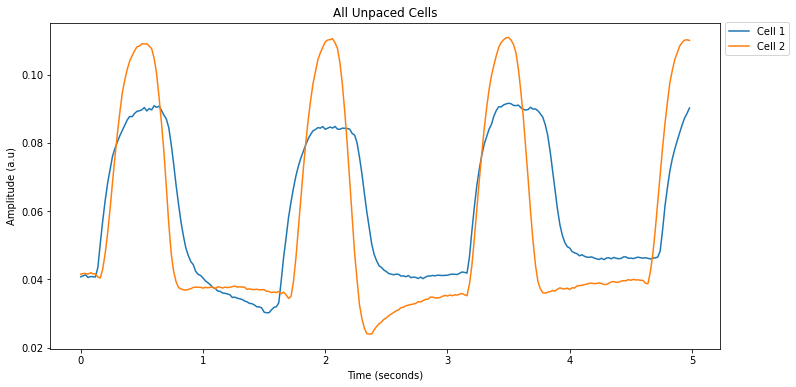

In [ ]:
# C3
tStart = 0
tEnd = 5
plt.figure(figsize=(12,6))
# smaller_plotGivenTimeNorm(tStart,tEnd,Cell_1_BF_c31,53,'Cell 1','-',0)
# smaller_plotGivenTimeNorm(tStart,tEnd,Cell_2_BF_c31,54,'Cell 2','-',0)
# smaller_plotGivenTimeNorm(tStart,tEnd,Cell_3_BF_c31,59,'Cell 3','-',0)
# smaller_plotGivenTimeNorm(tStart,tEnd,Cell_4_BF_c31,56,'Cell 4','-',0)

smaller_plotGivenTimeNorm(tStart,tEnd,Cell_1_BF_c37,50,'Cell 1','-',0)
smaller_plotGivenTimeNorm(tStart+0.6,tEnd+0.6,Cell_2_BF_c37,50,'Cell 2','-',-0.6)
# smaller_plotGivenTimeNorm(tStart,tEnd,Cell_3_BF_c37,50,'Cell 3','-',0.2)
# smaller_plotGivenTimeNorm(tStart,tEnd,Cell_4_BF_c37,50,'Cell 4','-',0)
# smaller_plotGivenTimeNorm(tStart,tEnd,Cell_5_BF_c37,50,'Cell 5','-',0)
# smaller_plotGivenTimeNorm(tStart,tEnd,Cell_6_BF_c37,50,'Cell 6','-',0)
# smaller_plotGivenTimeNorm(tStart,tEnd,Cell_7_BF_c37,50,'Cell 7','-',0)
# smaller_plotGivenTimeNorm(tStart,tEnd,Cell_8_BF_c37,50,'Cell 8','-',0)
# smaller_plotGivenTimeNorm(tStart,tEnd,Cell_9_BF_c37,50,'Cell 9','-',0)
# smaller_plotGivenTimeNorm(tStart,tEnd,Cell_10_BF_c37,50,'Cell 10','-',0)
plt.xticks(np.arange(tStart,tEnd+1,step=1))
plt.title("All Unpaced Cells")
plt.legend(bbox_to_anchor=(1, 1.017), loc=2, prop={'size': 10})
plt.show()

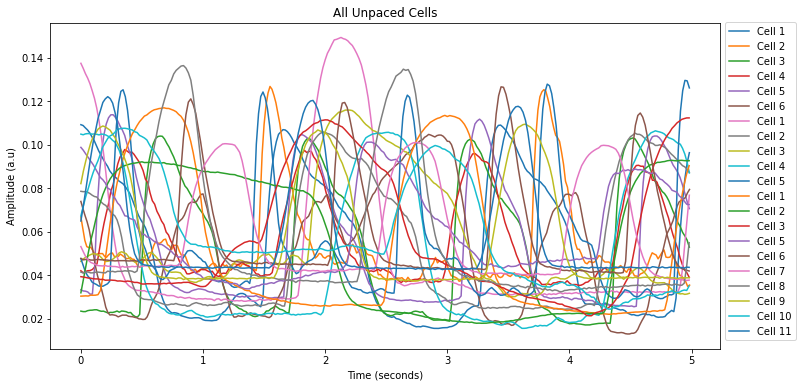

In [ ]:
# c4
tStart = 0
tEnd = 5
plt.figure(figsize=(12,6))
smaller_plotGivenTimeNorm(tStart,tEnd,Cell_1_BF_c4p,55,'Cell 1','-',0)
smaller_plotGivenTimeNorm(tStart,tEnd,Cell_2_BF_c4p,62,'Cell 2','-',0)
smaller_plotGivenTimeNorm(tStart,tEnd,Cell_3_BF_c4p,54,'Cell 3','-',0)
smaller_plotGivenTimeNorm(tStart,tEnd,Cell_4_BF_c4p,53,'Cell 4','-',0)
smaller_plotGivenTimeNorm(tStart,tEnd,Cell_5_BF_c4p,53,'Cell 5','-',0)
smaller_plotGivenTimeNorm(tStart,tEnd,Cell_6_BF_c4p,59,'Cell 6','-',0)

smaller_plotGivenTimeNorm(tStart,tEnd,Cell_1_BF_c4u,54,'Cell 1','-',0)
smaller_plotGivenTimeNorm(tStart,tEnd,Cell_2_BF_c4u,54,'Cell 2','-',0)
smaller_plotGivenTimeNorm(tStart,tEnd,Cell_3_BF_c4u,54,'Cell 3','-',0)
smaller_plotGivenTimeNorm(tStart,tEnd,Cell_4_BF_c4u,54,'Cell 4','-',0)
smaller_plotGivenTimeNorm(tStart,tEnd,Cell_5_BF_c4u,55,'Cell 5','-',0)

smaller_plotGivenTimeNorm(tStart,tEnd,Cell_1_BF_c4u2,50,'Cell 1','-',0)
smaller_plotGivenTimeNorm(tStart,tEnd,Cell_2_BF_c4u2,50,'Cell 2','-',0)
smaller_plotGivenTimeNorm(tStart,tEnd,Cell_3_BF_c4u2,50,'Cell 3','-',0)
smaller_plotGivenTimeNorm(tStart,tEnd,Cell_5_BF_c4u2,50,'Cell 5','-',0)
smaller_plotGivenTimeNorm(tStart,tEnd,Cell_6_BF_c4u2,50,'Cell 6','-',0)
smaller_plotGivenTimeNorm(tStart,tEnd,Cell_7_BF_c4u2,50,'Cell 7','-',0)
smaller_plotGivenTimeNorm(tStart,tEnd,Cell_8_BF_c4u2,50,'Cell 8','-',0)
smaller_plotGivenTimeNorm(tStart,tEnd,Cell_9_BF_c4u2,50,'Cell 9','-',0)
smaller_plotGivenTimeNorm(tStart,tEnd,Cell_10_BF_c4u2,50,'Cell 10','-',0)
smaller_plotGivenTimeNorm(tStart,tEnd,Cell_11_BF_c4u2,50,'Cell 11','-',0)
plt.xticks(np.arange(tStart,tEnd+1,step=1))
plt.title("All Unpaced Cells")
plt.legend(bbox_to_anchor=(1, 1.017), loc=2, prop={'size': 10})
plt.show()

# Line Graph Code (v2)

In [ ]:
import os
import time
import math
import numpy as np
import numpy.linalg as npla
import scipy
from scipy import linalg as spla
import scipy.sparse
import scipy.sparse.linalg
from scipy import integrate
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import axes3d
from collections import Counter 
np.set_printoptions(precision = 4)

def get_timearray(arr,fps):
  length = len(arr)
  time = np.zeros(length)
  for i in range(length):
    time[i] = i/fps
  return time

# Just for convenience #
def createLabels():
  plt.xlabel('Time (seconds)')
  plt.ylabel('Amplitude (a.u)')

# To get multiple lines on the same graph, get rid of plt.show and put it later, outside of function. #
def create_plot(arr,fps,title,start,end):
  # plt.figure(figsize=(12,6))
  time = get_timearray(arr,fps)
  startindex = int(fps*start)
  endindex = int(fps*end)
  newtime = time[startindex:endindex]
  newamplitude = arr[startindex:endindex]
  plt.plot(newtime, newamplitude, color='black')
  plt.title(title)
  createLabels()
  plt.show()

def smaller_plotGivenTime(start,end,arr,fps,label,ls,shift):
  time = get_timearray(arr,fps)
  time += shift
  startindex = int(fps*start)
  endindex = int(fps*end)
  newtime = time[startindex:endindex]
  newamplitude = arr[startindex:endindex]
  plt.plot(newtime, newamplitude, label=label, linestyle=ls)
  createLabels()

def norm(data):
  return data/np.linalg.norm(data)

def smaller_plotGivenTimeNorm(start,end,arr,fps,label,ls,shift):
  time = get_timearray(arr,fps)
  time += shift
  startindex = int(fps*start)
  endindex = int(fps*end)
  newtime = time[startindex:endindex]
  newamplitude = arr[startindex:endindex]
  plt.plot(newtime, norm(newamplitude), label=label, linestyle=ls)
  createLabels()

# Single Contraction Code

In [ ]:
import numpy as np
from scipy.signal import argrelextrema

x = np.array(Cell_1_BF_c4p)
# for local maxima
y = argrelextrema(x, np.greater)
# for local minima
z = argrelextrema(x, np.less)
print(y[0])
print(z[0])

[ 42  53  72  91 141 152 154 177 189 229 232 236 244 249 254 256 258 266
 278 296 322 343 366 410 419 433 435 438 441 454 503 506 513 516 520 526
 530]
[ 41  50  59  81 140 151 153 178 228 230 234 243 248 251 255 257 260 267
 295 320 337 355 409 418 432 434 436 440 442 497 504 511 515 518 525 529
 542]


In [ ]:
def createLabels2():
  plt.xlabel('Time (seconds)')
  plt.ylabel('Relative Normalized Amplitude (a.u)')

In [ ]:
def single_contraction(amplitudes, fps, label, val1, val2):
  amprange = amplitudes[int(fps*val1):int(fps*val2)]
  y = amprange.index(max(amprange))
  ind1 = amprange.index(min(amprange[0:y]))
  ind2 = amprange.index(min(amprange[y:-1]))
  arr = amprange[ind1:ind2]
  time = (ind2-ind1)/fps
  smaller_plotGivenTimeNorm(0, time, arr, fps, label, '-',0)

In [ ]:
# Single contraction centered at zero seconds
def timearray_sys(arr,fps):
  length = len(arr)
  time0 = np.zeros(length)
  for i in range(length):
    time0[i] = i/fps
  time1 = time0[::-1]*(-1)
  return time1
def timearray_dia(arr,fps):
  length = len(arr)
  time2 = np.zeros(length)
  for i in range(length):
    time2[i] = i/fps
  return time2

def normAmp(amplitudes, fps, val1, val2):
  arr1 = amplitudes[int(fps*val1):int(fps*val2)]
  normalized = norm(arr1)
  newamplitudes = normalized.tolist()
  return newamplitudes

def single_contractionAmp(amplitudes, fps, label, val1, val2):
  amprange = amplitudes[int(fps*val1):int(fps*val2)]
  y = amprange.index(max(amprange))
  ind1 = amprange.index(min(amprange[0:y]))
  ind2 = amprange.index(min(amprange[y:-1]))
  sys = amprange[ind1:y+1]
  dia = amprange[y:ind2]
  time1 = timearray_sys(sys,fps)
  time2 = timearray_dia(dia,fps)
  plt.plot(time1, sys, label=label+' Systole', linestyle='-' )
  plt.plot(time2, dia, label=label+' Diastole', linestyle='-' )
  createLabels()

# def single_contractionNorm(amplitudes, fps, label, val1, val2):
#   amprange = normAmp(amplitudes, fps, val1, val2)
#   y = amprange.index(max(amprange))
#   ind1 = amprange.index(min(amprange[0:y+1]))
#   ind2 = amprange.index(min(amprange[y:-1]))
#   sys = amprange[ind1:y+1]
#   dia = amprange[y:ind2]
#   time1 = timearray_sys(sys,fps)
#   time2 = timearray_dia(dia,fps)
#   plt.plot(time1, sys, label=label+' Systole', linestyle='-')
#   plt.plot(time2, dia, label=label+' Diastole', linestyle='-')
#   createLabels()

def single_contractionNorm(amplitudes, fps, label, val1, val2):
  amprange = normAmp(amplitudes, fps, val1, val2) #amplitudes[int(fps*val1):int(fps*val2)]
  y = amprange.index(max(amprange))
  sys = amprange[:y+1]
  dia = amprange[y:]
  time1 = timearray_sys(sys,fps)
  time2 = timearray_dia(dia,fps)
  plt.plot(time1, sys, label=label+' Systole', linestyle='-')
  plt.plot(time2, dia, label=label+' Diastole', linestyle='-')
  createLabels2()
  return time1[0], time2[-1]
  plt.title(title)
  plt.show()

def max_peaktime_return(amplitudes,fps,label,val1,val2):
  amprange = normAmp(amplitudes, fps, val1, val2)
  return max(amprange)

# Single Contraction Graphs

(-0.7037037037037037, 0.5370370370370371)

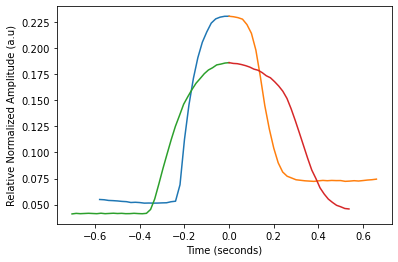

In [ ]:
# create_plot(Cell_1_BF_c31, 53, '1',0,10)
# create_plot(Cell_2_BF_c31, 54, '2',0,10)
# create_plot(Cell_3_BF_c31, 59, '3',0,10)
# create_plot(Cell_4_BF_c31, 56, '4',0,10)
# create_plot(Cell_1_BF_c37, 50, '5',0,10)
# create_plot(Cell_2_BF_c37, 50, '6',0,10)
# create_plot(Cell_3_BF_c37, 50, '7',0,10)
# create_plot(Cell_4_BF_c37, 50, '8',0,10)
single_contractionNorm(Cell_5_BF_c37, 50, 'H251N',0.25,1.5)
# create_plot(Cell_6_BF_c37, 50, '10',0,10)
# create_plot(Cell_7_BF_c37, 50, '11',0,10)
# create_plot(Cell_8_BF_c37, 50, '12',0,10)
# create_plot(Cell_9_BF_c37, 50, '13',0,10)
# create_plot(Cell_10_BF_c37, 50, '14',0,10)

# create_plot(Cell_1_BF_c4p, 55, 'Control',0,10)
# create_plot(Cell_2_BF_c4p, 62, 'Control',0,10)
# create_plot(Cell_3_BF_c4p, 54, 'Control',0,10)
# create_plot(Cell_4_BF_c4p, 53, 'Control',0,10)
# create_plot(Cell_5_BF_c4p, 53, 'Control',0,10)
# create_plot(Cell_6_BF_c4p, 59, 'Control',0,10)

single_contractionNorm(Cell_1_BF_c4u, 54, 'Control',4.57,5.82)
# create_plot(Cell_2_BF_c4u, 54, '2',0,10)
# create_plot(Cell_3_BF_c4u, 54, '3',0,10)
# create_plot(Cell_4_BF_c4u, 54, '4',0,10)
# create_plot(Cell_5_BF_c4u, 55, '5',0,10)
# create_plot(Cell_1_BF_c4u2, 50, '6',0,10)
# create_plot(Cell_2_BF_c4u2, 50, '7',0,10)
# create_plot(Cell_3_BF_c4u2, 50, '8',0,10)
# create_plot(Cell_5_BF_c4u2, 50, '9',0,10)
# create_plot(Cell_6_BF_c4u2, 50, '10',0,10)
# create_plot(Cell_7_BF_c4u2, 50, '11',0,10)
# create_plot(Cell_8_BF_c4u2, 50, '12',0,10)
# create_plot(Cell_9_BF_c4u2, 50, '13',0,10)
# create_plot(Cell_10_BF_c4u2, 50, '14',0,10)
# create_plot(Cell_11_BF_c4u2, 50, '15',0,10)

C3 Single Contraction

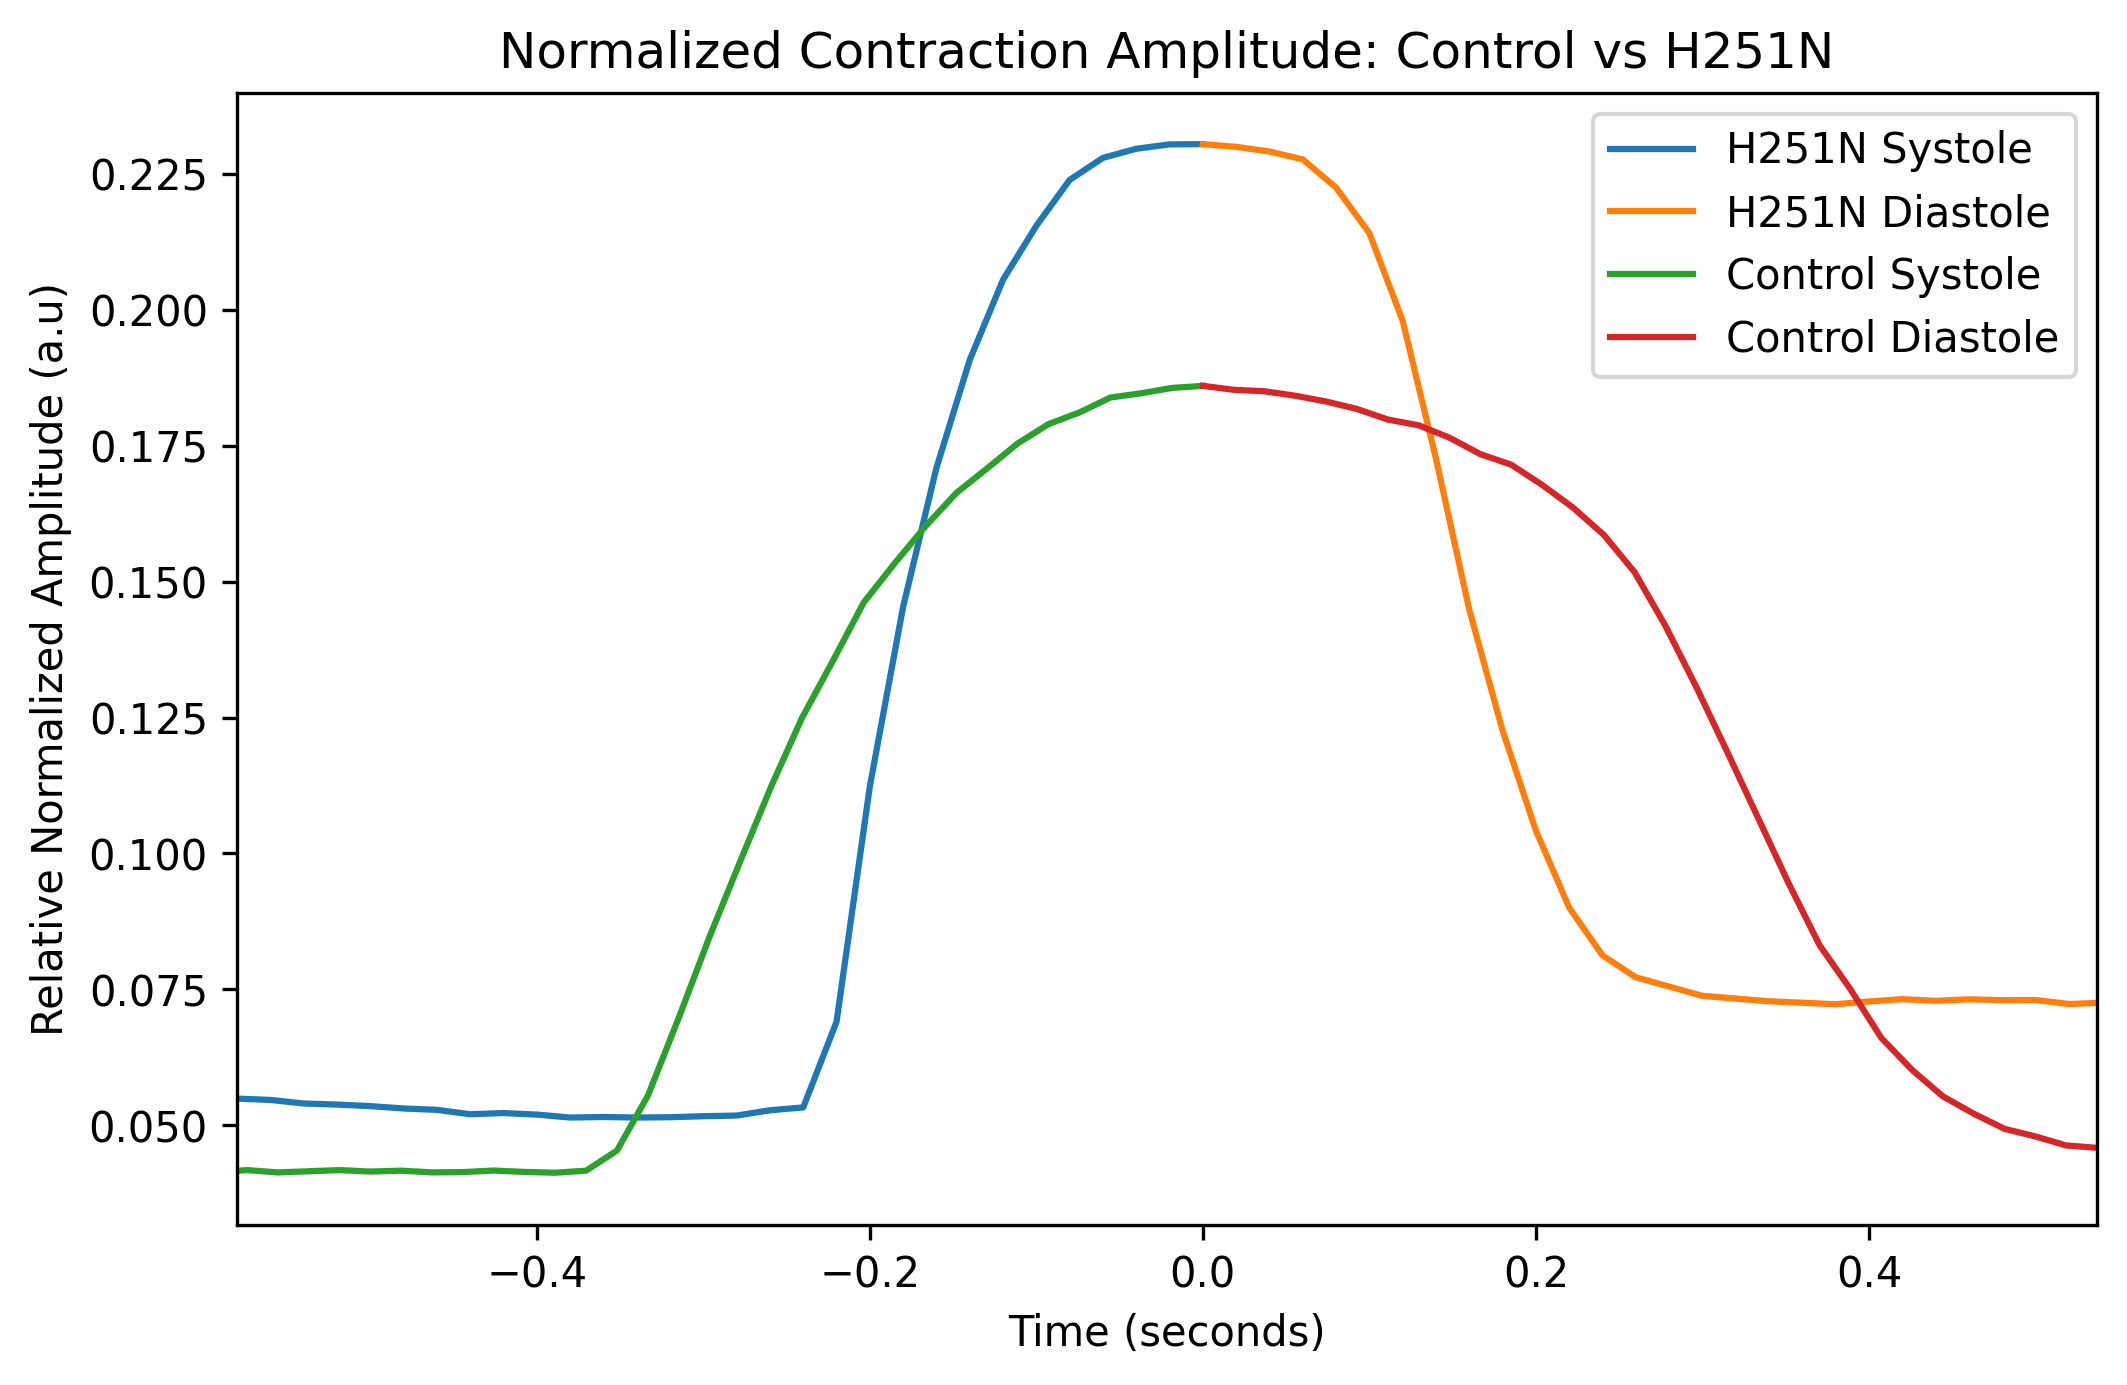

In [ ]:
# 21-FPS: 53,54,59,56
# 27-FPS: 50 for all
plt.figure(figsize=(8,5), dpi=300)
# t1_3, t2_3 = single_contractionNorm(Cell_1_BF_c31, 53, 'H251N',3.8,5.6)
# t1_3, t2_3 = single_contractionNorm(Cell_2_BF_c31, 54, 'H251N',2.5,4)
# t1_3, t2_3 = single_contractionNorm(Cell_3_BF_c31, 59, 'H251N',3,5.3)
# t1_3, t2_3 = single_contractionNorm(Cell_4_BF_c31, 56, 'H251N',0.8, 2.7)
# t1_3, t2_3 = single_contractionNorm(Cell_1_BF_c37, 50, 'H251N',3.1,4.7)
# t1_3, t2_3 = single_contractionNorm(Cell_2_BF_c37, 50, 'H251N',0.7,2.2)
# t1_3, t2_3 = single_contractionNorm(Cell_3_BF_c37, 50, 'H251N',1.4,3)
# t1_3, t2_3 = single_contractionNorm(Cell_4_BF_c37, 50, 'H251N',1.4,2.9)
t1_3, t2_3 = single_contractionNorm(Cell_5_BF_c37, 50, 'H251N',0.25,1.5)
# t1_3, t2_3 = single_contractionNorm(Cell_6_BF_c37, 50, 'H251N',1.1,2.4)
# t1_3, t2_3 = single_contractionNorm(Cell_7_BF_c37, 50, 'H251N',3,4.3)
# t1_3, t2_3 = single_contractionNorm(Cell_8_BF_c37, 50, 'H251N',3.1,4.2)
# t1_3, t2_3 = single_contractionNorm(Cell_9_BF_c37, 50, 'H251N',0.5,4.5)
# t1_3, t2_3 = single_contractionNorm(Cell_10_BF_c37, 50, 'H251N',2.4,3.6)

## t1_4, t2_4 = single_contractionNorm(Cell_1_BF_c4p, 55, 'Control',2.8,4.8)
## t1_4, t2_4 = single_contractionNorm(Cell_2_BF_c4p, 62, 'Control',3.5,5.3)
## t1_4, t2_4 = single_contractionNorm(Cell_3_BF_c4p, 54, 'Control',3,4.2)
## t1_4, t2_4 = single_contractionNorm(Cell_4_BF_c4p, 53, 'Control',2.8,4.1)
## t1_4, t2_4 = single_contractionNorm(Cell_5_BF_c4p, 53, 'Control',3,4.5)
## t1_4, t2_4 = single_contractionNorm(Cell_6_BF_c4p, 59, 'Control',3.4,4.5)

t1_4, t2_4 = single_contractionNorm(Cell_1_BF_c4u, 54, 'Control',4.57,5.82)
# t1_4, t2_4 = single_contractionNorm(Cell_2_BF_c4u, 54, 'Control',4,6.5)
# t1_4, t2_4 = single_contractionNorm(Cell_3_BF_c4u, 54, 'Control',1.8,5)#####
# t1_4, t2_4 = single_contractionNorm(Cell_4_BF_c4u, 54, 'Control',1.8,3.5)
# t1_4, t2_4 = single_contractionNorm(Cell_5_BF_c4u, 55, 'Control',4.8,6)
# t1_4, t2_4 = single_contractionNorm(Cell_1_BF_c4u2, 50, 'Control',2.4,4.7) 
# t1_4, t2_4 = single_contractionNorm(Cell_2_BF_c4u2, 50, 'Control',4.2,8)
# t1_4, t2_4 = single_contractionNorm(Cell_3_BF_c4u2, 50, 'Control',1,4.1)
# t1_4, t2_4 = single_contractionNorm(Cell_5_BF_c4u2, 50, 'Control',2,4.1)
# t1_4, t2_4 = single_contractionNorm(Cell_6_BF_c4u2, 50, 'Control',3.25,4.4)
# t1_4, t2_4 = single_contractionNorm(Cell_7_BF_c4u2, 50, 'Control',2.35,3.9)
# t1_4, t2_4 = single_contractionNorm(Cell_8_BF_c4u2, 50, 'Control',2.1,4.1)
# t1_4, t2_4 = single_contractionNorm(Cell_9_BF_c4u2, 50, 'Control',3.2,5)
# t1_4, t2_4 = single_contractionNorm(Cell_10_BF_c4u2, 50, 'Control',2.4,4.9)
# t1_4, t2_4 = single_contractionNorm(Cell_11_BF_c4u2, 50, 'Control',3.1,5)
xlim1 = max(t1_3,t1_4)
xlim2 = min(t2_3,t2_4)
plt.title("Normalized Contraction Amplitude: Control vs H251N")
plt.xlim(xlim1,xlim2)
plt.legend()#bbox_to_anchor=(1, 1.017), loc=2, prop={'size': 10})
plt.show()

In [ ]:
print(t1_3, t2_3, t1_4, t2_4)

-0.58 0.66 -0.7037037037037037 0.5370370370370371


Experimenting

In [ ]:
def single_contractionNorm(amplitudes, fps, label, val1, val2):
  amprange = normAmp(amplitudes, fps, val1, val2) #amplitudes[int(fps*val1):int(fps*val2)]
  y = amprange.index(max(amprange))
  sys = amprange[:y+1]
  dia = amprange[y:]
  time1 = timearray_sys(sys,fps)
  time2 = timearray_dia(dia,fps)
  # plt.plot(time1, sys, label=label+' Systole', linestyle='-')
  # plt.plot(time2, dia, label=label+' Diastole', linestyle='-')
  createLabels2()
  return time1[0], time2[-1], amprange[0]

In [ ]:
def single_contractionNorm_shift(amplitudes, fps, label, val1, val2, shift):
  amprange = (np.array(normAmp(amplitudes, fps, val1, val2)))+shift #amplitudes[int(fps*val1):int(fps*val2)]
  y = amprange.tolist().index(max(amprange))
  sys = amprange[:y+1]
  dia = amprange[y:]
  time1 = timearray_sys(sys,fps)
  time2 = timearray_dia(dia,fps)
  plt.plot(time1, sys, label=label+' Systole', linestyle='-')
  plt.plot(time2, dia, label=label+' Diastole', linestyle='-')
  createLabels2()
  return time1[0], time2[-1], amprange[0]

In [ ]:
var1 = abs(max_peaktime_return(Cell_1_BF_c4u, 54, 'Control',4.75,5.95) - max_peaktime_return(Cell_5_BF_c37, 50, 'H251N',0.25,1.45))
var1

0.046075654308122826

Actually Good Code

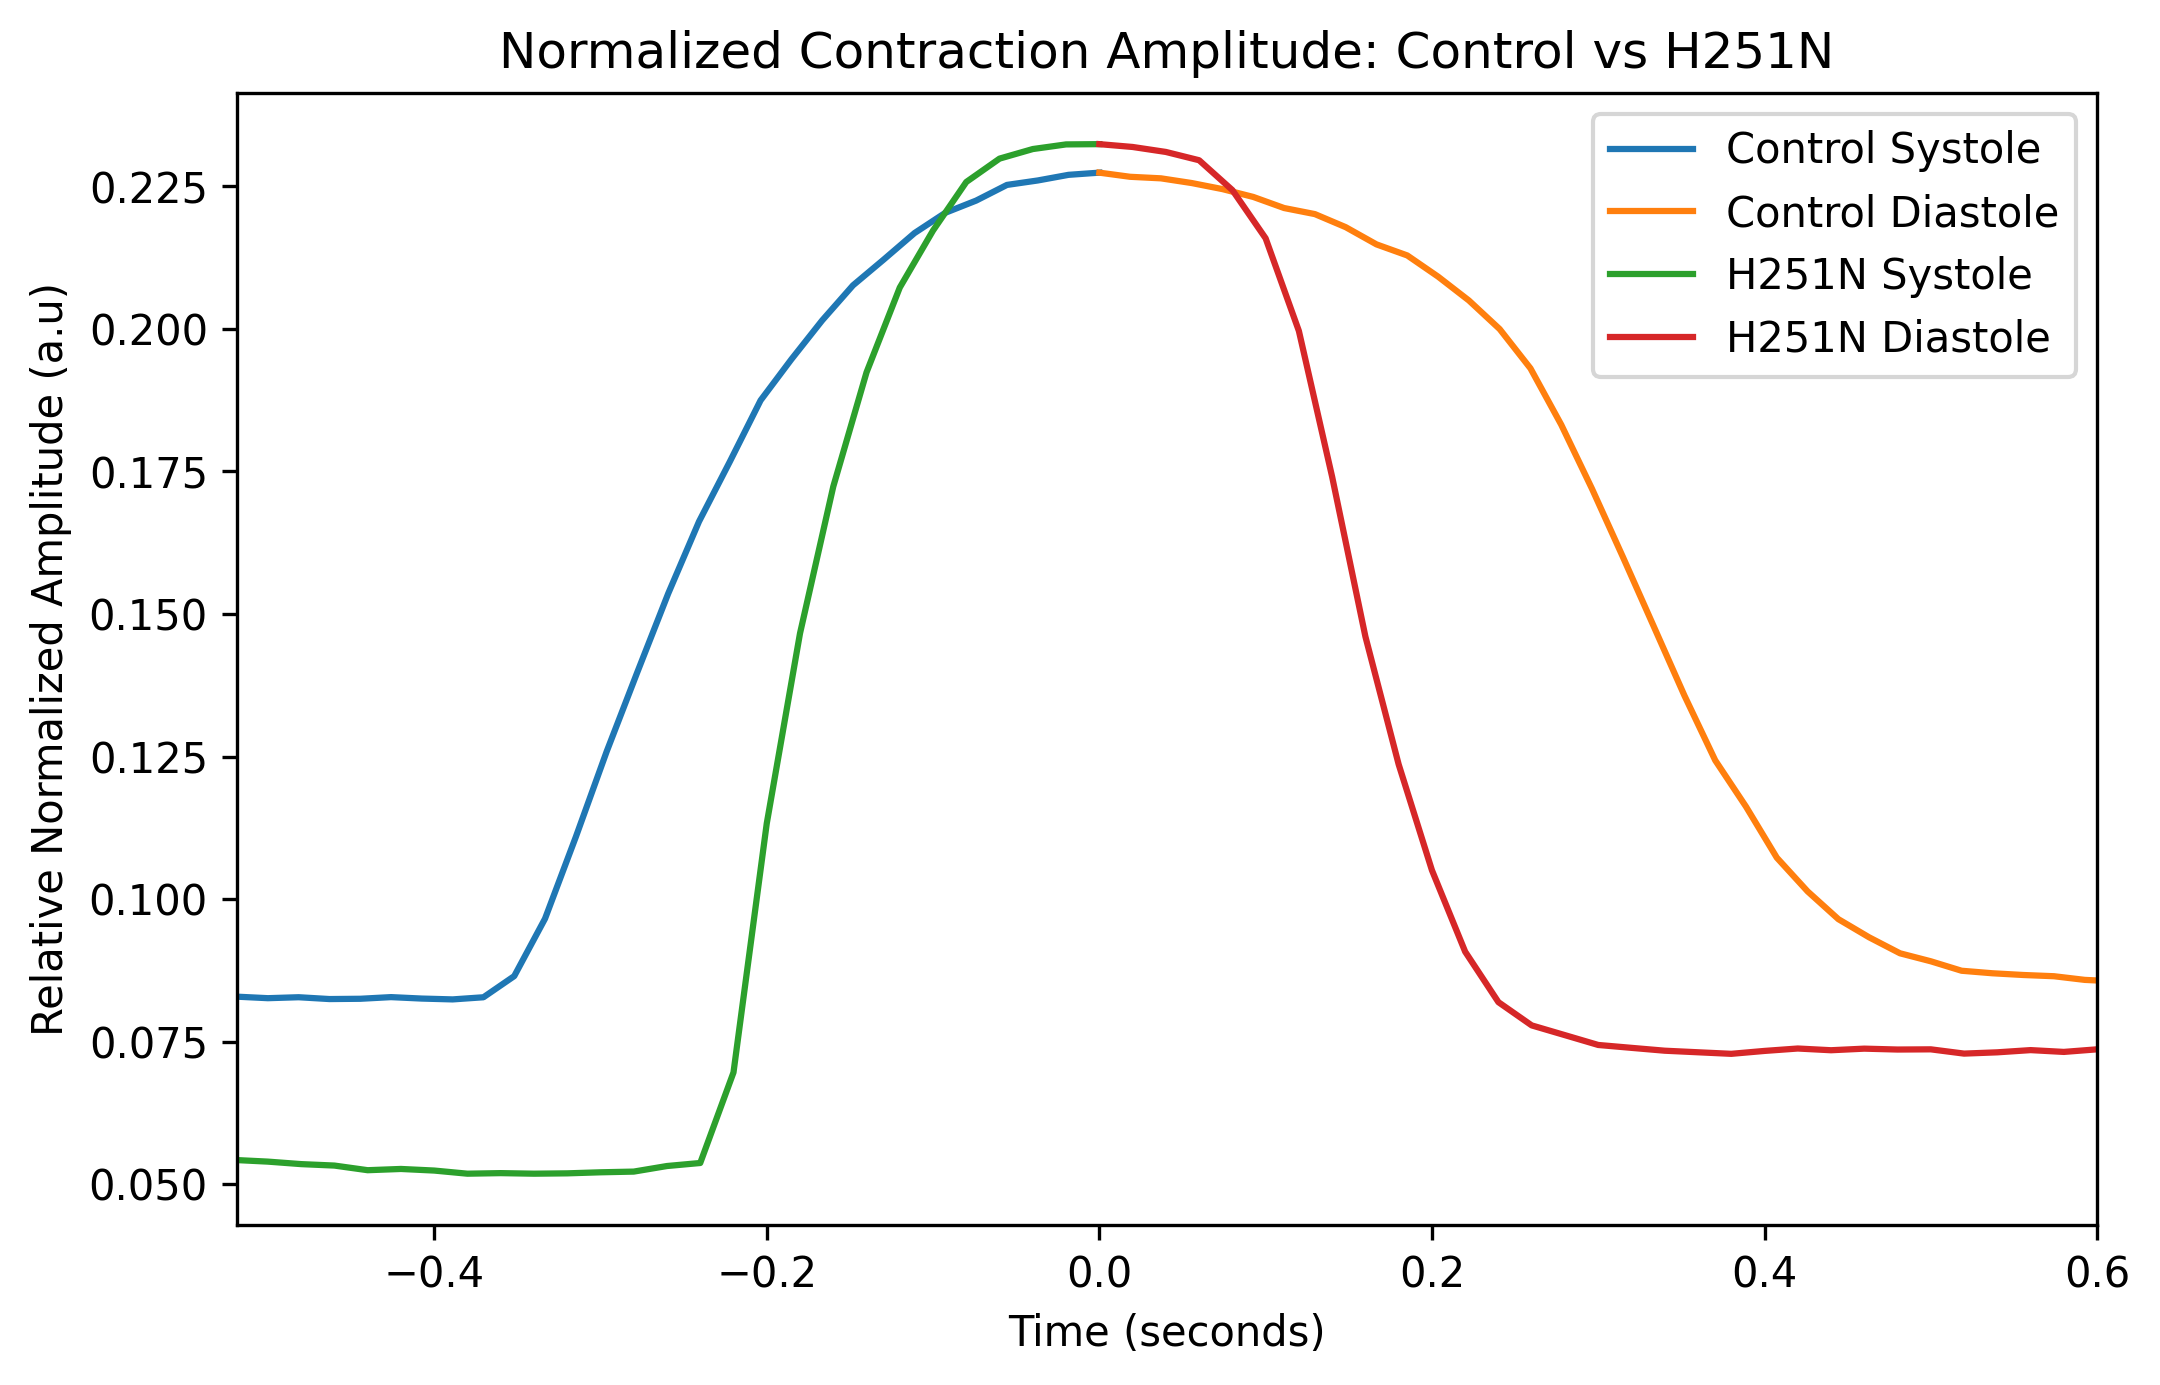

In [ ]:
plt.figure(figsize=(8,5), dpi=300)
# 0.25,1.45)
# 4.75,5.95) 
t1_3, t2_3, ar1= single_contractionNorm(Cell_1_BF_c4u, 54, 'Control',4.75,5.95)
t1_4, t2_4, ar2 = single_contractionNorm(Cell_5_BF_c37, 50, 'H251N',0.25,1.45)
single_contractionNorm_shift(Cell_1_BF_c4u, 54, 'Control',4.75,5.95,var1-0.005) 
single_contractionNorm_shift(Cell_5_BF_c37, 50, 'H251N',0.25,1.45,0) 

xlim1 = max(t1_3,t1_4)
xlim2 = min(t2_3,t2_4)
plt.title("Normalized Contraction Amplitude: Control vs H251N")
plt.xlim(xlim1,xlim2)
plt.legend()
plt.show() 

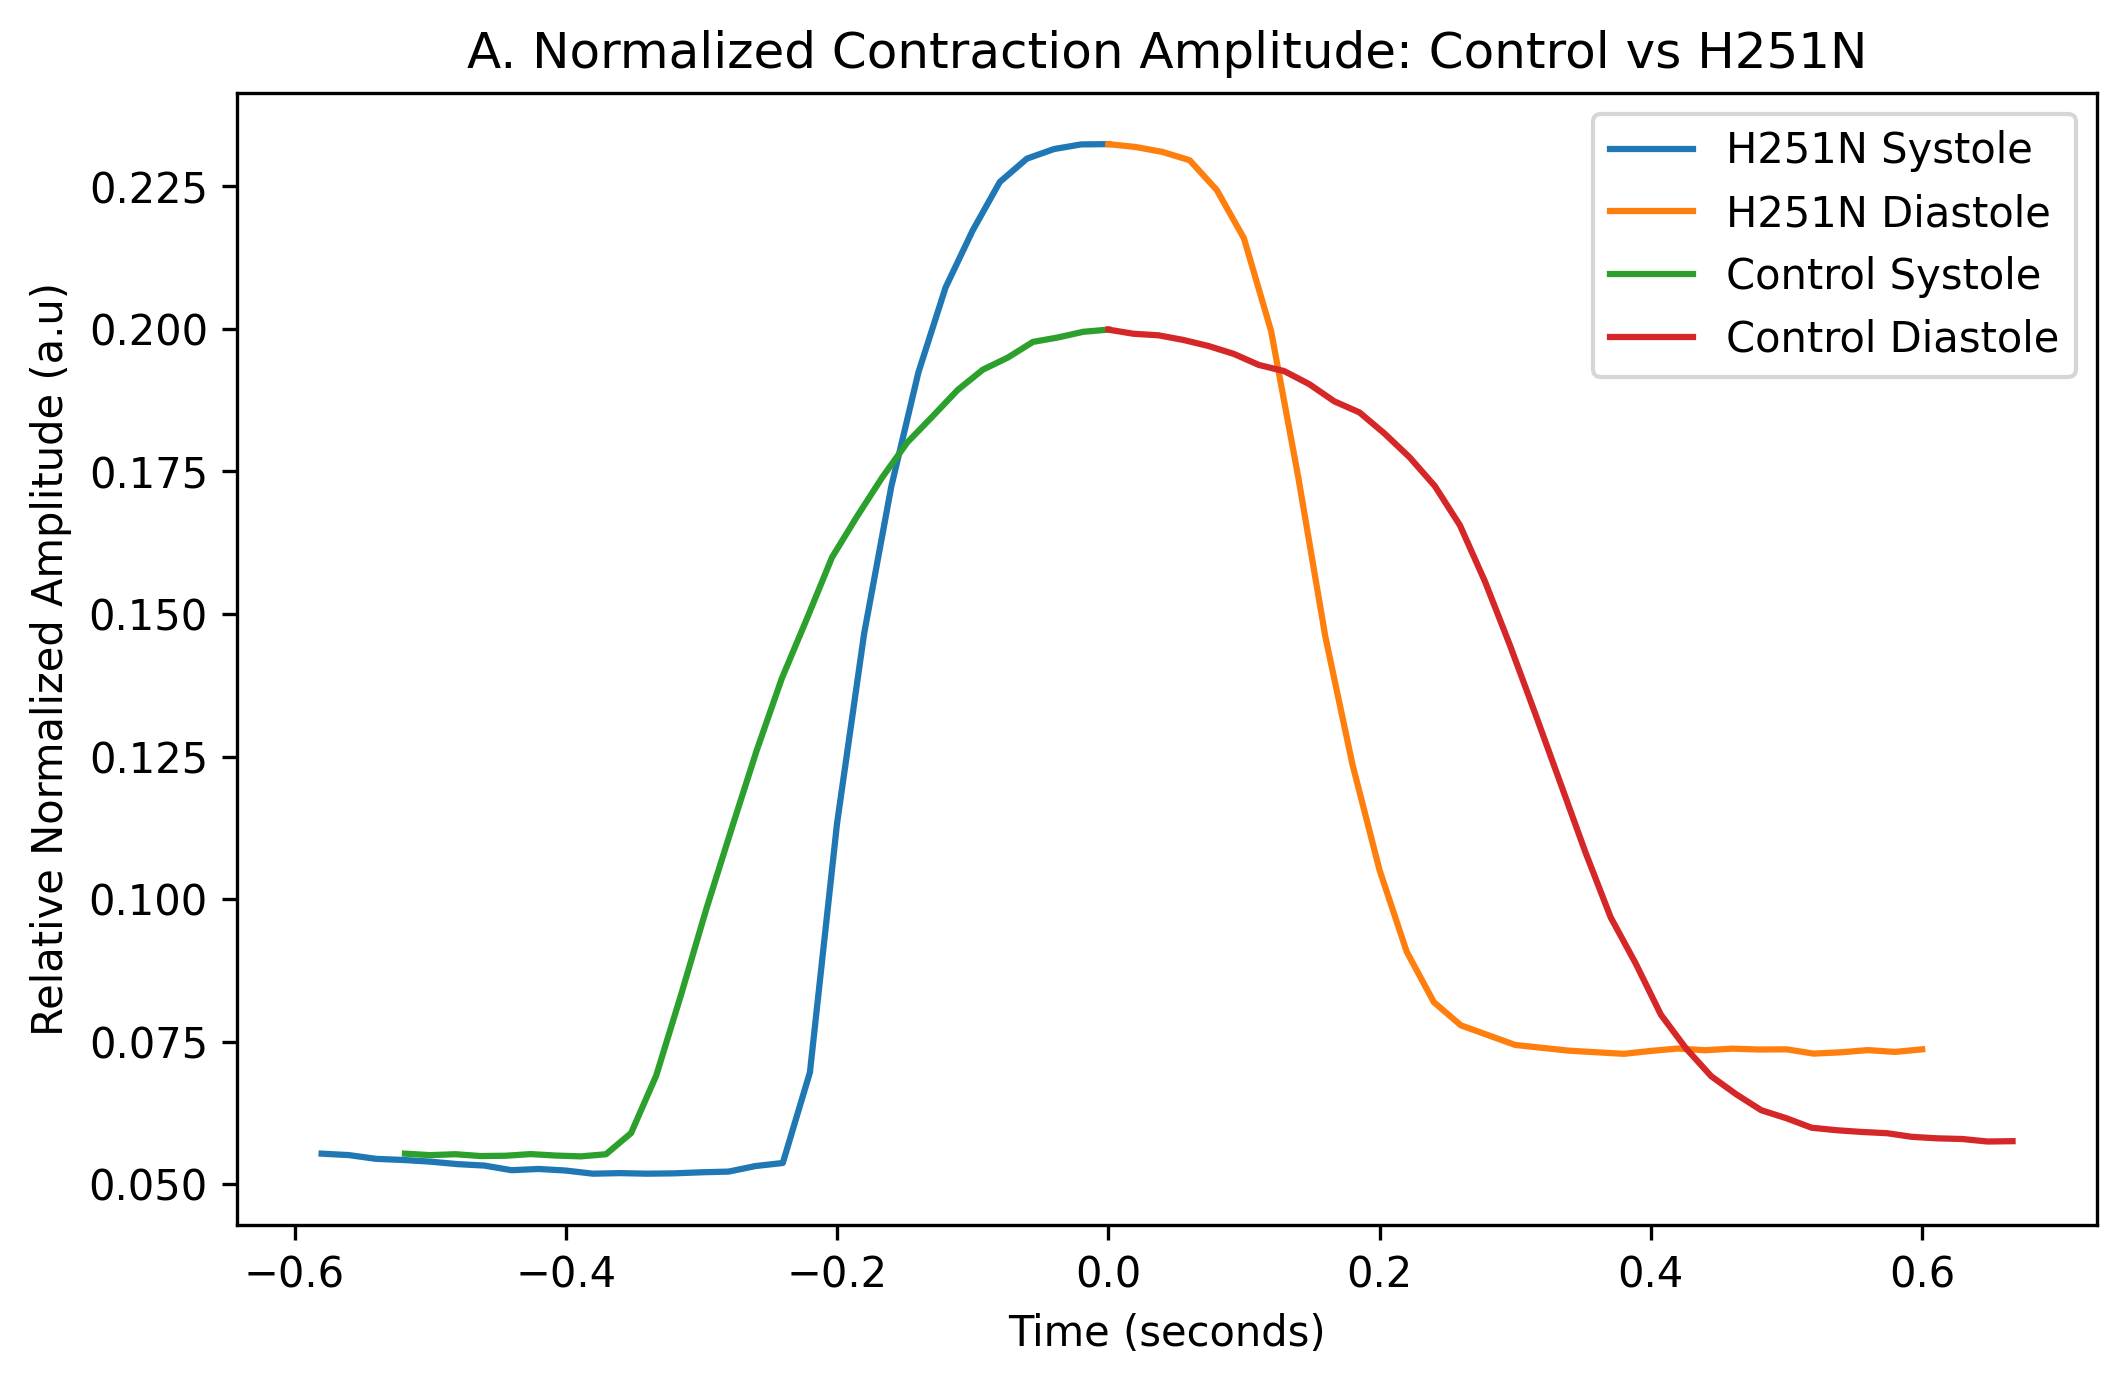

In [ ]:
plt.figure(figsize=(8,5), dpi=300)
t1_3, t2_3, ar1= single_contractionNorm(Cell_5_BF_c37, 50, 'H251N',0.25,1.45)
t1_4, t2_4, ar2 = single_contractionNorm(Cell_1_BF_c4u, 54, 'Control',4.75,5.95) 
single_contractionNorm_shift(Cell_5_BF_c37, 50, 'H251N',0.25,1.45,0) 
single_contractionNorm_shift(Cell_1_BF_c4u, 54, 'Control',4.75,5.95,abs(ar1-ar2)) 

# xlim1 = min(t1_3,t1_4)
# xlim2 = max(t2_3,t2_4)
plt.title("A. Normalized Contraction Amplitude: Control vs H251N")
# plt.xlim(xlim1,xlim2)
plt.legend()
plt.show() 

In [ ]:
def single_contractionNorm(amplitudes, fps, label, val1, val2):
  amprange = normAmp(amplitudes, fps, val1, val2) #amplitudes[int(fps*val1):int(fps*val2)]
  y = amprange.index(max(amprange))
  sys = amprange[:y+1]
  dia = amprange[y:]
  time1 = get_timearray(amprange[:len(sys)],fps)
  time2 = get_timearray(amprange[len(sys)-1:],fps)
  plt.plot(time1, sys, label=label+' Systole', linestyle='-')
  plt.plot(time2+(y/fps), dia, label=label+' Diastole', linestyle='-')
  createLabels2()
  return time1[0], time2[-1]
def create_plot(arr,fps,title,start,end):
  time = get_timearray(arr,fps)
  startindex = int(fps*start)
  endindex = int(fps*end)
  newtime = time[startindex:endindex]
  newamplitude = arr[startindex:endindex]
  plt.plot(newtime, newamplitude, color='black')

(0.0, 0.5740740740740741)

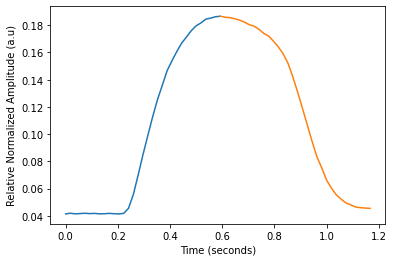

In [ ]:
hShift = 0.1
single_contractionNorm(Cell_1_BF_c4u, 54, 'Control',4.57+hShift,5.77+hShift)

TypeError: ignored

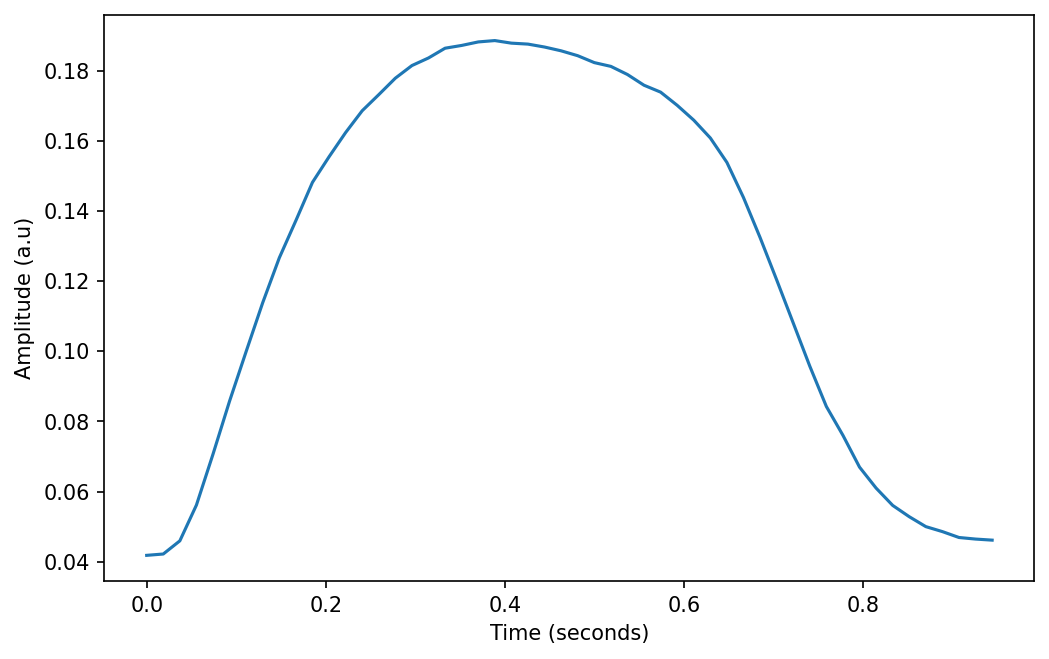

In [ ]:
plt.figure(figsize=(8,5),dpi=150)
hShift = 0.105
var = abs(max_peaktime_return(Cell_5_BF_c37, 50, 'H251N',0.25+hShift,1.45+hShift) - max_peaktime_return(Cell_1_BF_c4u, 54, 'Control',4.57+hShift,5.77+hShift))
t1_4,t2_4 = single_contraction(Cell_1_BF_c4u, 54, 'Control',4.57+hShift,5.77+hShift)
t2_3,t2_3 = single_contraction(Cell_5_BF_c37, 50, 'H251N',0.25+hShift,1.45+hShift)
plt.title('Vertical + Horizontal Shifting')
plt.legend()
plt.show()

In [ ]:
def single_contraction(amplitudes, fps, label, val1, val2, vshift,title):
  amprange = (np.array(normAmp(amplitudes, fps, val1, val2)))+vshift #amplitudes[int(fps*val1):int(fps*val2)]
  time = val2-val1
  t1,t2 = single_contractionNorm(amprange,fps,title,0,time)
  return amprange[0]

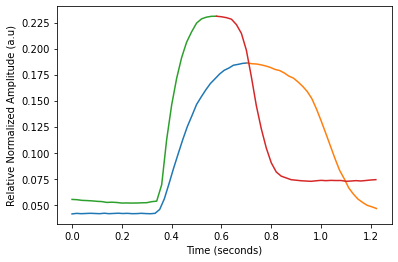

In [ ]:
ar1 = single_contraction(Cell_1_BF_c4u, 54, 'Control',4.57,5.82,0, 'Control')
ar2 = single_contraction(Cell_5_BF_c37, 50, 'H251N',0.25,1.5,0, 'H251N')

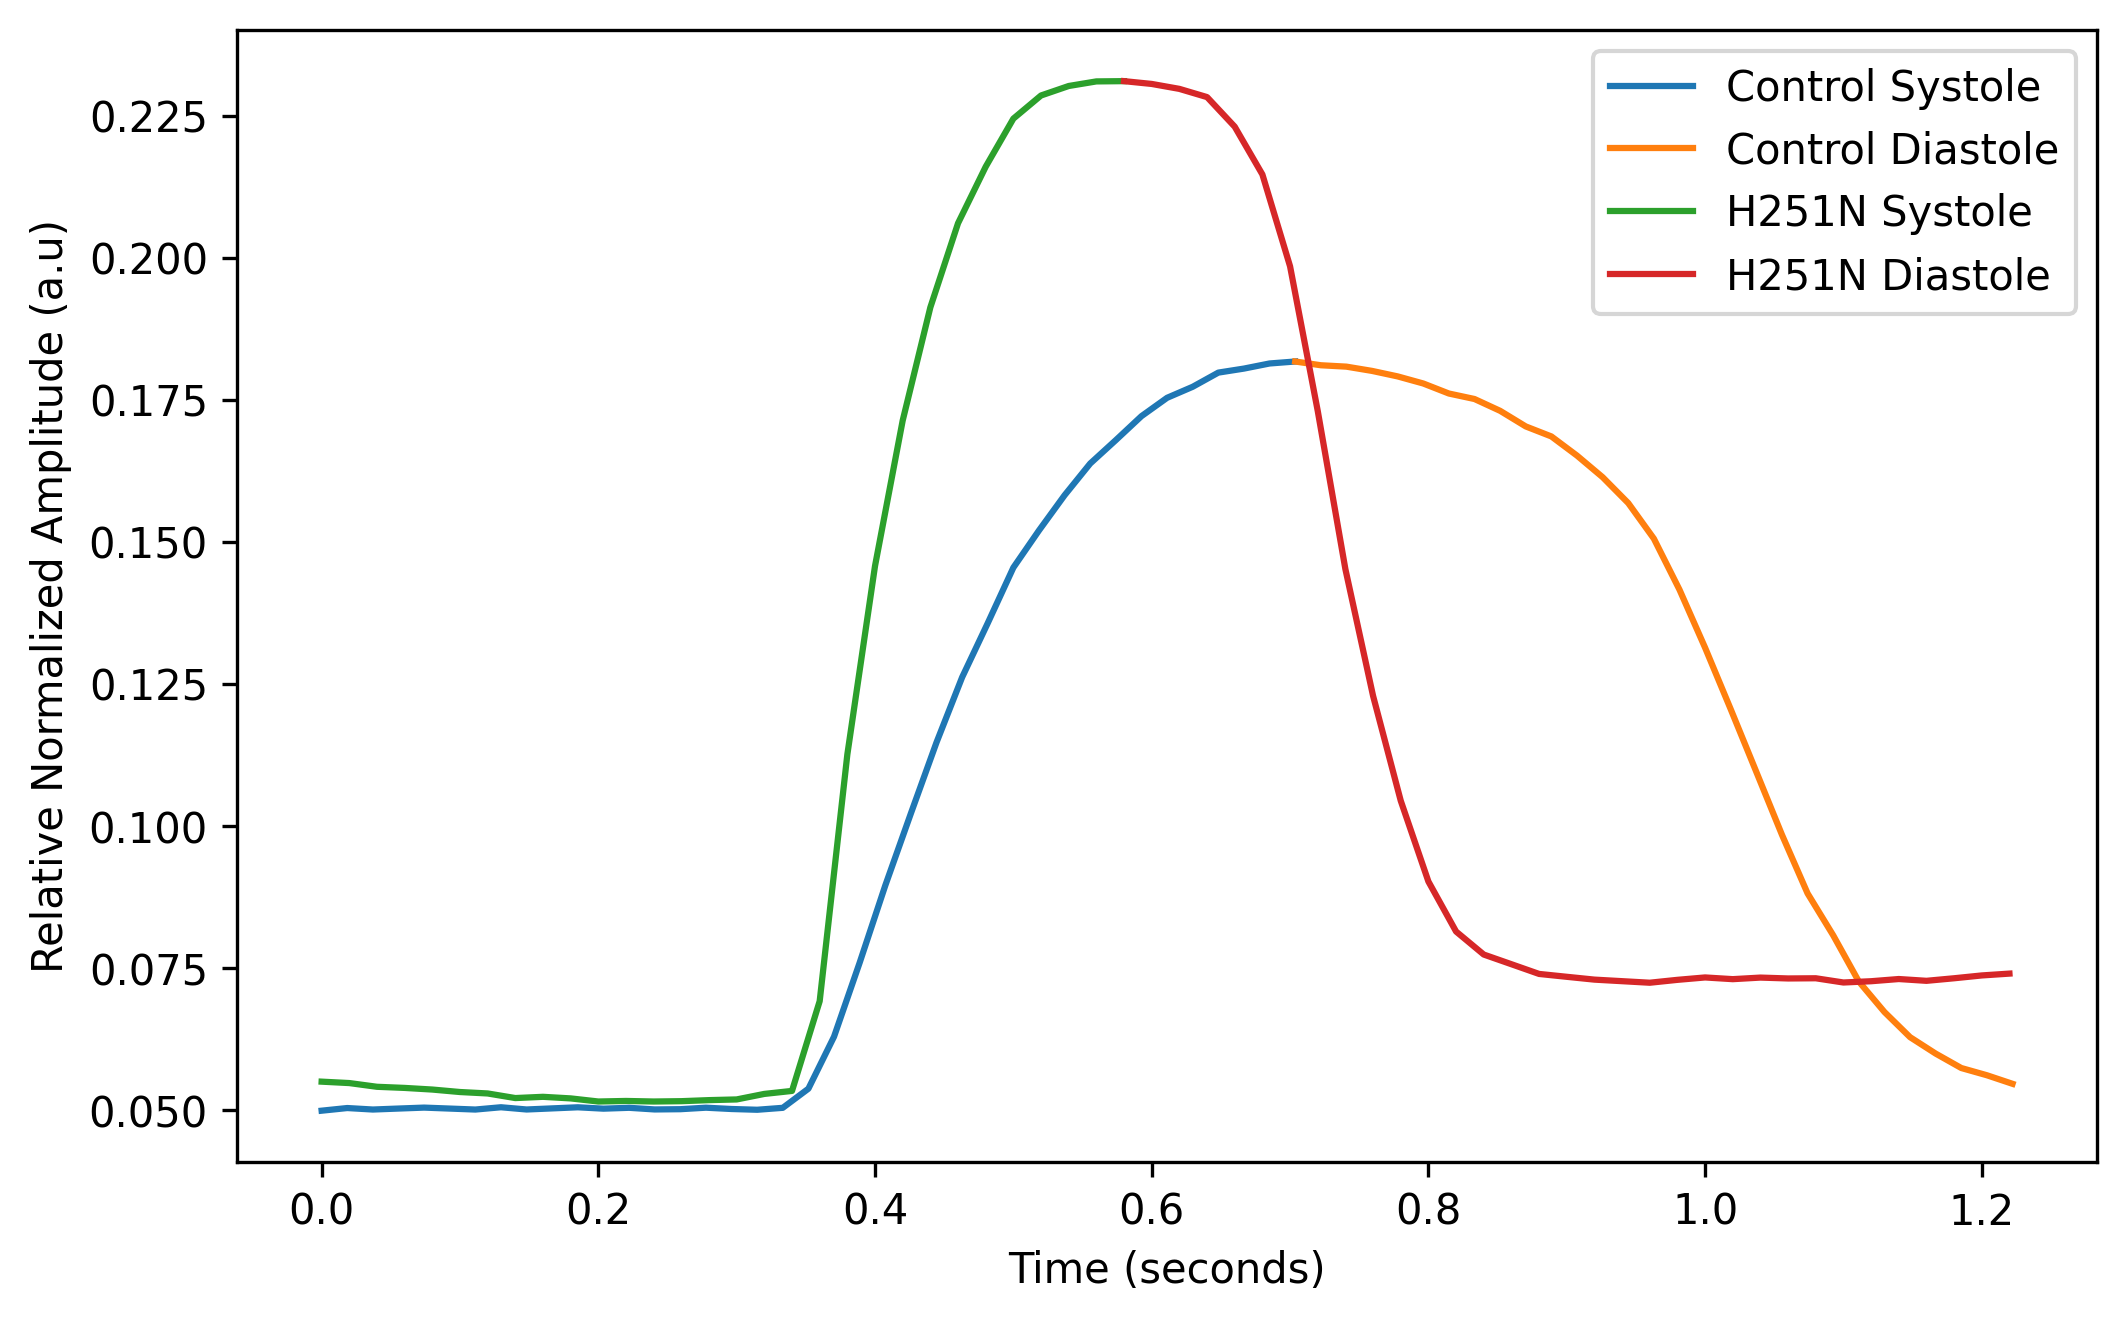

In [ ]:
plt.figure(figsize=(8,5),dpi=300)
single_contraction(Cell_1_BF_c4u, 54, 'Control',4.57,5.82,abs(ar1-ar2), 'Control')
single_contraction(Cell_5_BF_c37, 50, 'H251N',0.25,1.5,0, 'H251N')
# plt.title("Representative Normalized Contraction Amplitude: Control vs. H251N")
plt.legend()
plt.show()